In [20]:
import pandas as pd


df = pd.read_csv("2021_data.csv", header=None, skiprows=1)

df['ds'] = pd.to_datetime(df[0] + ' ' + df[1], format="%d/%m/%Y %H:%M:%S")



df.rename(columns={3: 'y'}, inplace=True)

df.drop(columns=[0, 1,2], inplace=True)


de = df[['ds', 'y']]
df = de

print(len(df))
df.head()


35040


,ds,y
0,2021-01-01 00:15:00,533.75
1,2021-01-01 00:30:00,551.25
2,2021-01-01 00:45:00,542.50
3,2021-01-01 01:00:00,533.75
4,2021-01-01 01:15:00,525.00


Plot the 2021 Data


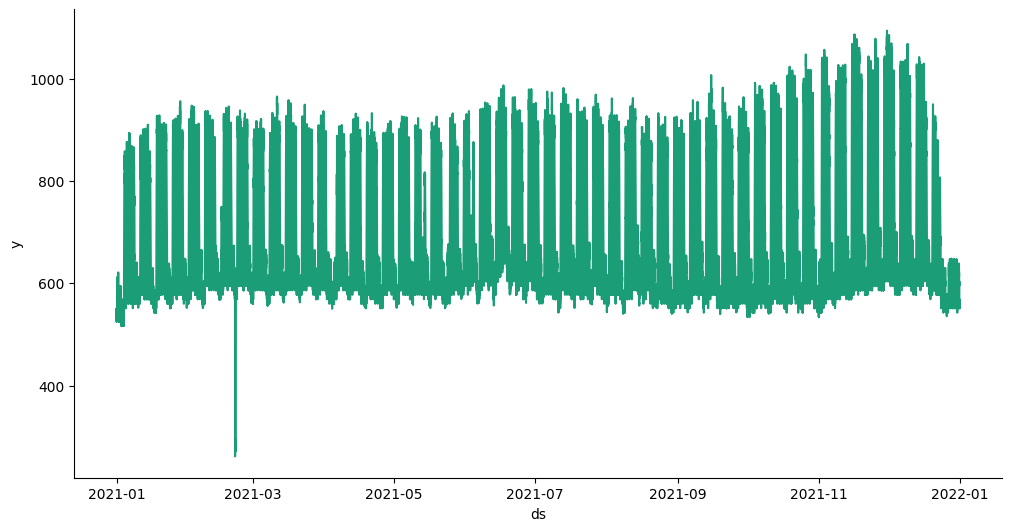

In [47]:
# @title ds vs y

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ds']
  ys = series['y']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('y')

Load the 2022 Data

In [21]:
import pandas as pd


df_2022 = pd.read_csv("LG_Uni_Campus.csv", header=None, skiprows=1)

df_2022['ds'] = pd.to_datetime(df_2022[0] + ' ' + df_2022[1])



df_2022.rename(columns={3: 'y'}, inplace=True)

df_2022.drop(columns=[0, 1,2], inplace=True)


de_2022 = df_2022[['ds', 'y']]
df_2022 = de_2022

print(df_2022)
df_2022.head()

                       ds        y
0     2022-01-01 00:00:00  551.242
1     2022-01-01 00:15:00  542.500
2     2022-01-01 00:30:00  551.242
3     2022-01-01 00:45:00  568.750
4     2022-01-01 01:00:00  559.992
...                   ...      ...
35035 2022-12-31 22:45:00  507.492
35036 2022-12-31 23:00:00  507.500
35037 2022-12-31 23:15:00  507.492
35038 2022-12-31 23:30:00  516.250
35039 2022-12-31 23:45:00  516.242

[35040 rows x 2 columns]


,ds,y
0,2022-01-01 00:00:00,551.242
1,2022-01-01 00:15:00,542.500
2,2022-01-01 00:30:00,551.242
3,2022-01-01 00:45:00,568.750
4,2022-01-01 01:00:00,559.992


Plot the 2022 data

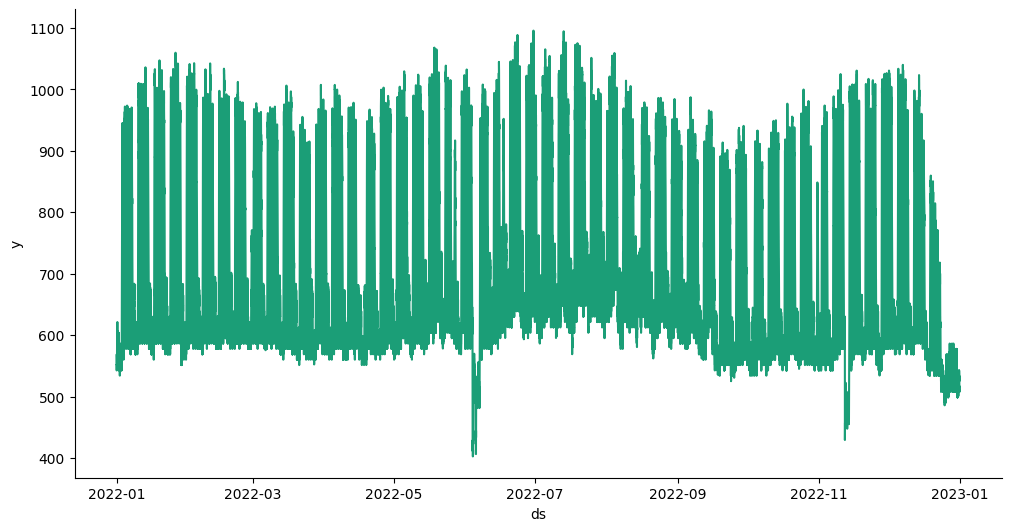

In [50]:
# @title ds vs y

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ds']
  ys = series['y']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_2022.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('y')

Join both the 2021 and 2022 data to get a continuous dataframe

In [22]:
import pandas as pd


# Concatenate the DataFrames row-wise
joint = pd.concat([df, df_2022], axis=0)

# Reset the index
joint.reset_index(drop=True, inplace=True)
print(joint)
joint.head()



                       ds        y
0     2021-01-01 00:15:00  533.750
1     2021-01-01 00:30:00  551.250
2     2021-01-01 00:45:00  542.500
3     2021-01-01 01:00:00  533.750
4     2021-01-01 01:15:00  525.000
...                   ...      ...
70075 2022-12-31 22:45:00  507.492
70076 2022-12-31 23:00:00  507.500
70077 2022-12-31 23:15:00  507.492
70078 2022-12-31 23:30:00  516.250
70079 2022-12-31 23:45:00  516.242

[70080 rows x 2 columns]


,ds,y
0,2021-01-01 00:15:00,533.75
1,2021-01-01 00:30:00,551.25
2,2021-01-01 00:45:00,542.50
3,2021-01-01 01:00:00,533.75
4,2021-01-01 01:15:00,525.00


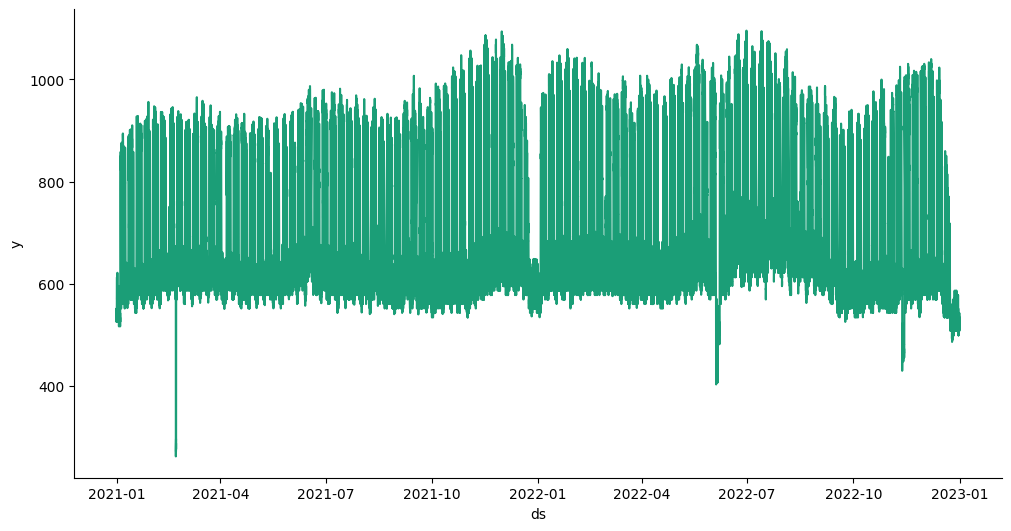

In [52]:
# @title ds vs y

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ds']
  ys = series['y']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = joint.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('y')

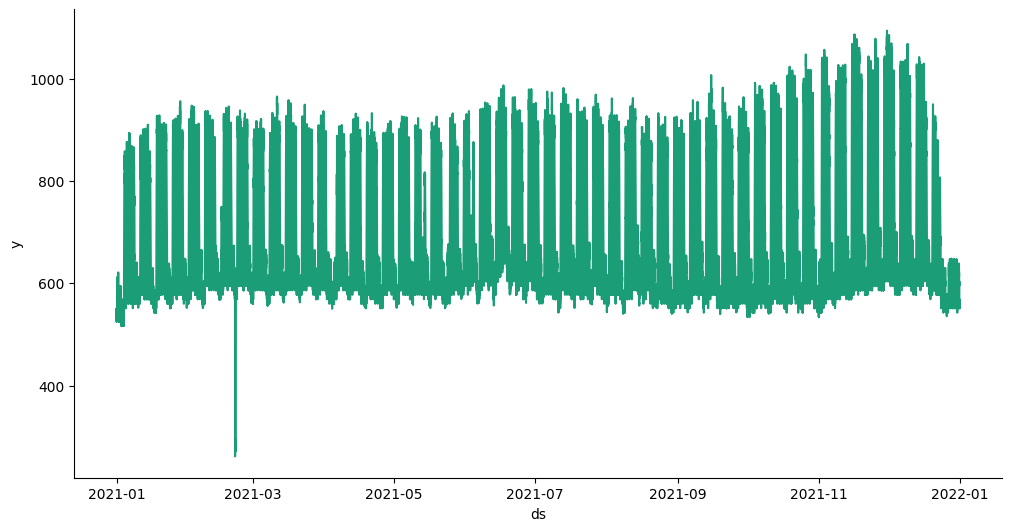

In [9]:
# @title ds vs y

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ds']
  ys = series['y']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('y')

In [12]:
import pandas as pd
from prophet import Prophet


In [57]:
#make basic model prediction on the 2021 data

m = Prophet()

m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/6foc_xut.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/d67ff_b2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89116', 'data', 'file=/tmp/tmps1dze5ex/6foc_xut.json', 'init=/tmp/tmps1dze5ex/d67ff_b2.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelc65lbtk6/prophet_model-20240507072129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:21:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:21:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [23]:
#create a  dataframe to make predictions
import pandas as pd


freq = '15min'  # Frequency of 15 minutes
num_periods = 35040  # Number of periods of 15 mins for 1 year

# Define the start date and time of your future data
start_date = df['ds'].min()


future_dates = pd.date_range(start=start_date, periods=num_periods, freq=freq)

future_df = pd.DataFrame({'ds': future_dates})

print(future_df)


                       ds
0     2021-01-01 00:15:00
1     2021-01-01 00:30:00
2     2021-01-01 00:45:00
3     2021-01-01 01:00:00
4     2021-01-01 01:15:00
...                   ...
35035 2021-12-31 23:00:00
35036 2021-12-31 23:15:00
35037 2021-12-31 23:30:00
35038 2021-12-31 23:45:00
35039 2022-01-01 00:00:00

[35040 rows x 1 columns]


In [59]:
# Make predictions
forecast = m.predict(future_df)

# Print the forecast of actual lower and upper limits
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

                       ds        yhat  yhat_lower  yhat_upper
35035 2021-12-31 23:00:00  583.401961  500.507467  667.734317
35036 2021-12-31 23:15:00  579.099696  490.121339  660.490404
35037 2021-12-31 23:30:00  575.260526  486.630138  659.852414
35038 2021-12-31 23:45:00  571.848932  482.880378  656.716654
35039 2022-01-01 00:00:00  568.817453  477.963738  649.358002


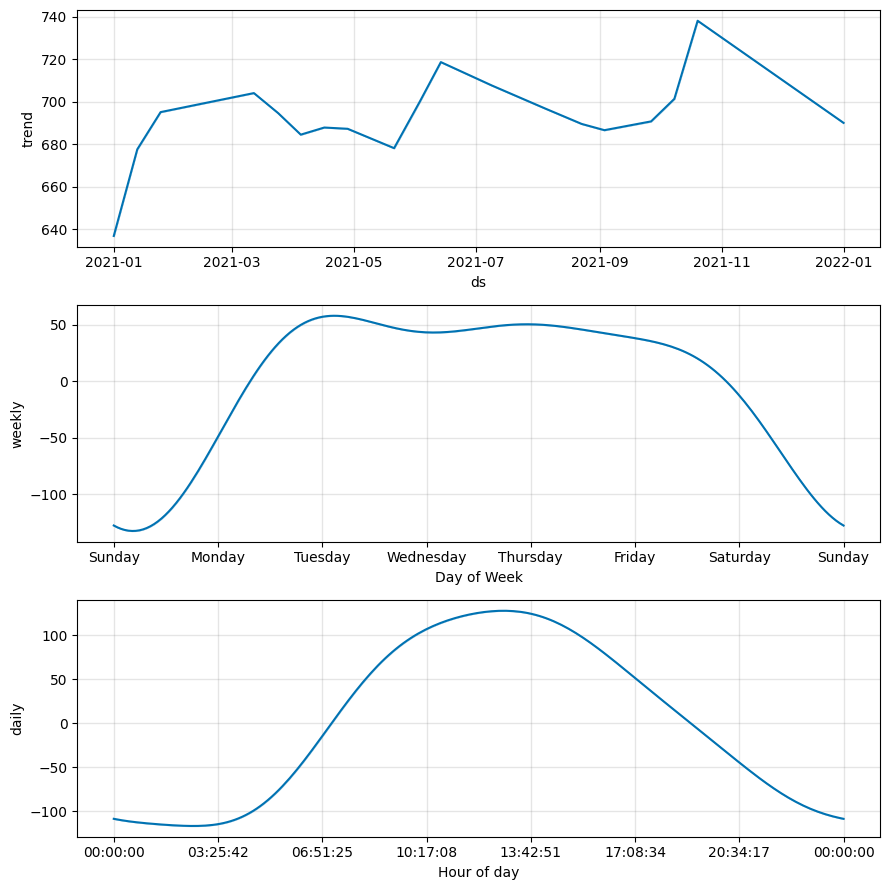

In [60]:
#captured yearly trends
fig2 = m.plot_components(forecast)

A loop to start training on the 2021 data and make predictions on each day of 2022 and include that day data for the next training and predict the subsequent day.

In [53]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
for i in range(365):
  data = joint.iloc[:35040+96*i]
  print(len(data),"data")
  m = Prophet()
  m.fit(data)
  freq = '15min'
  # Assuming you have already defined your frequency and the number of periods
  freq = '15min'  # Frequency of 15 minutes
  num_periods = 96  # Number of periods

  # Define the start date and time of your future data
  start_date = data['ds'].max()  # Assuming 'ds' is your datetime column, adjust as needed

  # Create a DatetimeIndex for the future dates
  future_dates = pd.date_range(start=start_date, periods=num_periods, freq=freq)

  # Create a DataFrame with the future dates
  future_df = pd.DataFrame({'ds': future_dates})



  forecast = m.predict(future_df)
  print(len(forecast),"forecast")
  forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

  prediction= forecast['yhat']
  actual_values= joint.iloc[35040+96*i:35040+96*i+96,[1]]
  mse = mean_squared_error(actual_values, prediction)


  print(prediction)
  print(actual_values)



  print("Mean Squared Error:", mse)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


35040 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/rnhe51df.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/o7thjf_0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33590', 'data', 'file=/tmp/tmps1dze5ex/rnhe51df.json', 'init=/tmp/tmps1dze5ex/o7thjf_0.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model2ber861s/prophet_model-20240507040740.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:07:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:07:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     568.817453
1     566.110197
2     563.667116
3     561.428767
4     559.341253
         ...    
91    469.892437
92    465.506850
93    461.646548
94    458.290713
95    455.404019
Name: yhat, Length: 96, dtype: float64
             y
35040  551.242
35041  542.500
35042  551.242
35043  568.750
35044  559.992
...        ...
35131  551.242
35132  560.000
35133  551.242
35134  568.750
35135  551.242

[96 rows x 1 columns]
Mean Squared Error: 8077.577137669308
35136 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/872ee1zv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/cbkoxuhh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23443', 'data', 'file=/tmp/tmps1dze5ex/872ee1zv.json', 'init=/tmp/tmps1dze5ex/cbkoxuhh.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelgf7tt8rm/prophet_model-20240507040801.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:08:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:08:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/2pfndg5s.json


96 forecast
0     452.696971
1     450.219007
2     448.107460
3     446.303192
4     444.747592
         ...    
91    536.810311
92    534.266353
93    532.227350
94    530.687994
95    529.627146
Name: yhat, Length: 96, dtype: float64
             y
35136  551.250
35137  551.242
35138  542.500
35139  542.492
35140  551.250
...        ...
35227  568.742
35228  551.250
35229  551.242
35230  568.750
35231  542.492

[96 rows x 1 columns]
Mean Squared Error: 8495.9757001503
35232 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/atwm7hfl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35640', 'data', 'file=/tmp/tmps1dze5ex/2pfndg5s.json', 'init=/tmp/tmps1dze5ex/atwm7hfl.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelc7gs7g3c/prophet_model-20240507040822.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:08:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:08:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/1affdbhp.json


96 forecast
0     526.373694
1     526.174537
2     526.314821
3     526.734113
4     527.372546
         ...    
91    648.618701
92    644.674706
93    641.213113
94    638.229264
95    635.702615
Name: yhat, Length: 96, dtype: float64
             y
35232  551.250
35233  551.242
35234  551.250
35235  551.242
35236  551.250
...        ...
35323  586.250
35324  586.242
35325  595.000
35326  586.242
35327  560.000

[96 rows x 1 columns]
Mean Squared Error: 4180.494647783103
35328 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/f7dr47zw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84098', 'data', 'file=/tmp/tmps1dze5ex/1affdbhp.json', 'init=/tmp/tmps1dze5ex/f7dr47zw.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelvga83kna/prophet_model-20240507040853.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:08:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:09:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/teomqf_m.json


96 forecast
0     635.521331
1     633.800856
2     632.399713
3     631.257723
4     630.315384
         ...    
91    637.208389
92    632.918823
93    629.140099
94    625.866706
95    623.077130
Name: yhat, Length: 96, dtype: float64
             y
35328  577.492
35329  577.500
35330  577.492
35331  577.500
35332  568.742
...        ...
35419  612.500
35420  594.992
35421  603.750
35422  594.992
35423  577.500

[96 rows x 1 columns]
Mean Squared Error: 3865.750853781469
35424 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/8xts9l9e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12917', 'data', 'file=/tmp/tmps1dze5ex/teomqf_m.json', 'init=/tmp/tmps1dze5ex/8xts9l9e.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelfliwk_ru/prophet_model-20240507040918.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:09:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:09:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/sa4z6lok.json


96 forecast
0     621.511194
1     619.556537
2     617.945516
3     616.617647
4     615.513117
         ...    
91    643.685954
92    639.474471
93    635.763148
94    632.546500
95    629.803048
Name: yhat, Length: 96, dtype: float64
             y
35424  577.492
35425  577.500
35426  577.492
35427  577.500
35428  577.492
...        ...
35515  603.742
35516  595.000
35517  586.242
35518  595.000
35519  586.242

[96 rows x 1 columns]
Mean Squared Error: 4178.598318353204
35520 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/4is5k1pv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52330', 'data', 'file=/tmp/tmps1dze5ex/sa4z6lok.json', 'init=/tmp/tmps1dze5ex/4is5k1pv.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model2lzffciy/prophet_model-20240507040945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:09:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:10:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/pnyiy86q.json


96 forecast
0     628.133899
1     626.210278
2     624.620486
3     623.303861
4     622.200412
         ...    
91    631.817866
92    627.432230
93    623.551608
94    620.170431
95    617.267065
Name: yhat, Length: 96, dtype: float64
             y
35520  586.250
35521  594.992
35522  586.250
35523  586.242
35524  586.250
...        ...
35611  594.992
35612  586.250
35613  594.992
35614  586.250
35615  577.492

[96 rows x 1 columns]
Mean Squared Error: 3995.0368632245395
35616 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ypqzkizg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81186', 'data', 'file=/tmp/tmps1dze5ex/pnyiy86q.json', 'init=/tmp/tmps1dze5ex/ypqzkizg.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelwu3jiery/prophet_model-20240507041014.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:10:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:10:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/lksiwjzf.json


96 forecast
0     616.026990
1     613.951538
2     612.212359
3     610.748424
4     609.499441
         ...    
91    586.302993
92    581.019188
93    576.228444
94    571.925166
95    568.087676
Name: yhat, Length: 96, dtype: float64
             y
35616  577.500
35617  568.742
35618  577.500
35619  568.742
35620  595.000
...        ...
35707  595.000
35708  603.742
35709  595.000
35710  594.992
35711  586.250

[96 rows x 1 columns]
Mean Squared Error: 5461.2837730086385
35712 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/kga2tj0f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58227', 'data', 'file=/tmp/tmps1dze5ex/lksiwjzf.json', 'init=/tmp/tmps1dze5ex/kga2tj0f.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modeluupf5wi1/prophet_model-20240507041034.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:10:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:10:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/c_nikop3.json


96 forecast
0     566.936058
1     563.888857
2     561.166325
3     558.707853
4     556.453598
         ...    
91    468.990307
92    464.062023
93    459.667719
94    455.802113
95    452.443814
Name: yhat, Length: 96, dtype: float64
             y
35712  577.492
35713  586.250
35714  577.492
35715  577.500
35716  577.492
...        ...
35803  577.492
35804  577.500
35805  594.992
35806  577.500
35807  577.492

[96 rows x 1 columns]
Mean Squared Error: 3973.3408444308807
35808 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/nm1jtsql.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80182', 'data', 'file=/tmp/tmps1dze5ex/c_nikop3.json', 'init=/tmp/tmps1dze5ex/nm1jtsql.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model95q6z01c/prophet_model-20240507041055.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:10:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:11:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     450.158668
1     447.671244
2     445.550787
3     443.737638
4     442.172836
         ...    
91    534.228334
92    531.678236
93    529.636803
94    528.098213
95    527.040680
Name: yhat, Length: 96, dtype: float64
             y
35808  577.500
35809  577.492
35810  595.000
35811  577.492
35812  568.750
...        ...
35899  586.250
35900  568.742
35901  586.250
35902  603.742
35903  577.500

[96 rows x 1 columns]
Mean Squared Error: 7789.182337691166
35904 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ap4u4myi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/554u13ir.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98149', 'data', 'file=/tmp/tmps1dze5ex/ap4u4myi.json', 'init=/tmp/tmps1dze5ex/554u13ir.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model_ctayarr/prophet_model-20240507041120.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:11:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:11:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     526.676578
1     526.480366
2     526.623549
3     527.045045
4     527.684551
         ...    
91    649.007115
92    645.051746
93    641.582888
94    638.595196
95    636.067302
Name: yhat, Length: 96, dtype: float64
             y
35904  586.242
35905  586.250
35906  577.492
35907  577.500
35908  586.242
...        ...
35995  621.250
35996  603.742
35997  612.500
35998  603.742
35999  595.000

[96 rows x 1 columns]
Mean Squared Error: 10925.193720448617
36000 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/jdptcy2k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/jrfc4g7m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39537', 'data', 'file=/tmp/tmps1dze5ex/jdptcy2k.json', 'init=/tmp/tmps1dze5ex/jrfc4g7m.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelljowo1zv/prophet_model-20240507041142.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:11:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:12:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     637.613994
1     635.888943
2     634.483376
3     633.336351
4     632.387801
         ...    
91    638.870868
92    634.572149
93    630.789068
94    627.515398
95    624.728750
Name: yhat, Length: 96, dtype: float64
             y
36000  603.742
36001  603.750
36002  594.992
36003  586.242
36004  595.000
...        ...
36091  595.000
36092  603.742
36093  595.000
36094  603.742
36095  595.000

[96 rows x 1 columns]
Mean Squared Error: 6946.107309472842
36096 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/3dz306i6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/3smh2byn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35471', 'data', 'file=/tmp/tmps1dze5ex/3dz306i6.json', 'init=/tmp/tmps1dze5ex/3smh2byn.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modeljgxd70lc/prophet_model-20240507041204.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:12:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:12:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


96 forecast
0     624.624395
1     622.677441
2     621.074657
3     619.754520
4     618.656383
         ...    
91    646.755844
92    642.535241
93    638.820615
94    635.605666
95    632.867890
Name: yhat, Length: 96, dtype: float64
             y
36096  603.742
36097  586.250
36098  586.242
36099  594.992
36100  595.000
...        ...
36187  603.750
36188  594.992
36189  612.500
36190  612.492
36191  595.000

[96 rows x 1 columns]
Mean Squared Error: 6577.480097632345
36192 data


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/r6rnu1ze.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/y6_vi8pp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15971', 'data', 'file=/tmp/tmps1dze5ex/r6rnu1ze.json', 'init=/tmp/tmps1dze5ex/y6_vi8pp.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model2hgnom18/prophet_model-20240507041221.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:12:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:12:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


96 forecast
0     632.655874
1     630.742264
2     629.162380
3     627.854352
4     626.757242
         ...    
91    636.129959
92    631.739477
93    627.860707
94    624.487020
95    621.595490
Name: yhat, Length: 96, dtype: float64
             y
36192  594.992
36193  586.250
36194  586.242
36195  595.000
36196  586.242
...        ...
36283  621.242
36284  621.250
36285  594.992
36286  603.750
36287  603.742

[96 rows x 1 columns]
Mean Squared Error: 6760.320732768541
36288 data


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/lbvb1ktc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/kizuamqb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39332', 'data', 'file=/tmp/tmps1dze5ex/lbvb1ktc.json', 'init=/tmp/tmps1dze5ex/kizuamqb.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model3xguic_b/prophet_model-20240507041250.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:12:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:13:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     621.677607
1     619.611974
2     617.883172
3     616.429042
4     615.188402
         ...    
91    591.931145
92    586.632627
93    581.833743
94    577.527946
95    573.692377
Name: yhat, Length: 96, dtype: float64
             y
36288  595.000
36289  594.992
36290  595.000
36291  612.492
36292  595.000
...        ...
36379  595.000
36380  586.242
36381  586.250
36382  586.242
36383  586.250

[96 rows x 1 columns]
Mean Squared Error: 5334.754352181707
36384 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/gzwf4oae.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/w5zvnhzf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73457', 'data', 'file=/tmp/tmps1dze5ex/gzwf4oae.json', 'init=/tmp/tmps1dze5ex/w5zvnhzf.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model0qx6iez8/prophet_model-20240507041313.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:13:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:13:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


96 forecast
0     572.424147
1     569.387347
2     566.675886
3     564.227931
4     561.982657
         ...    
91    474.144105
92    469.205880
93    464.808938
94    460.946995
95    457.597416
Name: yhat, Length: 96, dtype: float64
             y
36384  577.492
36385  577.500
36386  594.992
36387  586.250
36388  577.492
...        ...
36475  586.242
36476  577.500
36477  577.492
36478  577.500
36479  568.742

[96 rows x 1 columns]
Mean Squared Error: 3942.0953913239077
36480 data


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/hpqbd2vw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/3lop7smr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48566', 'data', 'file=/tmp/tmps1dze5ex/hpqbd2vw.json', 'init=/tmp/tmps1dze5ex/3lop7smr.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelex887okc/prophet_model-20240507041331.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:13:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:13:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     455.554447
1     453.084008
2     450.981476
3     449.185893
4     447.637253
         ...    
91    540.275043
92    537.726078
93    535.693285
94    534.169803
95    533.132551
Name: yhat, Length: 96, dtype: float64
             y
36480  577.500
36481  577.492
36482  586.250
36483  577.492
36484  568.750
...        ...
36571  586.250
36572  594.992
36573  577.500
36574  568.742
36575  577.500

[96 rows x 1 columns]
Mean Squared Error: 7749.088336352961
36576 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/xnpwgc6_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/uymd_d4y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97511', 'data', 'file=/tmp/tmps1dze5ex/xnpwgc6_.json', 'init=/tmp/tmps1dze5ex/uymd_d4y.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modeldw3f299j/prophet_model-20240507041357.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:13:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:14:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     532.121015
1     531.951925
2     532.123220
3     532.572460
4     533.238223
         ...    
91    654.990200
92    651.024637
93    647.553246
94    644.569684
95    642.051306
Name: yhat, Length: 96, dtype: float64
             y
36576  577.492
36577  577.500
36578  568.742
36579  595.000
36580  586.242
...        ...
36667  621.242
36668  612.500
36669  594.992
36670  595.000
36671  594.992

[96 rows x 1 columns]
Mean Squared Error: 12091.833386717495
36672 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/j_tzw8nu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/7kfo07c5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94158', 'data', 'file=/tmp/tmps1dze5ex/j_tzw8nu.json', 'init=/tmp/tmps1dze5ex/7kfo07c5.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelexi80t4j/prophet_model-20240507041424.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:14:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:14:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


96 forecast
0     643.332608
1     641.622928
2     640.234281
3     639.104266
4     638.171552
         ...    
91    644.374628
92    640.062327
93    636.273952
94    633.002426
95    630.224183
Name: yhat, Length: 96, dtype: float64
             y
36672  603.750
36673  594.992
36674  586.250
36675  603.742
36676  595.000
...        ...
36763  612.500
36764  612.492
36765  603.750
36766  603.742
36767  612.500

[96 rows x 1 columns]
Mean Squared Error: 6054.897047003281
36768 data


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/mp0t9lzr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/6e6t1qm2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24360', 'data', 'file=/tmp/tmps1dze5ex/mp0t9lzr.json', 'init=/tmp/tmps1dze5ex/6e6t1qm2.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelddtfiavs/prophet_model-20240507041444.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:14:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:15:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


96 forecast
0     629.354995
1     627.419809
2     625.829880
3     624.522725
4     623.436935
         ...    
91    651.878838
92    647.651229
93    643.935738
94    640.725230
95    637.996185
Name: yhat, Length: 96, dtype: float64
             y
36768  586.242
36769  586.250
36770  594.992
36771  594.992
36772  595.000
...        ...
36859  603.742
36860  612.500
36861  603.742
36862  603.750
36863  603.742

[96 rows x 1 columns]
Mean Squared Error: 9324.733769145549
36864 data


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/1gru6jgb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/vf9waoyb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42322', 'data', 'file=/tmp/tmps1dze5ex/1gru6jgb.json', 'init=/tmp/tmps1dze5ex/vf9waoyb.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model18lpyj8v/prophet_model-20240507041508.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:15:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:15:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     637.593682
1     635.687936
2     634.117359
3     632.819344
4     631.732352
         ...    
91    641.136153
92    636.733686
93    632.848347
94    629.472907
95    626.583694
Name: yhat, Length: 96, dtype: float64
             y
36864  595.000
36865  612.492
36866  603.750
36867  594.992
36868  586.250
...        ...
36955  612.500
36956  603.742
36957  621.250
36958  594.992
36959  595.000

[96 rows x 1 columns]
Mean Squared Error: 7523.451418222784
36960 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/r9kima3s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ni2a470i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41236', 'data', 'file=/tmp/tmps1dze5ex/r9kima3s.json', 'init=/tmp/tmps1dze5ex/ni2a470i.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modeln46ts0ws/prophet_model-20240507041527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:15:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:15:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     625.998689
1     623.940686
2     622.221193
3     620.777247
4     619.546984
         ...    
91    596.269179
92    590.954567
93    586.144942
94    581.833207
95    577.995792
Name: yhat, Length: 96, dtype: float64
             y
36960  586.242
36961  603.750
36962  577.492
36963  595.000
36964  603.742
...        ...
37051  612.500
37052  603.742
37053  603.750
37054  586.242
37055  595.000

[96 rows x 1 columns]
Mean Squared Error: 5919.03100112042
37056 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/9ndzws00.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/4fji2m_m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20599', 'data', 'file=/tmp/tmps1dze5ex/9ndzws00.json', 'init=/tmp/tmps1dze5ex/4fji2m_m.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelfgja169p/prophet_model-20240507041542.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:15:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:16:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


96 forecast
0     577.161309
1     574.123748
2     571.412808
3     568.966194
4     566.722732
         ...    
91    478.485899
92    473.532314
93    469.124394
94    465.255366
95    461.902027
Name: yhat, Length: 96, dtype: float64
             y
37056  577.492
37057  586.250
37058  594.992
37059  568.750
37060  586.242
...        ...
37147  577.492
37148  586.250
37149  586.242
37150  577.500
37151  577.492

[96 rows x 1 columns]
Mean Squared Error: 3485.16576004445
37152 data


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/yrj7ders.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/igxfkr_v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35907', 'data', 'file=/tmp/tmps1dze5ex/yrj7ders.json', 'init=/tmp/tmps1dze5ex/igxfkr_v.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model_smxd4qg/prophet_model-20240507041611.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:16:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:16:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


96 forecast
0     459.267489
1     456.797730
2     454.697533
3     452.905518
4     451.361351
         ...    
91    544.758558
92    542.207092
93    540.175671
94    538.656998
95    537.627487
Name: yhat, Length: 96, dtype: float64
             y
37152  577.500
37153  577.492
37154  595.000
37155  577.492
37156  568.750
...        ...
37243  577.500
37244  577.492
37245  577.500
37246  586.242
37247  568.750

[96 rows x 1 columns]
Mean Squared Error: 7703.625788326357
37248 data


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/2kfkntps.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/t_bajby6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60093', 'data', 'file=/tmp/tmps1dze5ex/2kfkntps.json', 'init=/tmp/tmps1dze5ex/t_bajby6.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelm7pr3ta9/prophet_model-20240507041637.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:16:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:16:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     536.466522
1     536.310375
2     536.496041
3     536.960686
4     537.642583
         ...    
91    659.806043
92    655.820673
93    652.333200
94    649.336876
95    646.808591
Name: yhat, Length: 96, dtype: float64
             y
37248  577.492
37249  595.000
37250  586.242
37251  577.492
37252  577.500
...        ...
37339  612.500
37340  612.492
37341  621.250
37342  603.742
37343  595.000

[96 rows x 1 columns]
Mean Squared Error: 8654.484250191701
37344 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/1svzebue.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/l17popq9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3371', 'data', 'file=/tmp/tmps1dze5ex/1svzebue.json', 'init=/tmp/tmps1dze5ex/l17popq9.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model1dhkep0a/prophet_model-20240507041658.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:16:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:17:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     647.063559
1     645.351815
2     643.962024
3     642.831366
4     641.898232
         ...    
91    648.065765
92    643.742507
93    639.947197
94    636.672186
95    633.893281
Name: yhat, Length: 96, dtype: float64
             y
37344  594.992
37345  595.000
37346  594.992
37347  603.750
37348  603.742
...        ...
37435  612.500
37436  603.742
37437  595.000
37438  612.492
37439  612.500

[96 rows x 1 columns]
Mean Squared Error: 7387.408701822281
37440 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/f_gg7h6q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/slaadw9b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19716', 'data', 'file=/tmp/tmps1dze5ex/f_gg7h6q.json', 'init=/tmp/tmps1dze5ex/slaadw9b.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model58m1j34_/prophet_model-20240507041724.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:17:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:17:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     633.541348
1     631.610956
2     630.027769
3     628.728554
4     627.651259
         ...    
91    656.298303
92    652.052517
93    648.324088
94    645.105434
95    642.372422
Name: yhat, Length: 96, dtype: float64
             y
37440  603.742
37441  603.750
37442  594.992
37443  586.250
37444  612.492
...        ...
37531  612.492
37532  630.000
37533  603.742
37534  612.500
37535  594.992

[96 rows x 1 columns]
Mean Squared Error: 9499.770053150132
37536 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/8de56k5o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/2wffuost.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24997', 'data', 'file=/tmp/tmps1dze5ex/8de56k5o.json', 'init=/tmp/tmps1dze5ex/2wffuost.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modeljc_aksho/prophet_model-20240507041743.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:17:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:18:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


96 forecast
0     642.618338
1     640.717806
2     639.153637
3     637.862378
4     636.781807
         ...    
91    646.116762
92    641.697087
93    637.800080
94    634.417879
95    631.526001
Name: yhat, Length: 96, dtype: float64
             y
37536  595.000
37537  603.742
37538  603.750
37539  594.992
37540  594.992
...        ...
37627  621.250
37628  603.742
37629  612.500
37630  603.742
37631  595.000

[96 rows x 1 columns]
Mean Squared Error: 8299.035793366447
37632 data


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/a4wxwi60.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/wbf83j8v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85153', 'data', 'file=/tmp/tmps1dze5ex/a4wxwi60.json', 'init=/tmp/tmps1dze5ex/wbf83j8v.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model8jr4yhtq/prophet_model-20240507041807.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:18:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:18:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/t

96 forecast
0     631.482215
1     629.426207
2     627.710328
3     626.270867
4     625.045324
         ...    
91    601.604482
92    596.268854
93    591.443308
94    587.120256
95    583.275472
Name: yhat, Length: 96, dtype: float64
             y
37632  603.742
37633  612.500
37634  594.992
37635  595.000
37636  594.992
...        ...
37723  568.750
37724  568.742
37725  586.250
37726  559.992
37727  560.000

[96 rows x 1 columns]
Mean Squared Error: 4412.697062441382
37728 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/8ckzcisc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71842', 'data', 'file=/tmp/tmps1dze5ex/z0m1oota.json', 'init=/tmp/tmps1dze5ex/8ckzcisc.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modeljxg8lw1h/prophet_model-20240507041821.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:18:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:18:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/_kybgs1m.json


96 forecast
0     581.050827
1     578.022963
2     575.323247
3     572.888235
4     570.655732
         ...    
91    482.101134
92    477.134317
93    472.719806
94    468.850173
95    465.501326
Name: yhat, Length: 96, dtype: float64
             y
37728  559.992
37729  560.000
37730  559.992
37731  577.500
37732  551.242
...        ...
37819  586.242
37820  586.250
37821  586.242
37822  603.750
37823  586.242

[96 rows x 1 columns]
Mean Squared Error: 5126.747093979645
37824 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ul9gfy5n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77285', 'data', 'file=/tmp/tmps1dze5ex/_kybgs1m.json', 'init=/tmp/tmps1dze5ex/ul9gfy5n.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modeltzzxg7ex/prophet_model-20240507041847.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:18:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:19:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     461.845496
1     459.384938
2     457.295422
3     455.514639
4     453.981446
         ...    
91    547.906756
92    545.347744
93    543.314302
94    541.798586
95    540.776259
Name: yhat, Length: 96, dtype: float64
             y
37824  577.500
37825  577.492
37826  577.500
37827  577.492
37828  568.750
...        ...
37915  577.500
37916  577.492
37917  568.750
37918  577.492
37919  568.750

[96 rows x 1 columns]
Mean Squared Error: 7811.922401950273
37920 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/b9g6pe5f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/aepiqvb9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34807', 'data', 'file=/tmp/tmps1dze5ex/b9g6pe5f.json', 'init=/tmp/tmps1dze5ex/aepiqvb9.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model0zh0l7yz/prophet_model-20240507041912.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:19:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:19:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     539.432490
1     539.290412
2     539.491313
3     539.971470
4     540.668396
         ...    
91    663.288917
92    659.292194
93    655.798625
94    652.800882
95    650.275089
Name: yhat, Length: 96, dtype: float64
             y
37920  568.742
37921  586.250
37922  577.492
37923  560.000
37924  568.742
...        ...
38011  603.750
38012  612.492
38013  612.500
38014  603.742
38015  595.000

[96 rows x 1 columns]
Mean Squared Error: 7897.732857752496
38016 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ojl8p4_k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/6keohztt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79747', 'data', 'file=/tmp/tmps1dze5ex/ojl8p4_k.json', 'init=/tmp/tmps1dze5ex/6keohztt.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modeloxfhs_zo/prophet_model-20240507041936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:19:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:19:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     650.925875
1     649.222646
2     647.842602
3     646.722127
4     645.798922
         ...    
91    652.028347
92    647.692516
93    643.889659
94    640.611609
95    637.833497
Name: yhat, Length: 96, dtype: float64
             y
38016  586.242
38017  577.500
38018  594.992
38019  595.000
38020  586.242
...        ...
38107  612.492
38108  612.492
38109  621.250
38110  603.742
38111  621.250

[96 rows x 1 columns]
Mean Squared Error: 7314.45741290717
38112 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/nt1u2bxq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/z3xre84e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79545', 'data', 'file=/tmp/tmps1dze5ex/nt1u2bxq.json', 'init=/tmp/tmps1dze5ex/z3xre84e.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelvb3tw5ot/prophet_model-20240507041959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:19:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:20:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     637.383879
1     635.455927
2     633.876744
3     632.582454
4     631.510441
         ...    
91    660.429378
92    656.170189
93    652.432593
94    649.208672
95    646.473809
Name: yhat, Length: 96, dtype: float64
             y
38112  621.242
38113  586.250
38114  594.992
38115  595.000
38116  594.992
...        ...
38203  603.742
38204  603.750
38205  603.742
38206  603.750
38207  594.992

[96 rows x 1 columns]
Mean Squared Error: 6042.206989863881
38208 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/oe4cm6bn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/wt4nidmb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55524', 'data', 'file=/tmp/tmps1dze5ex/oe4cm6bn.json', 'init=/tmp/tmps1dze5ex/wt4nidmb.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelppn30iml/prophet_model-20240507042019.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:20:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:20:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     645.885777
1     643.993150
2     642.438961
3     641.159072
4     640.090611
         ...    
91    649.677081
92    645.238526
93    641.327047
94    637.934532
95    635.036091
Name: yhat, Length: 96, dtype: float64
             y
38208  595.000
38209  594.992
38210  586.250
38211  594.992
38212  586.250
...        ...
38299  612.492
38300  612.500
38301  603.742
38302  595.000
38303  603.742

[96 rows x 1 columns]
Mean Squared Error: 6957.217801974821
38304 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/r_lua4ix.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/baogppt_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74362', 'data', 'file=/tmp/tmps1dze5ex/r_lua4ix.json', 'init=/tmp/tmps1dze5ex/baogppt_.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelqfd5mu_t/prophet_model-20240507042049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:20:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:21:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     634.843979
1     632.787775
2     631.073597
3     629.637029
4     628.414919
         ...    
91    604.515956
92    599.155921
93    594.310646
94    589.972291
95    586.116207
Name: yhat, Length: 96, dtype: float64
             y
38304  586.250
38305  594.992
38306  594.992
38307  595.000
38308  586.242
...        ...
38395  603.742
38396  595.000
38397  594.992
38398  603.750
38399  603.742

[96 rows x 1 columns]
Mean Squared Error: 5899.5446219275445
38400 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/vev6g25n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/y7vp2bar.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52161', 'data', 'file=/tmp/tmps1dze5ex/vev6g25n.json', 'init=/tmp/tmps1dze5ex/y7vp2bar.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelj7o88ka4/prophet_model-20240507042117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:21:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:21:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/k5rwcaud.json


96 forecast
0     585.481467
1     582.438987
2     579.727138
3     577.281983
4     575.040867
         ...    
91    486.279151
92    481.288871
93    476.855029
94    472.970134
95    469.609880
Name: yhat, Length: 96, dtype: float64
             y
38400  586.250
38401  586.242
38402  586.250
38403  586.242
38404  595.000
...        ...
38491  603.750
38492  594.992
38493  595.000
38494  586.242
38495  586.250

[96 rows x 1 columns]
Mean Squared Error: 3666.095716272424
38496 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/um40p3ei.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59689', 'data', 'file=/tmp/tmps1dze5ex/k5rwcaud.json', 'init=/tmp/tmps1dze5ex/um40p3ei.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelm11k8vko/prophet_model-20240507042139.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:21:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:22:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     467.326655
1     464.864828
2     462.776641
3     460.999102
4     459.470435
         ...    
91    553.943059
92    551.371058
93    549.329412
94    547.810095
95    546.788409
Name: yhat, Length: 96, dtype: float64
             y
38496  586.242
38497  595.000
38498  594.992
38499  586.250
38500  577.492
...        ...
38587  577.492
38588  577.500
38589  577.492
38590  577.500
38591  586.242

[96 rows x 1 columns]
Mean Squared Error: 7955.869838657883
38592 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/v4b6_09l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/519gybpc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61795', 'data', 'file=/tmp/tmps1dze5ex/v4b6_09l.json', 'init=/tmp/tmps1dze5ex/519gybpc.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modely7yef4ct/prophet_model-20240507042206.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:22:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:22:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


96 forecast
0     546.109246
1     545.974879
2     546.186254
3     546.678886
4     547.389564
         ...    
91    670.547368
92    666.530726
93    663.022319
94    660.014685
95    657.483606
Name: yhat, Length: 96, dtype: float64
             y
38592  586.250
38593  577.492
38594  568.750
38595  568.742
38596  577.500
...        ...
38683  621.242
38684  621.242
38685  612.500
38686  603.742
38687  603.750

[96 rows x 1 columns]
Mean Squared Error: 5991.3691502618485
38688 data


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/lhxbd5em.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/n6ptjow2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34824', 'data', 'file=/tmp/tmps1dze5ex/lhxbd5em.json', 'init=/tmp/tmps1dze5ex/n6ptjow2.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelinedm0vp/prophet_model-20240507042230.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:22:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:22:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     657.672200
1     655.970153
2     654.594234
3     653.480163
4     652.564992
         ...    
91    659.071778
92    654.710761
93    650.887443
94    647.593641
95    644.804266
Name: yhat, Length: 96, dtype: float64
             y
38688  603.742
38689  595.000
38690  621.242
38691  595.000
38692  594.992
...        ...
38779  603.750
38780  603.742
38781  612.500
38782  629.992
38783  603.750

[96 rows x 1 columns]
Mean Squared Error: 5460.951957160458
38784 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/xl661n5b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/nwq1teu7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49758', 'data', 'file=/tmp/tmps1dze5ex/xl661n5b.json', 'init=/tmp/tmps1dze5ex/nwq1teu7.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelk0_9r52k/prophet_model-20240507042248.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:22:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:23:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/l5uw_uvd.json


96 forecast
0     644.351151
1     642.429398
2     640.858591
3     639.573979
4     638.512153
         ...    
91    667.619248
92    663.344311
93    659.596538
94    656.367660
95    653.632497
Name: yhat, Length: 96, dtype: float64
             y
38784  586.242
38785  595.000
38786  594.992
38787  603.750
38788  603.742
...        ...
38875  612.500
38876  603.742
38877  595.000
38878  603.742
38879  595.000

[96 rows x 1 columns]
Mean Squared Error: 3414.8867443191025
38880 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/0k2w6w3_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48405', 'data', 'file=/tmp/tmps1dze5ex/l5uw_uvd.json', 'init=/tmp/tmps1dze5ex/0k2w6w3_.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelhu3w930s/prophet_model-20240507042319.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:23:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:23:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


96 forecast
0     652.081591
1     650.198627
2     648.656505
3     647.390104
4     646.335654
         ...    
91    656.459725
92    652.001277
93    648.075686
94    644.674537
95    641.772370
Name: yhat, Length: 96, dtype: float64
             y
38880  603.742
38881  595.000
38882  586.242
38883  586.250
38884  586.242
...        ...
38971  621.242
38972  612.500
38973  612.492
38974  595.000
38975  612.492

[96 rows x 1 columns]
Mean Squared Error: 6138.722494368678
38976 data


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/9rrojtnw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/2wufha0c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34005', 'data', 'file=/tmp/tmps1dze5ex/9rrojtnw.json', 'init=/tmp/tmps1dze5ex/2wufha0c.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelannl7mud/prophet_model-20240507042342.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:23:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:23:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


96 forecast
0     641.057578
1     639.003721
2     637.294035
3     635.863316
4     634.647700
         ...    
91    610.604581
92    605.218851
93    600.352987
94    595.998915
95    592.131534
Name: yhat, Length: 96, dtype: float64
             y
38976  595.000
38977  612.492
38978  603.750
38979  594.992
38980  586.250
...        ...
39067  603.750
39068  603.742
39069  621.250
39070  603.742
39071  603.750

[96 rows x 1 columns]
Mean Squared Error: 2690.7506934879634
39072 data


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/67ur9c14.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/byzuz72i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22162', 'data', 'file=/tmp/tmps1dze5ex/67ur9c14.json', 'init=/tmp/tmps1dze5ex/byzuz72i.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelp8uj5csl/prophet_model-20240507042354.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:23:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:24:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     590.710174
1     587.669975
2     584.962083
3     582.521668
4     580.285297
         ...    
91    491.621300
92    486.614855
93    482.170140
94    478.279264
95    474.917291
Name: yhat, Length: 96, dtype: float64
             y
39072  594.992
39073  603.750
39074  594.992
39075  612.500
39076  603.742
...        ...
39163  603.742
39164  595.000
39165  586.242
39166  586.250
39167  586.242

[96 rows x 1 columns]
Mean Squared Error: 3874.2997533043704
39168 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/6akj6qya.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/8r79y4c0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23438', 'data', 'file=/tmp/tmps1dze5ex/6akj6qya.json', 'init=/tmp/tmps1dze5ex/8r79y4c0.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model2778zeoq/prophet_model-20240507042414.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:24:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:24:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     472.738116
1     470.281835
2     468.200913
3     466.431411
4     464.910719
         ...    
91    559.659908
92    557.077529
93    555.031110
94    553.512216
95    552.495500
Name: yhat, Length: 96, dtype: float64
             y
39168  586.250
39169  603.742
39170  577.500
39171  577.492
39172  586.250
...        ...
39259  595.000
39260  586.242
39261  595.000
39262  594.992
39263  595.000

[96 rows x 1 columns]
Mean Squared Error: 7759.018379546428
39264 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/4zejiuw6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/t8xxfz_c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4999', 'data', 'file=/tmp/tmps1dze5ex/4zejiuw6.json', 'init=/tmp/tmps1dze5ex/t8xxfz_c.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelcorx5lak/prophet_model-20240507042434.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:24:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:25:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/k9sg22nb.json


96 forecast
0     552.238247
1     552.112857
2     552.335113
3     552.839699
4     553.562662
         ...    
91    677.315622
92    673.283070
93    669.763740
94    666.749851
95    664.216644
Name: yhat, Length: 96, dtype: float64
             y
39264  594.992
39265  586.250
39266  577.492
39267  586.250
39268  594.992
...        ...
39355  612.500
39356  612.492
39357  621.242
39358  603.750
39359  594.992

[96 rows x 1 columns]
Mean Squared Error: 6127.954475260453
39360 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/wo28f_ok.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98256', 'data', 'file=/tmp/tmps1dze5ex/k9sg22nb.json', 'init=/tmp/tmps1dze5ex/wo28f_ok.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modeltipy7vzr/prophet_model-20240507042504.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:25:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:25:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     663.752400
1     662.057489
2     660.690358
3     659.585840
4     658.680207
         ...    
91    665.064042
92    660.685029
93    656.849050
94    653.547557
95    650.754869
Name: yhat, Length: 96, dtype: float64
             y
39360  595.000
39361  594.992
39362  603.750
39363  594.992
39364  595.000
...        ...
39451  603.750
39452  638.742
39453  612.500
39454  612.492
39455  595.000

[96 rows x 1 columns]
Mean Squared Error: 2937.2108536643723
39456 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/9vsusw8q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/j_d42kck.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6716', 'data', 'file=/tmp/tmps1dze5ex/9vsusw8q.json', 'init=/tmp/tmps1dze5ex/j_d42kck.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modeld4fnky2w/prophet_model-20240507042539.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:25:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:25:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


96 forecast
0     648.748270
1     646.829012
2     645.262575
3     643.983519
4     642.927842
         ...    
91    672.575704
92    668.288471
93    664.532826
94    661.300251
95    658.565107
Name: yhat, Length: 96, dtype: float64
             y
39456  594.992
39457  603.750
39458  612.492
39459  595.000
39460  594.992
...        ...
39547  612.492
39548  612.500
39549  612.492
39550  603.750
39551  612.492

[96 rows x 1 columns]
Mean Squared Error: 4641.975444420593
39552 data


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/z4blfmd3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/_f_y96l4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51466', 'data', 'file=/tmp/tmps1dze5ex/z4blfmd3.json', 'init=/tmp/tmps1dze5ex/_f_y96l4.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model4z2xehmn/prophet_model-20240507042559.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:25:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:26:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     657.607051
1     655.724210
2     654.182751
3     652.917338
4     651.864143
         ...    
91    662.125897
92    657.652078
93    653.713888
94    650.302508
95    647.392017
Name: yhat, Length: 96, dtype: float64
             y
39552  595.000
39553  603.742
39554  595.000
39555  603.742
39556  603.750
...        ...
39643  612.500
39644  612.492
39645  603.750
39646  621.242
39647  621.250

[96 rows x 1 columns]
Mean Squared Error: 2636.453765860117
39648 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/w2z22ran.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/7ptxitz6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29474', 'data', 'file=/tmp/tmps1dze5ex/w2z22ran.json', 'init=/tmp/tmps1dze5ex/7ptxitz6.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model4ibypxkb/prophet_model-20240507042616.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:26:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:26:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/n6qz__8t.json


96 forecast
0     646.993884
1     644.943829
2     643.239016
3     641.813890
4     640.604376
         ...    
91    616.968440
92    611.569221
93    606.693141
94    602.331728
95    598.459390
Name: yhat, Length: 96, dtype: float64
             y
39648  594.992
39649  603.750
39650  594.992
39651  612.500
39652  612.492
...        ...
39739  612.492
39740  612.500
39741  603.742
39742  603.750
39743  603.742

[96 rows x 1 columns]
Mean Squared Error: 4072.279363609951
39744 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/o6z13djf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88821', 'data', 'file=/tmp/tmps1dze5ex/n6qz__8t.json', 'init=/tmp/tmps1dze5ex/o6z13djf.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model32cokzsc/prophet_model-20240507042641.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:26:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:27:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     596.721460
1     593.671783
2     590.957055
3     588.512591
4     586.275088
         ...    
91    497.400886
92    492.371919
93    487.906803
94    483.997841
95    480.620266
Name: yhat, Length: 96, dtype: float64
             y
39744  603.750
39745  594.992
39746  595.000
39747  603.742
39748  595.000
...        ...
39835  594.992
39836  612.500
39837  603.742
39838  595.000
39839  594.992

[96 rows x 1 columns]
Mean Squared Error: 4435.705886445718
39840 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/q6vlb091.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/9f93pbft.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1814', 'data', 'file=/tmp/tmps1dze5ex/q6vlb091.json', 'init=/tmp/tmps1dze5ex/9f93pbft.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelviwe7vvk/prophet_model-20240507042707.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:27:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:27:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/vlpnby_m.json


96 forecast
0     478.529569
1     476.062528
2     473.973792
3     472.199568
4     470.677384
         ...    
91    566.047216
92    563.449078
93    561.388840
94    559.858248
95    558.832113
Name: yhat, Length: 96, dtype: float64
             y
39840  595.000
39841  594.992
39842  612.500
39843  586.242
39844  595.000
...        ...
39931  595.000
39932  594.992
39933  586.250
39934  612.492
39935  603.750

[96 rows x 1 columns]
Mean Squared Error: 8082.892443543783
39936 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/8ilxth9m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28227', 'data', 'file=/tmp/tmps1dze5ex/vlpnby_m.json', 'init=/tmp/tmps1dze5ex/8ilxth9m.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelbnk2u9zx/prophet_model-20240507042724.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:27:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:27:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     559.060945
1     558.933875
2     559.156813
3     559.664518
4     560.393131
         ...    
91    684.315945
92    680.258512
93    676.716410
94    673.681952
95    671.130443
Name: yhat, Length: 96, dtype: float64
             y
39936  586.242
39937  586.250
39938  586.242
39939  595.000
39940  603.742
...        ...
40027  621.242
40028  603.750
40029  621.242
40030  603.750
40031  603.742

[96 rows x 1 columns]
Mean Squared Error: 4150.377350147639
40032 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/71b4rqzk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/i_j5d4ri.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29007', 'data', 'file=/tmp/tmps1dze5ex/71b4rqzk.json', 'init=/tmp/tmps1dze5ex/i_j5d4ri.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modeltwg9k_of/prophet_model-20240507042754.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:27:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:28:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


96 forecast
0     670.963709
1     669.257204
2     667.880780
3     666.769409
4     665.859529
         ...    
91    672.495063
92    668.100459
93    664.250815
94    660.937657
95    658.135365
Name: yhat, Length: 96, dtype: float64
             y
40032  612.500
40033  594.992
40034  603.750
40035  594.992
40036  586.250
...        ...
40123  603.742
40124  621.250
40125  594.992
40126  595.000
40127  594.992

[96 rows x 1 columns]
Mean Squared Error: 3516.8339462711097
40128 data


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/s7e422_f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/b4p0bdc8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44912', 'data', 'file=/tmp/tmps1dze5ex/s7e422_f.json', 'init=/tmp/tmps1dze5ex/b4p0bdc8.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modeld_n49duy/prophet_model-20240507042816.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:28:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:28:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/t

96 forecast
0     657.410758
1     655.491787
2     653.927677
3     652.652960
4     651.603665
         ...    
91    681.680249
92    677.377689
93    673.609268
94    670.366360
95    667.623190
Name: yhat, Length: 96, dtype: float64
             y
40128  595.000
40129  594.992
40130  595.000
40131  594.992
40132  586.250
...        ...
40219  603.742
40220  595.000
40221  603.742
40222  612.500
40223  594.992

[96 rows x 1 columns]
Mean Squared Error: 2371.1365645083483
40224 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/bsawsd1v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84747', 'data', 'file=/tmp/tmps1dze5ex/r3xqbnwq.json', 'init=/tmp/tmps1dze5ex/bsawsd1v.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modeli7j050sa/prophet_model-20240507042845.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:28:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:29:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


96 forecast
0     665.361078
1     663.482039
2     661.947089
3     660.690594
4     659.648443
         ...    
91    670.536085
92    666.048979
93    662.100980
94    658.683268
95    655.769805
Name: yhat, Length: 96, dtype: float64
             y
40224  586.250
40225  586.242
40226  595.000
40227  603.742
40228  595.000
...        ...
40315  612.492
40316  612.500
40317  594.992
40318  621.250
40319  603.742

[96 rows x 1 columns]
Mean Squared Error: 2216.8968281480884
40320 data


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/jxwiei2y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/y427mgbw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79722', 'data', 'file=/tmp/tmps1dze5ex/jxwiei2y.json', 'init=/tmp/tmps1dze5ex/y427mgbw.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelxd89o4z2/prophet_model-20240507042919.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:29:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:29:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     653.311103
1     651.262370
2     649.561187
3     648.141848
4     646.940165
         ...    
91    623.678311
92    618.260410
93    613.368562
94    608.994265
95    605.111818
Name: yhat, Length: 96, dtype: float64
             y
40320  595.000
40321  594.992
40322  603.750
40323  594.992
40324  612.500
...        ...
40411  612.492
40412  595.000
40413  612.492
40414  603.750
40415  603.742

[96 rows x 1 columns]
Mean Squared Error: 1346.0794994959676
40416 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/by_10dib.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/5yyuy3az.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63988', 'data', 'file=/tmp/tmps1dze5ex/by_10dib.json', 'init=/tmp/tmps1dze5ex/5yyuy3az.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model5k0evwql/prophet_model-20240507042941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:29:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:30:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/1h4crqve.json


96 forecast
0     603.619561
1     600.576079
2     597.867581
3     595.428848
4     593.196261
         ...    
91    504.590186
92    499.554916
93    495.087382
94    491.179203
95    487.804806
Name: yhat, Length: 96, dtype: float64
             y
40416  612.500
40417  594.992
40418  586.250
40419  594.992
40420  586.250
...        ...
40507  586.250
40508  603.742
40509  595.000
40510  577.492
40511  586.250

[96 rows x 1 columns]
Mean Squared Error: 3838.5002528607024
40512 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/7jvmxkai.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8863', 'data', 'file=/tmp/tmps1dze5ex/1h4crqve.json', 'init=/tmp/tmps1dze5ex/7jvmxkai.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model4b6vxbii/prophet_model-20240507043010.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:30:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:30:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


96 forecast
0     485.509088
1     483.051886
2     480.973030
3     479.208183
4     477.694546
         ...    
91    573.481096
92    570.882835
93    568.826389
94    567.302789
95    566.286017
Name: yhat, Length: 96, dtype: float64
             y
40512  577.492
40513  586.250
40514  594.992
40515  595.000
40516  577.492
...        ...
40603  603.750
40604  586.242
40605  595.000
40606  577.492
40607  586.250

[96 rows x 1 columns]
Mean Squared Error: 8505.986318721609
40608 data


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/rprjwm41.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/yt5gzhmo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6786', 'data', 'file=/tmp/tmps1dze5ex/rprjwm41.json', 'init=/tmp/tmps1dze5ex/yt5gzhmo.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelu54pkhp5/prophet_model-20240507043036.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:30:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:31:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tm

96 forecast
0     565.931779
1     565.814845
2     566.048382
3     566.566737
4     567.305818
         ...    
91    691.668236
92    687.602801
93    684.056114
94    681.019949
95    678.468971
Name: yhat, Length: 96, dtype: float64
             y
40608  603.742
40609  595.000
40610  577.492
40611  586.242
40612  586.250
...        ...
40699  603.750
40700  594.992
40701  595.000
40702  612.492
40703  603.750

[96 rows x 1 columns]
Mean Squared Error: 7985.431903298537
40704 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/hwgs8s73.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64827', 'data', 'file=/tmp/tmps1dze5ex/1w3kxqq_.json', 'init=/tmp/tmps1dze5ex/hwgs8s73.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modeljbrbfbbp/prophet_model-20240507043101.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:31:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:31:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


96 forecast
0     673.046981
1     671.363039
2     670.009477
3     668.921054
4     668.034149
         ...    
91    675.846394
92    671.447071
93    667.594822
94    664.280711
95    661.478602
Name: yhat, Length: 96, dtype: float64
             y
40704  594.992
40705  595.000
40706  594.992
40707  586.250
40708  603.742
...        ...
40795  594.992
40796  603.750
40797  612.492
40798  612.500
40799  603.742

[96 rows x 1 columns]
Mean Squared Error: 1987.0683541208216
40800 data


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/y92im6jk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/3zlxdb5h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81116', 'data', 'file=/tmp/tmps1dze5ex/y92im6jk.json', 'init=/tmp/tmps1dze5ex/3zlxdb5h.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model2wxjmw4z/prophet_model-20240507043133.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:31:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:31:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/t

96 forecast
0     659.690518
1     657.774109
2     656.212785
3     654.940866
4     653.894314
         ...    
91    683.762738
92    679.453759
93    675.681652
94    672.437411
95    669.694811
Name: yhat, Length: 96, dtype: float64
             y
40800  595.000
40801  603.742
40802  595.000
40803  612.492
40804  595.000
...        ...
40891  603.750
40892  612.492
40893  603.750
40894  603.742
40895  595.000

[96 rows x 1 columns]
Mean Squared Error: 2728.522445470744
40896 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/pj1rin4o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4306', 'data', 'file=/tmp/tmps1dze5ex/mm710ccm.json', 'init=/tmp/tmps1dze5ex/pj1rin4o.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelab74do3v/prophet_model-20240507043155.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:31:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:32:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/lk370tz_.json


96 forecast
0     667.376442
1     665.500403
2     663.968820
3     662.715932
4     661.677651
         ...    
91    673.066841
92    668.578242
93    664.630603
94    661.214712
95    658.304099
Name: yhat, Length: 96, dtype: float64
             y
40896  586.242
40897  603.750
40898  603.742
40899  577.500
40900  594.992
...        ...
40987  612.492
40988  603.750
40989  612.492
40990  612.500
40991  612.492

[96 rows x 1 columns]
Mean Squared Error: 1902.1857716134607
40992 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/x0lntcsk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68293', 'data', 'file=/tmp/tmps1dze5ex/lk370tz_.json', 'init=/tmp/tmps1dze5ex/x0lntcsk.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelo0a60lzz/prophet_model-20240507043217.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:32:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:32:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/of6_3xzw.json


96 forecast
0     656.833214
1     654.792787
2     653.100224
3     651.689541
4     650.496401
         ...    
91    627.101587
92    621.676453
93    616.780050
94    612.403534
95    608.520775
Name: yhat, Length: 96, dtype: float64
             y
40992  595.000
40993  594.992
40994  595.000
40995  594.992
40996  612.500
...        ...
41083  612.492
41084  612.500
41085  594.992
41086  595.000
41087  594.992

[96 rows x 1 columns]
Mean Squared Error: 1617.6871353123424
41088 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/b1kb7ea1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38223', 'data', 'file=/tmp/tmps1dze5ex/of6_3xzw.json', 'init=/tmp/tmps1dze5ex/b1kb7ea1.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelfxr42mvw/prophet_model-20240507043249.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:32:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:33:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/jyl6s4z9.json


96 forecast
0     606.719019
1     603.677706
2     600.972924
3     598.539182
4     596.312663
         ...    
91    508.073052
92    503.032652
93    498.562590
94    494.654318
95    491.282003
Name: yhat, Length: 96, dtype: float64
             y
41088  603.750
41089  603.742
41090  603.750
41091  586.242
41092  595.000
...        ...
41179  586.242
41180  595.000
41181  594.992
41182  586.250
41183  586.242

[96 rows x 1 columns]
Mean Squared Error: 4525.095006472426
41184 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/weoef2tc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36611', 'data', 'file=/tmp/tmps1dze5ex/jyl6s4z9.json', 'init=/tmp/tmps1dze5ex/weoef2tc.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelsw4rwn42/prophet_model-20240507043313.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:33:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:33:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/j9nya7hh.json


96 forecast
0     488.456496
1     486.005112
2     483.933398
3     482.176752
4     480.672168
         ...    
91    575.728443
92    573.104396
93    571.024922
94    569.480964
95    568.446309
Name: yhat, Length: 96, dtype: float64
             y
41184  594.992
41185  586.250
41186  586.242
41187  586.250
41188  594.992
...        ...
41275  586.242
41276  586.250
41277  586.242
41278  595.000
41279  594.992

[96 rows x 1 columns]
Mean Squared Error: 9124.278158505986
41280 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/r2vkaxv_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59305', 'data', 'file=/tmp/tmps1dze5ex/j9nya7hh.json', 'init=/tmp/tmps1dze5ex/r2vkaxv_.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modeli8sv_0wo/prophet_model-20240507043345.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:33:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:34:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/h9igcdsw.json


96 forecast
0     567.856185
1     567.726319
2     567.948548
3     568.456978
4     569.187334
         ...    
91    693.466685
92    689.407119
93    685.869199
94    682.844599
95    680.307785
Name: yhat, Length: 96, dtype: float64
             y
41280  595.000
41281  586.242
41282  577.500
41283  586.242
41284  586.250
...        ...
41371  621.250
41372  621.242
41373  603.750
41374  603.742
41375  595.000

[96 rows x 1 columns]
Mean Squared Error: 2579.8952535989115
41376 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/5xv718ww.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74548', 'data', 'file=/tmp/tmps1dze5ex/h9igcdsw.json', 'init=/tmp/tmps1dze5ex/5xv718ww.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelzrd0_39r/prophet_model-20240507043420.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:34:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:34:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     679.992092
1     678.306876
2     676.954537
3     675.869515
4     674.987895
         ...    
91    683.032032
92    678.618329
93    674.754911
94    671.432927
95    668.626175
Name: yhat, Length: 96, dtype: float64
             y
41376  603.742
41377  603.750
41378  603.742
41379  595.000
41380  586.242
...        ...
41467  612.492
41468  612.500
41469  621.242
41470  612.500
41471  594.992

[96 rows x 1 columns]
Mean Squared Error: 2295.4933614680817
41472 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/4uo2ht9t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/b53cy107.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44507', 'data', 'file=/tmp/tmps1dze5ex/4uo2ht9t.json', 'init=/tmp/tmps1dze5ex/b53cy107.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model9dsbk3df/prophet_model-20240507043447.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:34:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:35:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/g29hyrxt.json


96 forecast
0     665.817337
1     663.901871
2     662.344219
3     661.078459
4     660.040289
         ...    
91    690.196310
92    685.871797
93    682.086806
94    678.832585
95    676.083026
Name: yhat, Length: 96, dtype: float64
             y
41472  595.000
41473  594.992
41474  603.750
41475  594.992
41476  603.750
...        ...
41563  612.500
41564  603.742
41565  612.500
41566  603.742
41567  595.000

[96 rows x 1 columns]
Mean Squared Error: 2487.3059714117567
41568 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/i6n8itpt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42241', 'data', 'file=/tmp/tmps1dze5ex/g29hyrxt.json', 'init=/tmp/tmps1dze5ex/i6n8itpt.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model5yd8t9ba/prophet_model-20240507043518.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:35:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:35:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     674.149798
1     672.275512
2     670.748237
3     669.501912
4     668.472144
         ...    
91    680.321135
92    675.820301
93    671.863216
94    668.440872
95    665.526845
Name: yhat, Length: 96, dtype: float64
             y
41568  594.992
41569  594.992
41570  595.000
41571  603.742
41572  603.750
...        ...
41659  612.500
41660  603.742
41661  612.500
41662  612.492
41663  612.500

[96 rows x 1 columns]
Mean Squared Error: 2336.1068128511083
41664 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/o8c88wub.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/jblk6_to.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16995', 'data', 'file=/tmp/tmps1dze5ex/o8c88wub.json', 'init=/tmp/tmps1dze5ex/jblk6_to.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelsdzog_w5/prophet_model-20240507043550.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:35:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:36:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/s0a2aftt.json


96 forecast
0     662.644472
1     660.606276
2     658.917816
3     657.512849
4     656.326815
         ...    
91    633.237100
92    627.797778
93    622.889502
94    618.503531
95    614.613707
Name: yhat, Length: 96, dtype: float64
             y
41664  594.992
41665  586.250
41666  586.242
41667  586.250
41668  594.992
...        ...
41755  612.500
41756  603.742
41757  595.000
41758  612.492
41759  595.000

[96 rows x 1 columns]
Mean Squared Error: 1293.840808779518
41760 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/1_5sah68.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85695', 'data', 'file=/tmp/tmps1dze5ex/s0a2aftt.json', 'init=/tmp/tmps1dze5ex/1_5sah68.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model40cig8m7/prophet_model-20240507043619.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:36:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:36:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/nhczn7mr.json


96 forecast
0     612.406292
1     609.362811
2     606.657716
3     604.225339
4     602.001702
         ...    
91    513.961452
92    508.905810
93    504.422463
94    500.503065
95    497.121858
Name: yhat, Length: 96, dtype: float64
             y
41760  586.242
41761  612.500
41762  586.242
41763  586.250
41764  586.242
...        ...
41851  586.250
41852  568.742
41853  595.000
41854  586.242
41855  577.500

[96 rows x 1 columns]
Mean Squared Error: 3992.423742648513
41856 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/p6ylz8si.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43318', 'data', 'file=/tmp/tmps1dze5ex/nhczn7mr.json', 'init=/tmp/tmps1dze5ex/p6ylz8si.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelgxifedvh/prophet_model-20240507043656.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:36:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:37:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     492.924863
1     490.468902
2     488.394892
3     486.637982
4     485.134913
         ...    
91    580.519225
92    577.882258
93    575.792156
94    574.240111
95    573.200004
Name: yhat, Length: 96, dtype: float64
             y
41856  577.492
41857  577.500
41858  586.242
41859  595.000
41860  568.742
...        ...
41947  577.500
41948  594.992
41949  577.492
41950  577.500
41951  594.992

[96 rows x 1 columns]
Mean Squared Error: 9600.340105995148
41952 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/p_fom328.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/155boy4a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48611', 'data', 'file=/tmp/tmps1dze5ex/p_fom328.json', 'init=/tmp/tmps1dze5ex/155boy4a.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modeltxgkjpoa/prophet_model-20240507043718.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:37:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:37:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


96 forecast
0     573.012961
1     572.885697
2     573.112940
3     573.628476
4     574.367706
         ...    
91    698.990152
92    694.910598
93    691.355254
94    688.316041
95    685.767505
Name: yhat, Length: 96, dtype: float64
             y
41952  577.500
41953  577.492
41954  577.500
41955  577.492
41956  586.250
...        ...
42043  603.750
42044  612.492
42045  595.000
42046  594.992
42047  595.000

[96 rows x 1 columns]
Mean Squared Error: 3215.375094865285
42048 data


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/qygthrsh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/o3glsdn1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21270', 'data', 'file=/tmp/tmps1dze5ex/qygthrsh.json', 'init=/tmp/tmps1dze5ex/o3glsdn1.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model5itm3j5p/prophet_model-20240507043755.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:37:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:38:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/t

96 forecast
0     684.151226
1     682.462937
2     681.109583
3     680.025153
4     679.145311
         ...    
91    687.157789
92    682.728410
93    678.852501
94    675.521324
95    672.708603
Name: yhat, Length: 96, dtype: float64
             y
42048  586.242
42049  586.250
42050  603.742
42051  586.242
42052  586.250
...        ...
42139  603.742
42140  603.742
42141  595.000
42142  603.742
42143  612.500

[96 rows x 1 columns]
Mean Squared Error: 3935.890622973473
42144 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/jso1wmjp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30639', 'data', 'file=/tmp/tmps1dze5ex/e6_zmdrt.json', 'init=/tmp/tmps1dze5ex/jso1wmjp.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelkneqvbjw/prophet_model-20240507043824.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:38:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:38:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


96 forecast
0     671.073993
1     669.153546
2     667.593055
3     666.326284
4     665.288648
         ...    
91    695.625923
92    691.284087
93    687.484414
94    684.218304
95    681.459636
Name: yhat, Length: 96, dtype: float64
             y
42144  586.242
42145  603.750
42146  594.992
42147  577.500
42148  594.992
...        ...
42235  612.492
42236  621.250
42237  603.742
42238  595.000
42239  586.242

[96 rows x 1 columns]
Mean Squared Error: 3135.2978351099723
42240 data


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/9hcu_bl2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/58lcqmzw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17042', 'data', 'file=/tmp/tmps1dze5ex/9hcu_bl2.json', 'init=/tmp/tmps1dze5ex/58lcqmzw.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modely4ll8nst/prophet_model-20240507043856.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:38:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:39:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/t

96 forecast
0     679.593270
1     677.712402
2     676.181503
3     674.934294
4     673.906123
         ...    
91    685.922445
92    681.400062
93    677.423829
94    673.985165
95    671.057911
Name: yhat, Length: 96, dtype: float64
             y
42240  586.250
42241  603.742
42242  586.250
42243  594.992
42244  586.250
...        ...
42331  603.742
42332  586.250
42333  586.242
42334  586.250
42335  586.242

[96 rows x 1 columns]
Mean Squared Error: 3496.95337286902
42336 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/q9nnrlg8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1944', 'data', 'file=/tmp/tmps1dze5ex/mes8rq7e.json', 'init=/tmp/tmps1dze5ex/q9nnrlg8.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelttnbd0kq/prophet_model-20240507043925.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:39:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:39:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/clogo7xr.json


96 forecast
0     668.665869
1     666.620771
2     664.929107
3     663.524411
4     662.341813
         ...    
91    639.592096
92    634.130592
93    629.202707
94    624.800266
95    620.897493
Name: yhat, Length: 96, dtype: float64
             y
42336  568.750
42337  568.742
42338  577.500
42339  577.492
42340  577.500
...        ...
42427  603.742
42428  595.000
42429  594.992
42430  577.500
42431  586.242

[96 rows x 1 columns]
Mean Squared Error: 2085.307414502055
42432 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ylt_g99i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54313', 'data', 'file=/tmp/tmps1dze5ex/clogo7xr.json', 'init=/tmp/tmps1dze5ex/ylt_g99i.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelt0mms6mv/prophet_model-20240507044000.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:40:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:40:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     617.404344
1     614.356513
2     611.651409
3     609.223063
4     607.007082
         ...    
91    519.235132
92    514.150775
93    509.641668
94    505.700170
95    502.301010
Name: yhat, Length: 96, dtype: float64
             y
42432  577.500
42433  586.242
42434  586.250
42435  577.492
42436  577.500
...        ...
42523  577.492
42524  568.750
42525  568.742
42526  577.500
42527  568.742

[96 rows x 1 columns]
Mean Squared Error: 5462.909000625858
42528 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ny5jxr36.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/en4mygsz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44473', 'data', 'file=/tmp/tmps1dze5ex/ny5jxr36.json', 'init=/tmp/tmps1dze5ex/en4mygsz.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelzg6troc7/prophet_model-20240507044040.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:40:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:41:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/szq2ztg5.json


96 forecast
0     498.318176
1     495.855286
2     493.778876
3     492.023820
4     490.526460
         ...    
91    586.314239
92    583.651982
93    581.539544
94    579.968864
95    578.914360
Name: yhat, Length: 96, dtype: float64
             y
42528  568.750
42529  568.742
42530  577.500
42531  568.742
42532  577.500
...        ...
42619  586.250
42620  568.742
42621  568.750
42622  559.992
42623  586.250

[96 rows x 1 columns]
Mean Squared Error: 10576.068142929022
42624 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/nbzhi2bs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86183', 'data', 'file=/tmp/tmps1dze5ex/szq2ztg5.json', 'init=/tmp/tmps1dze5ex/nbzhi2bs.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelg87p_3cj/prophet_model-20240507044117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:41:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:41:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     576.690515
1     576.557888
2     576.784272
3     577.303260
4     578.049928
         ...    
91    703.293800
92    699.186417
93    695.605619
94    692.544138
95    689.977121
Name: yhat, Length: 96, dtype: float64
             y
42624  586.242
42625  577.500
42626  559.992
42627  568.750
42628  559.992
...        ...
42715  612.500
42716  621.242
42717  595.000
42718  594.992
42719  595.000

[96 rows x 1 columns]
Mean Squared Error: 2109.0425142043255
42720 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/2vmfel07.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/jr8mfw8g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74577', 'data', 'file=/tmp/tmps1dze5ex/2vmfel07.json', 'init=/tmp/tmps1dze5ex/jr8mfw8g.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model401asz7a/prophet_model-20240507044147.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:41:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:42:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/9eqhkwa9.json


96 forecast
0     687.736566
1     686.038140
2     684.679192
3     683.593740
4     682.717299
         ...    
91    691.063537
92    686.600749
93    682.692884
94    679.332204
95    676.493265
Name: yhat, Length: 96, dtype: float64
             y
42720  586.242
42721  595.000
42722  603.742
42723  595.000
42724  577.492
...        ...
42811  586.242
42812  586.250
42813  586.242
42814  595.000
42815  586.242

[96 rows x 1 columns]
Mean Squared Error: 3412.224047401573
42816 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/enfurzq2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75738', 'data', 'file=/tmp/tmps1dze5ex/9eqhkwa9.json', 'init=/tmp/tmps1dze5ex/enfurzq2.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelp72huprn/prophet_model-20240507044229.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:42:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:43:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     672.472895
1     670.543099
2     668.978319
3     667.712073
4     666.679346
         ...    
91    697.464926
92    693.093283
93    689.266378
94    685.976572
95    683.198477
Name: yhat, Length: 96, dtype: float64
             y
42816  577.500
42817  577.492
42818  577.500
42819  568.742
42820  595.000
...        ...
42907  594.992
42908  595.000
42909  577.492
42910  586.250
42911  577.492

[96 rows x 1 columns]
Mean Squared Error: 4274.443376733132
42912 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/g7guip0q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/t45tbx7i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4925', 'data', 'file=/tmp/tmps1dze5ex/g7guip0q.json', 'init=/tmp/tmps1dze5ex/t45tbx7i.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelfz0aqwjj/prophet_model-20240507044311.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:43:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:43:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/edl6bvxq.json


96 forecast
0     678.674404
1     676.788590
2     675.257654
3     674.015134
4     672.996013
         ...    
91    685.425198
92    680.868787
93    676.860800
94    673.393632
95    670.441876
Name: yhat, Length: 96, dtype: float64
             y
42912  577.500
42913  586.242
42914  586.250
42915  568.742
42916  560.000
...        ...
43003  594.992
43004  603.750
43005  594.992
43006  586.250
43007  577.492

[96 rows x 1 columns]
Mean Squared Error: 3885.711266986234
43008 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/n9pigopd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60082', 'data', 'file=/tmp/tmps1dze5ex/edl6bvxq.json', 'init=/tmp/tmps1dze5ex/n9pigopd.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modeli32rsisd/prophet_model-20240507044335.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:43:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:43:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/rj7vmgef.json


96 forecast
0     665.888123
1     663.831073
2     662.132537
3     660.725963
4     659.546187
         ...    
91    637.081009
92    631.587162
93    626.628740
94    622.198684
95    618.272127
Name: yhat, Length: 96, dtype: float64
             y
43008  577.500
43009  577.492
43010  577.500
43011  586.242
43012  568.750
...        ...
43099  595.000
43100  586.242
43101  577.500
43102  586.242
43103  577.500

[96 rows x 1 columns]
Mean Squared Error: 2642.1593818990773
43104 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/itznqz9a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70082', 'data', 'file=/tmp/tmps1dze5ex/rj7vmgef.json', 'init=/tmp/tmps1dze5ex/itznqz9a.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelcsg0qgia/prophet_model-20240507044357.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:43:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:44:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/027anuv5.json


96 forecast
0     612.766485
1     609.705183
2     606.990927
3     604.557855
4     602.341494
         ...    
91    514.762512
92    509.647311
93    505.108250
94    501.138704
95    497.714272
Name: yhat, Length: 96, dtype: float64
             y
43104  577.492
43105  586.250
43106  586.242
43107  577.500
43108  559.992
...        ...
43195  586.250
43196  577.492
43197  595.000
43198  568.742
43199  577.500

[96 rows x 1 columns]
Mean Squared Error: 5023.008967941225
43200 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/qct64wfv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23107', 'data', 'file=/tmp/tmps1dze5ex/027anuv5.json', 'init=/tmp/tmps1dze5ex/qct64wfv.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelx8rzfutu/prophet_model-20240507044426.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:44:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:44:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/87one1vh.json


96 forecast
0     493.525834
1     491.042676
2     488.950340
3     487.183884
4     485.679629
         ...    
91    581.414366
92    578.724045
93    576.584169
94    574.987774
95    573.910240
Name: yhat, Length: 96, dtype: float64
             y
43200  577.492
43201  595.000
43202  568.742
43203  568.750
43204  568.742
...        ...
43291  577.492
43292  568.750
43293  568.742
43294  568.750
43295  577.492

[96 rows x 1 columns]
Mean Squared Error: 10443.227736414883
43296 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/22hzpaeq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34509', 'data', 'file=/tmp/tmps1dze5ex/87one1vh.json', 'init=/tmp/tmps1dze5ex/22hzpaeq.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model7txik6j9/prophet_model-20240507044447.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:44:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:45:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     572.222137
1     573.128325
2     574.162892
3     575.296002
4     576.517470
         ...    
91    684.368416
92    682.225812
93    680.485956
94    679.088025
95    677.967319
Name: yhat, Length: 96, dtype: float64
             y
43296  586.250
43297  568.742
43298  560.000
43299  568.742
43300  568.750
...        ...
43387  586.242
43388  594.992
43389  577.500
43390  594.992
43391  603.750

[96 rows x 1 columns]
Mean Squared Error: 3140.2356844790206
43392 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/vs7k4al0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/lgkc5w8y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70978', 'data', 'file=/tmp/tmps1dze5ex/vs7k4al0.json', 'init=/tmp/tmps1dze5ex/lgkc5w8y.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modele333megs/prophet_model-20240507044524.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:45:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:45:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/e6ezbq9c.json


96 forecast
0     675.772114
1     675.036919
2     674.413391
3     673.872279
4     673.404050
         ...    
91    669.309468
92    666.917602
93    664.955065
94    663.360333
95    662.067940
Name: yhat, Length: 96, dtype: float64
             y
43392  586.242
43393  577.500
43394  577.492
43395  577.500
43396  586.242
...        ...
43483  603.742
43484  595.000
43485  594.992
43486  612.500
43487  603.742

[96 rows x 1 columns]
Mean Squared Error: 3272.1376766500957
43488 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/hnxw0nq0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57864', 'data', 'file=/tmp/tmps1dze5ex/e6ezbq9c.json', 'init=/tmp/tmps1dze5ex/hnxw0nq0.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelkg9h2ps4/prophet_model-20240507044559.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:45:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:46:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     658.964157
1     658.086519
2     657.343888
3     656.706955
4     656.166117
         ...    
91    675.439381
92    673.101440
93    671.180561
94    669.615408
95    668.340780
Name: yhat, Length: 96, dtype: float64
             y
43488  595.000
43489  594.992
43490  595.000
43491  586.242
43492  595.000
...        ...
43579  595.000
43580  594.992
43581  586.250
43582  586.242
43583  586.242

[96 rows x 1 columns]
Mean Squared Error: 3458.4489807701543
43584 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/3qnt63v7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/2h_h9guq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42391', 'data', 'file=/tmp/tmps1dze5ex/3qnt63v7.json', 'init=/tmp/tmps1dze5ex/2h_h9guq.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modeld2xd2bxq/prophet_model-20240507044621.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:46:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:46:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/7zfizgzi.json


96 forecast
0     666.138589
1     665.262070
2     664.510480
3     663.854518
4     663.284582
         ...    
91    663.220791
92    660.712844
93    658.625534
94    656.897439
95    655.463225
Name: yhat, Length: 96, dtype: float64
             y
43584  577.500
43585  577.492
43586  586.250
43587  586.242
43588  577.500
...        ...
43675  577.500
43676  577.492
43677  577.500
43678  577.492
43679  577.500

[96 rows x 1 columns]
Mean Squared Error: 3308.6990321964045
43680 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/jzyykyur.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31276', 'data', 'file=/tmp/tmps1dze5ex/7zfizgzi.json', 'init=/tmp/tmps1dze5ex/jzyykyur.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model7p1hq2_6/prophet_model-20240507044643.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:46:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:47:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/tv7s5ew7.json


96 forecast
0     652.581129
1     651.545129
2     650.636522
3     649.826128
4     649.104457
         ...    
91    611.347738
92    607.858373
93    604.776973
94    602.042546
95    599.590264
Name: yhat, Length: 96, dtype: float64
             y
43680  577.492
43681  577.500
43682  568.742
43683  568.750
43684  586.242
...        ...
43771  586.242
43772  577.500
43773  568.742
43774  586.250
43775  577.492

[96 rows x 1 columns]
Mean Squared Error: 2254.565335342208
43776 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/74kg8dao.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10978', 'data', 'file=/tmp/tmps1dze5ex/tv7s5ew7.json', 'init=/tmp/tmps1dze5ex/74kg8dao.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model9ekima4_/prophet_model-20240507044714.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:47:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:47:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/j8cj02ve.json


96 forecast
0     595.820116
1     593.737623
2     591.772424
3     589.896073
4     588.099817
         ...    
91    490.861469
92    487.916374
93    485.421033
94    483.314794
95    481.533194
Name: yhat, Length: 96, dtype: float64
             y
43776  577.500
43777  577.492
43778  568.742
43779  577.500
43780  577.492
...        ...
43867  586.250
43868  577.492
43869  577.500
43870  586.242
43871  577.500

[96 rows x 1 columns]
Mean Squared Error: 4960.415179252932
43872 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/e283xhhy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95197', 'data', 'file=/tmp/tmps1dze5ex/j8cj02ve.json', 'init=/tmp/tmps1dze5ex/e283xhhy.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelkz0mynan/prophet_model-20240507044735.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:47:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:48:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/kcvavhmq.json


96 forecast
0     476.900986
1     475.569143
2     474.398736
3     473.362089
4     472.451099
         ...    
91    564.978549
92    564.363256
93    564.168163
94    564.332279
95    564.790923
Name: yhat, Length: 96, dtype: float64
             y
43872  568.742
43873  577.500
43874  559.992
43875  577.500
43876  568.742
...        ...
43963  577.492
43964  577.500
43965  568.742
43966  577.500
43967  586.242

[96 rows x 1 columns]
Mean Squared Error: 8562.887894013007
43968 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/y1vxlydm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83529', 'data', 'file=/tmp/tmps1dze5ex/kcvavhmq.json', 'init=/tmp/tmps1dze5ex/y1vxlydm.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model9e00b43f/prophet_model-20240507044809.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:48:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:48:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/8l6lk814.json


96 forecast
0     563.859343
1     564.746191
2     565.763862
3     566.883429
4     568.095496
         ...    
91    675.656364
92    673.497767
93    671.739853
94    670.322579
95    669.182145
Name: yhat, Length: 96, dtype: float64
             y
43968  577.500
43969  568.742
43970  577.500
43971  568.742
43972  577.500
...        ...
44059  586.250
44060  586.242
44061  586.250
44062  577.492
44063  577.500

[96 rows x 1 columns]
Mean Squared Error: 3691.919421610896
44064 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/reb56dtp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62836', 'data', 'file=/tmp/tmps1dze5ex/8l6lk814.json', 'init=/tmp/tmps1dze5ex/reb56dtp.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modeliwp0zzmo/prophet_model-20240507044853.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:48:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:49:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ynlzuo25.json


96 forecast
0     666.200446
1     665.444545
2     664.803483
3     664.248869
4     663.771888
         ...    
91    659.520983
92    657.114303
93    655.135329
94    653.523394
95    652.213985
Name: yhat, Length: 96, dtype: float64
             y
44064  586.242
44065  595.000
44066  577.492
44067  577.500
44068  577.492
...        ...
44155  586.250
44156  594.992
44157  595.000
44158  577.492
44159  577.492

[96 rows x 1 columns]
Mean Squared Error: 4212.4803919304895
44160 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/kko5zmuk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4184', 'data', 'file=/tmp/tmps1dze5ex/ynlzuo25.json', 'init=/tmp/tmps1dze5ex/kko5zmuk.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modell3hjdr12/prophet_model-20240507044934.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:49:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:50:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/vrifzm2_.json


96 forecast
0     648.823492
1     647.928681
2     647.172336
3     646.525775
4     645.979875
         ...    
91    664.832536
92    662.474053
93    660.532034
94    658.945989
95    657.651593
Name: yhat, Length: 96, dtype: float64
             y
44160  603.750
44161  594.992
44162  586.250
44163  586.242
44164  577.500
...        ...
44251  594.992
44252  595.000
44253  603.742
44254  595.000
44255  586.242

[96 rows x 1 columns]
Mean Squared Error: 3240.5593879461817
44256 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ff42vuef.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81529', 'data', 'file=/tmp/tmps1dze5ex/vrifzm2_.json', 'init=/tmp/tmps1dze5ex/ff42vuef.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modeltev5yw1w/prophet_model-20240507045018.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:50:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:50:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/1860fzof.json


96 forecast
0     654.606909
1     653.710083
2     652.940909
3     652.270963
4     651.691406
         ...    
91    651.474952
92    648.951426
93    646.846738
94    645.100219
95    643.647398
Name: yhat, Length: 96, dtype: float64
             y
44256  577.500
44257  586.242
44258  612.500
44259  586.242
44260  577.500
...        ...
44347  595.000
44348  586.242
44349  595.000
44350  594.992
44351  595.000

[96 rows x 1 columns]
Mean Squared Error: 2998.1653188765044
44352 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ne6vkz8u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11556', 'data', 'file=/tmp/tmps1dze5ex/1860fzof.json', 'init=/tmp/tmps1dze5ex/ne6vkz8u.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model20mpucdn/prophet_model-20240507045100.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:51:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:51:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/faqvxyv2.json


96 forecast
0     640.329684
1     639.276624
2     638.353711
3     637.532324
4     636.803415
         ...    
91    598.588483
92    595.078268
93    591.975258
94    589.219192
95    586.745994
Name: yhat, Length: 96, dtype: float64
             y
44352  586.242
44353  595.000
44354  577.492
44355  586.250
44356  594.992
...        ...
44443  577.500
44444  577.492
44445  586.250
44446  568.742
44447  568.750

[96 rows x 1 columns]
Mean Squared Error: 1886.2646914166096
44448 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/6diihhe6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41225', 'data', 'file=/tmp/tmps1dze5ex/faqvxyv2.json', 'init=/tmp/tmps1dze5ex/6diihhe6.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model57kbdzb_/prophet_model-20240507045142.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:51:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:52:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/gs0tw31w.json


96 forecast
0     583.075654
1     580.974959
2     578.994434
3     577.106164
4     575.301807
         ...    
91    477.558877
92    474.595769
93    472.081875
94    469.957249
95    468.158162
Name: yhat, Length: 96, dtype: float64
             y
44448  568.742
44449  560.000
44450  577.492
44451  586.250
44452  568.742
...        ...
44539  560.000
44540  586.242
44541  577.492
44542  568.750
44543  559.992

[96 rows x 1 columns]
Mean Squared Error: 4843.54137182883
44544 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/2ihrnkf2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53841', 'data', 'file=/tmp/tmps1dze5ex/gs0tw31w.json', 'init=/tmp/tmps1dze5ex/2ihrnkf2.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelir9dkqjc/prophet_model-20240507045216.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:52:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:52:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/gezzy7ps.json


96 forecast
0     463.982548
1     462.638286
2     461.458373
3     460.415565
4     459.502081
         ...    
91    551.773885
92    551.142583
93    550.931341
94    551.079808
95    551.523953
Name: yhat, Length: 96, dtype: float64
             y
44544  568.750
44545  568.742
44546  586.250
44547  568.742
44548  568.750
...        ...
44635  577.492
44636  577.500
44637  577.492
44638  568.750
44639  568.742

[96 rows x 1 columns]
Mean Squared Error: 7745.787040303617
44640 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/okedk31m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18919', 'data', 'file=/tmp/tmps1dze5ex/gezzy7ps.json', 'init=/tmp/tmps1dze5ex/okedk31m.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modela9m6kzxe/prophet_model-20240507045253.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:52:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:53:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/b_k8sbvl.json


96 forecast
0     549.617606
1     550.490412
2     551.496523
3     552.607440
4     553.814120
         ...    
91    661.056064
92    658.880280
93    657.105014
94    655.670772
95    654.514317
Name: yhat, Length: 96, dtype: float64
             y
44640  568.750
44641  559.992
44642  586.250
44643  577.492
44644  560.000
...        ...
44731  603.750
44732  603.742
44733  586.250
44734  594.992
44735  586.250

[96 rows x 1 columns]
Mean Squared Error: 3876.0947924986554
44736 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/9oudforf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74429', 'data', 'file=/tmp/tmps1dze5ex/b_k8sbvl.json', 'init=/tmp/tmps1dze5ex/9oudforf.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelfqbsibc4/prophet_model-20240507045342.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:53:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:54:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/2ghw4jnj.json


96 forecast
0     652.933043
1     652.160321
2     651.504760
3     650.938419
4     650.452861
         ...    
91    645.804223
92    643.378205
93    641.379506
94    639.748017
95    638.419796
Name: yhat, Length: 96, dtype: float64
             y
44736  586.242
44737  586.250
44738  594.992
44739  586.250
44740  586.242
...        ...
44827  586.250
44828  586.242
44829  577.500
44830  586.242
44831  595.000

[96 rows x 1 columns]
Mean Squared Error: 2570.4319057786365
44832 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/lyq14pow.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36032', 'data', 'file=/tmp/tmps1dze5ex/2ghw4jnj.json', 'init=/tmp/tmps1dze5ex/lyq14pow.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelkgj3wa4j/prophet_model-20240507045421.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:54:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:55:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     635.445347
1     634.536690
2     633.768083
3     633.111330
4     632.557767
         ...    
91    651.214424
92    648.842636
93    646.886662
94    645.286373
95    643.977857
Name: yhat, Length: 96, dtype: float64
             y
44832  603.742
44833  586.250
44834  586.242
44835  586.242
44836  586.250
...        ...
44923  586.250
44924  594.992
44925  586.250
44926  577.492
44927  577.500

[96 rows x 1 columns]
Mean Squared Error: 2848.9693477814776
44928 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/2qbu_s0g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/_xdjkbs9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17191', 'data', 'file=/tmp/tmps1dze5ex/2qbu_s0g.json', 'init=/tmp/tmps1dze5ex/_xdjkbs9.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model40fe8wfy/prophet_model-20240507045505.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:55:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:55:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     641.500319
1     640.595218
2     639.819155
3     639.143922
4     638.560904
         ...    
91    638.072802
92    635.537504
93    633.421373
94    631.663955
95    630.200987
Name: yhat, Length: 96, dtype: float64
             y
44928  568.742
44929  568.750
44930  603.742
44931  577.500
44932  568.742
...        ...
45019  586.250
45020  594.992
45021  603.750
45022  603.742
45023  586.250

[96 rows x 1 columns]
Mean Squared Error: 2037.1100556044282
45024 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/eldqn5bl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/3pjna2y5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21551', 'data', 'file=/tmp/tmps1dze5ex/eldqn5bl.json', 'init=/tmp/tmps1dze5ex/3pjna2y5.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelooww8bva/prophet_model-20240507045549.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:55:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:56:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     626.316147
1     625.257312
2     624.329000
3     623.503021
4     622.770805
         ...    
91    584.395658
92    580.875729
93    577.762085
94    574.994555
95    572.509223
Name: yhat, Length: 96, dtype: float64
             y
45024  586.242
45025  595.000
45026  594.992
45027  612.500
45028  603.742
...        ...
45115  568.742
45116  577.500
45117  577.492
45118  586.250
45119  586.242

[96 rows x 1 columns]
Mean Squared Error: 13088.37343177289
45120 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ptb8kj05.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/yyetlfdl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8640', 'data', 'file=/tmp/tmps1dze5ex/ptb8kj05.json', 'init=/tmp/tmps1dze5ex/yyetlfdl.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelvv66jju1/prophet_model-20240507045634.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:56:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:57:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     565.159744
1     563.068778
2     561.097510
3     559.218351
4     557.423339
         ...    
91    460.201185
92    457.236917
93    454.720491
94    452.591945
95    450.787592
Name: yhat, Length: 96, dtype: float64
             y
45120  568.750
45121  568.742
45122  560.000
45123  577.492
45124  586.250
...        ...
45211  586.250
45212  577.492
45213  568.750
45214  577.492
45215  568.750

[96 rows x 1 columns]
Mean Squared Error: 5980.540548728473
45216 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/6iw_3dd7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/w8uiw8hi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10738', 'data', 'file=/tmp/tmps1dze5ex/6iw_3dd7.json', 'init=/tmp/tmps1dze5ex/w8uiw8hi.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelluoo_wla/prophet_model-20240507045728.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:57:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:58:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ydl59epa.json


96 forecast
0     448.576013
1     447.222052
2     446.031772
3     444.978289
4     444.054230
         ...    
91    535.770574
92    535.139953
93    534.928319
94    535.075357
95    535.517121
Name: yhat, Length: 96, dtype: float64
             y
45216  586.242
45217  568.750
45218  568.742
45219  568.750
45220  568.742
...        ...
45307  568.742
45308  577.500
45309  577.492
45310  568.750
45311  577.492

[96 rows x 1 columns]
Mean Squared Error: 8026.656687874532
45312 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/jjynud65.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22856', 'data', 'file=/tmp/tmps1dze5ex/ydl59epa.json', 'init=/tmp/tmps1dze5ex/jjynud65.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelojap6bsh/prophet_model-20240507045808.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:58:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:58:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/u2l8lr8h.json


96 forecast
0     534.902484
1     535.771467
2     536.773400
3     537.880141
4     539.083046
         ...    
91    646.308694
92    644.131708
93    642.353642
94    640.915073
95    639.752889
Name: yhat, Length: 96, dtype: float64
             y
45312  568.750
45313  568.742
45314  577.500
45315  577.492
45316  568.750
...        ...
45403  586.250
45404  559.992
45405  577.492
45406  568.750
45407  568.742

[96 rows x 1 columns]
Mean Squared Error: 13912.67388123449
45408 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/kd04jkmi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32240', 'data', 'file=/tmp/tmps1dze5ex/u2l8lr8h.json', 'init=/tmp/tmps1dze5ex/kd04jkmi.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model5p3_38c0/prophet_model-20240507045847.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:58:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:59:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ro1q56j8.json


96 forecast
0     634.027870
1     633.271680
2     632.631905
3     632.080744
4     631.609914
         ...    
91    627.491932
92    625.068684
93    623.071363
94    621.439926
95    620.110514
Name: yhat, Length: 96, dtype: float64
             y
45408  586.250
45409  559.992
45410  560.000
45411  559.992
45412  551.250
...        ...
45499  595.000
45500  586.242
45501  586.250
45502  586.242
45503  586.250

[96 rows x 1 columns]
Mean Squared Error: 2421.9219255868743
45504 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/cuiy8zhx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89561', 'data', 'file=/tmp/tmps1dze5ex/ro1q56j8.json', 'init=/tmp/tmps1dze5ex/cuiy8zhx.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelx3ckrbq7/prophet_model-20240507045923.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:59:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:00:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/hn6e3qid.json


96 forecast
0     618.203470
1     617.289610
2     616.515174
3     615.852136
4     615.291969
         ...    
91    633.469440
92    631.098575
93    629.141990
94    627.539777
95    626.228242
Name: yhat, Length: 96, dtype: float64
             y
45504  586.242
45505  586.250
45506  577.492
45507  577.500
45508  577.492
...        ...
45595  603.742
45596  586.250
45597  586.242
45598  586.250
45599  577.492

[96 rows x 1 columns]
Mean Squared Error: 2366.2201926127423
45600 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/147am6ta.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84268', 'data', 'file=/tmp/tmps1dze5ex/hn6e3qid.json', 'init=/tmp/tmps1dze5ex/147am6ta.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modele0a6of04/prophet_model-20240507050011.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:00:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:00:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     625.397470
1     624.481863
2     623.695711
3     623.011059
4     622.419455
         ...    
91    620.916398
92    618.361634
93    616.224368
94    614.444647
95    612.958699
Name: yhat, Length: 96, dtype: float64
             y
45600  586.242
45601  586.250
45602  594.992
45603  577.500
45604  568.742
...        ...
45691  595.000
45692  603.742
45693  586.250
45694  594.992
45695  577.500

[96 rows x 1 columns]
Mean Squared Error: 1987.680584366645
45696 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/zd282avp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/bnaa3ie1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52271', 'data', 'file=/tmp/tmps1dze5ex/zd282avp.json', 'init=/tmp/tmps1dze5ex/bnaa3ie1.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelvrshnadn/prophet_model-20240507050037.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:00:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:01:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     611.509301
1     610.422857
2     609.467925
3     608.616515
4     607.860141
         ...    
91    568.856285
92    565.345363
93    562.239857
94    559.480180
95    557.002955
Name: yhat, Length: 96, dtype: float64
             y
45696  577.492
45697  595.000
45698  594.992
45699  568.750
45700  586.242
...        ...
45787  577.500
45788  603.742
45789  586.250
45790  586.242
45791  568.750

[96 rows x 1 columns]
Mean Squared Error: 1687.0271384877663
45792 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/wjygbpwg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/27bv14a3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96563', 'data', 'file=/tmp/tmps1dze5ex/wjygbpwg.json', 'init=/tmp/tmps1dze5ex/27bv14a3.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model2y07hget/prophet_model-20240507050117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:01:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:01:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     555.757196
1     553.652109
2     551.668572
3     549.779344
4     547.976703
         ...    
91    451.220715
92    448.249012
93    445.723492
94    443.584872
95    441.770128
Name: yhat, Length: 96, dtype: float64
             y
45792  586.242
45793  568.750
45794  603.742
45795  568.750
45796  568.742
...        ...
45883  586.250
45884  594.992
45885  577.500
45886  577.492
45887  586.242

[96 rows x 1 columns]
Mean Squared Error: 5082.967367208292
45888 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/9si8uopf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/95n_ii6i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21940', 'data', 'file=/tmp/tmps1dze5ex/9si8uopf.json', 'init=/tmp/tmps1dze5ex/95n_ii6i.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelmjc12egy/prophet_model-20240507050153.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:01:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:02:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     441.012650
1     439.649070
2     438.450421
3     437.390151
4     436.461085
         ...    
91    526.920865
92    526.260383
93    526.017512
94    526.132657
95    526.542582
Name: yhat, Length: 96, dtype: float64
             y
45888  577.500
45889  594.992
45890  577.500
45891  577.492
45892  568.750
...        ...
45979  595.000
45980  568.742
45981  577.492
45982  568.750
45983  568.742

[96 rows x 1 columns]
Mean Squared Error: 7810.553707821721
45984 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/x4m66fgw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/repu70te.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86709', 'data', 'file=/tmp/tmps1dze5ex/x4m66fgw.json', 'init=/tmp/tmps1dze5ex/repu70te.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modell9jiprn6/prophet_model-20240507050229.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:02:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:02:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/7f_r4a0i.json


96 forecast
0     526.863636
1     527.703116
2     528.677564
3     529.759065
4     530.939063
         ...    
91    637.935049
92    635.764531
93    633.992389
94    632.559872
95    631.404487
Name: yhat, Length: 96, dtype: float64
             y
45984  577.500
45985  577.492
45986  568.750
45987  568.742
45988  560.000
...        ...
46075  603.750
46076  577.492
46077  586.250
46078  577.492
46079  577.500

[96 rows x 1 columns]
Mean Squared Error: 7599.9594695996975
46080 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/dri49pso.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50772', 'data', 'file=/tmp/tmps1dze5ex/7f_r4a0i.json', 'init=/tmp/tmps1dze5ex/dri49pso.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelk_wefcpx/prophet_model-20240507050300.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:03:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:03:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/54og16mu.json


96 forecast
0     632.683948
1     631.911673
2     631.257966
3     630.695438
4     630.216108
         ...    
91    625.904181
92    623.470387
93    621.461760
94    619.818902
95    618.478599
Name: yhat, Length: 96, dtype: float64
             y
46080  594.992
46081  595.000
46082  577.492
46083  577.500
46084  577.492
...        ...
46171  594.992
46172  595.000
46173  586.242
46174  577.500
46175  577.492

[96 rows x 1 columns]
Mean Squared Error: 3420.410406744824
46176 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/unftmbp9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31202', 'data', 'file=/tmp/tmps1dze5ex/54og16mu.json', 'init=/tmp/tmps1dze5ex/unftmbp9.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelbnbtifg9/prophet_model-20240507050334.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:03:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:04:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/yuvp9m7o.json


96 forecast
0     618.511668
1     617.589160
2     616.808458
3     616.141940
4     615.581379
         ...    
91    633.800330
92    631.416561
93    629.446478
94    627.830796
95    626.506450
Name: yhat, Length: 96, dtype: float64
             y
46176  577.500
46177  594.992
46178  577.500
46179  577.492
46180  568.750
...        ...
46267  603.742
46268  603.750
46269  603.742
46270  586.250
46271  586.242

[96 rows x 1 columns]
Mean Squared Error: 3341.390422661494
46272 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ro50mm3u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18426', 'data', 'file=/tmp/tmps1dze5ex/yuvp9m7o.json', 'init=/tmp/tmps1dze5ex/ro50mm3u.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelsf414atp/prophet_model-20240507050420.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:04:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:04:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/y40zvwqv.json


96 forecast
0     626.333209
1     625.407084
2     624.612795
3     623.922801
4     623.328937
         ...    
91    621.749027
92    619.181853
93    617.031412
94    615.238455
95    613.739919
Name: yhat, Length: 96, dtype: float64
             y
46272  586.242
46273  577.500
46274  586.242
46275  586.250
46276  586.242
...        ...
46363  630.000
46364  629.992
46365  612.500
46366  603.742
46367  603.750

[96 rows x 1 columns]
Mean Squared Error: 3260.126514266108
46368 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/i1adq6gx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61441', 'data', 'file=/tmp/tmps1dze5ex/y40zvwqv.json', 'init=/tmp/tmps1dze5ex/i1adq6gx.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model_h_ip1w5/prophet_model-20240507050458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:04:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:05:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     614.410083
1     613.310170
2     612.344421
3     611.485349
4     610.724811
         ...    
91    571.635864
92    568.109508
93    564.987411
94    562.210806
95    559.717158
Name: yhat, Length: 96, dtype: float64
             y
46368  621.242
46369  612.500
46370  603.742
46371  603.750
46372  586.242
...        ...
46459  595.000
46460  594.992
46461  577.500
46462  586.242
46463  586.250

[96 rows x 1 columns]
Mean Squared Error: 3216.3047803005393
46464 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/vm8ry5uu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/b7rktozh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48063', 'data', 'file=/tmp/tmps1dze5ex/vm8ry5uu.json', 'init=/tmp/tmps1dze5ex/b7rktozh.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modellhtkf3ba/prophet_model-20240507050550.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:05:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:06:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     558.625920
1     556.507517
2     554.513241
3     552.616292
4     550.809216
         ...    
91    453.895304
92    450.913185
93    448.376303
94    446.226162
95    444.400542
Name: yhat, Length: 96, dtype: float64
             y
46464  586.242
46465  612.492
46466  577.500
46467  586.242
46468  577.500
...        ...
46555  603.750
46556  586.242
46557  568.750
46558  586.242
46559  568.750

[96 rows x 1 columns]
Mean Squared Error: 5020.59558129165
46560 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/jjj009kc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/17lblhzr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50545', 'data', 'file=/tmp/tmps1dze5ex/jjj009kc.json', 'init=/tmp/tmps1dze5ex/17lblhzr.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelyunc9upq/prophet_model-20240507050621.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:06:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:07:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     443.880273
1     442.509217
2     441.305983
3     440.244413
4     439.317561
         ...    
91    530.108024
92    529.440263
93    529.189396
94    529.296603
95    529.699423
Name: yhat, Length: 96, dtype: float64
             y
46560  594.992
46561  595.000
46562  577.492
46563  577.500
46564  577.492
...        ...
46651  595.000
46652  577.492
46653  586.250
46654  577.492
46655  586.250

[96 rows x 1 columns]
Mean Squared Error: 8230.60677678268
46656 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/rm1yy9b0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/6o7ynua5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91464', 'data', 'file=/tmp/tmps1dze5ex/rm1yy9b0.json', 'init=/tmp/tmps1dze5ex/6o7ynua5.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelg5lu6q9c/prophet_model-20240507050707.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:07:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:07:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


96 forecast
0     530.419780
1     531.253926
2     532.225625
3     533.307442
4     534.491137
         ...    
91    641.650269
92    639.466565
93    637.680015
94    636.232673
95    635.062883
Name: yhat, Length: 96, dtype: float64
             y
46656  586.242
46657  595.000
46658  577.492
46659  577.500
46660  577.492
...        ...
46747  595.000
46748  586.242
46749  586.250
46750  586.242
46751  586.250

[96 rows x 1 columns]
Mean Squared Error: 6338.125977560223
46752 data


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/q1xm8oj4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/5ai9rqrn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85085', 'data', 'file=/tmp/tmps1dze5ex/q1xm8oj4.json', 'init=/tmp/tmps1dze5ex/5ai9rqrn.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelkspws8_8/prophet_model-20240507050755.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:07:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:08:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/t

96 forecast
0     636.379796
1     635.598574
2     634.938031
3     634.371212
4     633.890416
         ...    
91    629.603771
92    627.162679
93    625.145486
94    623.493524
95    622.144330
Name: yhat, Length: 96, dtype: float64
             y
46752  594.992
46753  586.250
46754  577.492
46755  577.500
46756  586.242
...        ...
46843  603.750
46844  594.992
46845  586.250
46846  586.242
46847  586.250

[96 rows x 1 columns]
Mean Squared Error: 3963.5541695584398
46848 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/qwiwwtne.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2333', 'data', 'file=/tmp/tmps1dze5ex/lsdsy1wa.json', 'init=/tmp/tmps1dze5ex/qwiwwtne.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelkwo5rvc_/prophet_model-20240507050846.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:08:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:09:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/dhk54zxd.json


96 forecast
0     621.840313
1     620.910731
2     620.125220
3     619.456533
4     618.896660
         ...    
91    637.396922
92    635.008640
93    633.032915
94    631.411213
95    630.081224
Name: yhat, Length: 96, dtype: float64
             y
46848  603.742
46849  595.000
46850  594.992
46851  577.500
46852  594.992
...        ...
46939  594.992
46940  595.000
46941  612.492
46942  612.492
46943  595.000

[96 rows x 1 columns]
Mean Squared Error: 3804.202262578406
46944 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/qraqwr8y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35374', 'data', 'file=/tmp/tmps1dze5ex/dhk54zxd.json', 'init=/tmp/tmps1dze5ex/qraqwr8y.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model9kz59plp/prophet_model-20240507050933.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:09:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:10:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/klk4d1_i.json


96 forecast
0     630.351988
1     629.421476
2     628.624654
3     627.934348
4     627.342630
         ...    
91    626.072440
92    623.500699
93    621.344567
94    619.545434
95    618.040887
Name: yhat, Length: 96, dtype: float64
             y
46944  603.742
46945  595.000
46946  594.992
46947  595.000
46948  612.492
...        ...
47035  630.000
47036  612.492
47037  603.750
47038  603.742
47039  595.000

[96 rows x 1 columns]
Mean Squared Error: 6893.241665808575
47040 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/f3w_rfbs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80297', 'data', 'file=/tmp/tmps1dze5ex/klk4d1_i.json', 'init=/tmp/tmps1dze5ex/f3w_rfbs.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model3pus1ghb/prophet_model-20240507051016.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:10:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:11:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     619.212698
1     618.107171
2     617.139534
3     616.282666
4     615.528519
         ...    
91    576.450381
92    572.910041
93    569.773232
94    566.982256
95    564.475629
Name: yhat, Length: 96, dtype: float64
             y
47040  603.742
47041  621.250
47042  612.492
47043  603.750
47044  603.742
...        ...
47131  603.742
47132  603.750
47133  612.492
47134  603.750
47135  603.742

[96 rows x 1 columns]
Mean Squared Error: 2714.8237317903436
47136 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/3fmem4zq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ysh06z5t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14783', 'data', 'file=/tmp/tmps1dze5ex/3fmem4zq.json', 'init=/tmp/tmps1dze5ex/ysh06z5t.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model8bzanave/prophet_model-20240507051117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:11:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:12:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     563.257898
1     561.131913
2     559.134253
3     557.238457
4     555.437112
         ...    
91    458.573760
92    455.576928
93    453.024691
94    450.859761
95    449.021081
Name: yhat, Length: 96, dtype: float64
             y
47136  612.500
47137  603.742
47138  595.000
47139  594.992
47140  595.000
...        ...
47227  584.487
47228  584.487
47229  584.480
47230  593.237
47231  593.237

[96 rows x 1 columns]
Mean Squared Error: 4961.168381958082
47232 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/uqiffdtv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/p4mm1r22.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54269', 'data', 'file=/tmp/tmps1dze5ex/uqiffdtv.json', 'init=/tmp/tmps1dze5ex/p4mm1r22.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelj7h4ol94/prophet_model-20240507051205.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:12:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:12:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     448.159907
1     446.783689
2     445.578776
3     444.519370
4     443.598613
         ...    
91    534.772970
92    534.099445
93    533.841761
94    533.942155
95    534.339213
Name: yhat, Length: 96, dtype: float64
             y
47232  575.737
47233  584.487
47234  575.737
47235  575.820
47236  585.417
...        ...
47323  586.250
47324  577.492
47325  568.750
47326  568.742
47327  577.500

[96 rows x 1 columns]
Mean Squared Error: 7810.658033287317
47328 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/es1ls1cu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/gdinya82.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33050', 'data', 'file=/tmp/tmps1dze5ex/es1ls1cu.json', 'init=/tmp/tmps1dze5ex/gdinya82.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelnnokd63q/prophet_model-20240507051251.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:12:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:13:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     534.837622
1     535.675437
2     536.654089
3     537.746384
4     538.944065
         ...    
91    646.366215
92    644.175284
93    642.380938
94    640.926169
95    639.750232
Name: yhat, Length: 96, dtype: float64
             y
47328  568.742
47329  577.500
47330  577.492
47331  586.250
47332  568.742
...        ...
47419  612.492
47420  595.000
47421  594.992
47422  586.250
47423  594.992

[96 rows x 1 columns]
Mean Squared Error: 4592.6768683131395
47424 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ksggr55j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/rc2srv2q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66596', 'data', 'file=/tmp/tmps1dze5ex/ksggr55j.json', 'init=/tmp/tmps1dze5ex/rc2srv2q.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelpysap1d7/prophet_model-20240507051342.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:13:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:14:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/zzgj6ort.json


96 forecast
0     640.396859
1     639.610290
2     638.948310
3     638.384447
4     637.911174
         ...    
91    633.665365
92    631.213611
93    629.184618
94    627.520876
95    626.161105
Name: yhat, Length: 96, dtype: float64
             y
47424  603.750
47425  603.742
47426  577.500
47427  586.242
47428  612.500
...        ...
47515  594.992
47516  603.750
47517  594.992
47518  595.000
47519  594.992

[96 rows x 1 columns]
Mean Squared Error: 3837.205359021636
47520 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/s04gwgad.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2299', 'data', 'file=/tmp/tmps1dze5ex/zzgj6ort.json', 'init=/tmp/tmps1dze5ex/s04gwgad.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modele2e_secc/prophet_model-20240507051429.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:14:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:15:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/zrkah65u.json


96 forecast
0     626.216650
1     625.283285
2     624.498103
3     623.834320
4     623.284067
         ...    
91    642.152766
92    639.759392
93    637.777530
94    636.149772
95    634.814967
Name: yhat, Length: 96, dtype: float64
             y
47520  612.500
47521  603.742
47522  595.000
47523  603.742
47524  586.242
...        ...
47611  621.242
47612  595.000
47613  603.742
47614  594.992
47615  595.000

[96 rows x 1 columns]
Mean Squared Error: 4951.348605452754
47616 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/9afy1y98.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76487', 'data', 'file=/tmp/tmps1dze5ex/zrkah65u.json', 'init=/tmp/tmps1dze5ex/9afy1y98.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model28x4cnn0/prophet_model-20240507051536.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:15:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:16:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/043y1ax0.json


96 forecast
0     635.017076
1     634.090220
2     633.301027
3     632.622636
4     632.047115
         ...    
91    630.922157
92    628.340803
93    626.174714
94    624.366271
95    622.854077
Name: yhat, Length: 96, dtype: float64
             y
47616  586.242
47617  612.500
47618  612.492
47619  586.250
47620  594.992
...        ...
47707  595.000
47708  612.492
47709  603.750
47710  586.242
47711  603.750

[96 rows x 1 columns]
Mean Squared Error: 4076.2029637531846
47712 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/8frv45dq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97608', 'data', 'file=/tmp/tmps1dze5ex/043y1ax0.json', 'init=/tmp/tmps1dze5ex/8frv45dq.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelq0taa81x/prophet_model-20240507051617.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:16:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:17:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/8k2i1fro.json


96 forecast
0     622.724813
1     621.624946
2     620.664884
3     619.817595
4     619.074961
         ...    
91    580.097922
92    576.559494
93    573.424550
94    570.635821
95    568.132272
Name: yhat, Length: 96, dtype: float64
             y
47712  577.492
47713  595.000
47714  586.242
47715  595.000
47716  594.992
...        ...
47803  603.750
47804  594.992
47805  595.000
47806  594.992
47807  612.500

[96 rows x 1 columns]
Mean Squared Error: 2725.2639718511523
47808 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/1srt11_5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5682', 'data', 'file=/tmp/tmps1dze5ex/8k2i1fro.json', 'init=/tmp/tmps1dze5ex/1srt11_5.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelrhfm1vl7/prophet_model-20240507051706.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:17:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:17:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     567.363224
1     565.242580
2     563.251964
3     561.365007
4     559.574240
         ...    
91    462.639475
92    459.641131
93    457.087479
94    454.921609
95    453.082864
Name: yhat, Length: 96, dtype: float64
             y
47808  594.992
47809  586.250
47810  594.992
47811  586.250
47812  586.242
...        ...
47899  594.992
47900  603.750
47901  577.492
47902  577.500
47903  577.492

[96 rows x 1 columns]
Mean Squared Error: 4680.720115012527
47904 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/8ymwmyzi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/esp6aiwv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63664', 'data', 'file=/tmp/tmps1dze5ex/8ymwmyzi.json', 'init=/tmp/tmps1dze5ex/esp6aiwv.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelnl4h3wo2/prophet_model-20240507051743.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:17:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:18:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     453.393686
1     452.020319
2     450.820072
3     449.767149
4     448.854572
         ...    
91    540.098109
92    539.426980
93    539.172306
94    539.276621
95    539.678811
Name: yhat, Length: 96, dtype: float64
             y
47904  586.250
47905  577.492
47906  603.750
47907  586.242
47908  586.250
...        ...
47995  612.500
47996  586.242
47997  621.250
47998  586.242
47999  603.750

[96 rows x 1 columns]
Mean Squared Error: 6025.861161912423
48000 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/srh_02hw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ugbr4iis.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33178', 'data', 'file=/tmp/tmps1dze5ex/srh_02hw.json', 'init=/tmp/tmps1dze5ex/ugbr4iis.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model98ac_ib8/prophet_model-20240507051833.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:18:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:19:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     540.855236
1     541.693417
2     542.674155
3     543.770396
4     544.973904
         ...    
91    652.405998
92    650.207971
93    648.406710
94    646.945522
95    645.764020
Name: yhat, Length: 96, dtype: float64
             y
48000  594.992
48001  595.000
48002  586.242
48003  621.250
48004  603.742
...        ...
48091  621.250
48092  612.492
48093  630.000
48094  612.492
48095  612.500

[96 rows x 1 columns]
Mean Squared Error: 7762.607629797564
48096 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/31dcbedj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/kwsy9w3v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48655', 'data', 'file=/tmp/tmps1dze5ex/31dcbedj.json', 'init=/tmp/tmps1dze5ex/kwsy9w3v.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelk23a8uoh/prophet_model-20240507051915.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:19:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:19:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/m3e7oxxd.json


96 forecast
0     647.454141
1     646.664673
2     646.001112
3     645.436955
4     644.964568
         ...    
91    640.597680
92    638.143521
93    636.112909
94    634.448489
95    633.089139
Name: yhat, Length: 96, dtype: float64
             y
48096  603.742
48097  621.250
48098  612.492
48099  621.250
48100  621.242
...        ...
48187  612.492
48188  621.250
48189  629.992
48190  595.000
48191  594.992

[96 rows x 1 columns]
Mean Squared Error: 3646.6891315864664
48192 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/y5eo2uz6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63766', 'data', 'file=/tmp/tmps1dze5ex/m3e7oxxd.json', 'init=/tmp/tmps1dze5ex/y5eo2uz6.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model4se6f9z6/prophet_model-20240507051958.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:19:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:20:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/bq5vwbs8.json


96 forecast
0     633.595373
1     632.666429
2     631.886417
3     631.228571
4     630.685006
         ...    
91    649.685460
92    647.289208
93    645.304881
94    643.675070
95    642.338658
Name: yhat, Length: 96, dtype: float64
             y
48192  603.750
48193  594.992
48194  603.750
48195  603.742
48196  603.742
...        ...
48283  647.492
48284  621.250
48285  612.492
48286  612.500
48287  629.992

[96 rows x 1 columns]
Mean Squared Error: 7463.398403793998
48288 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/5cbv90cg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60049', 'data', 'file=/tmp/tmps1dze5ex/bq5vwbs8.json', 'init=/tmp/tmps1dze5ex/5cbv90cg.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelg6xs0gw7/prophet_model-20240507052036.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:20:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:21:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/h0m_i4pl.json


96 forecast
0     643.474132
1     642.539733
2     641.743973
3     641.060206
4     640.480654
         ...    
91    638.960246
92    636.370410
93    634.195864
94    632.379166
95    630.859151
Name: yhat, Length: 96, dtype: float64
             y
48288  621.250
48289  621.242
48290  612.500
48291  612.492
48292  621.250
...        ...
48379  656.250
48380  647.492
48381  638.750
48382  647.492
48383  647.500

[96 rows x 1 columns]
Mean Squared Error: 8611.238789739504
48384 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/j22y815i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59777', 'data', 'file=/tmp/tmps1dze5ex/h0m_i4pl.json', 'init=/tmp/tmps1dze5ex/j22y815i.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model9oh9hc7i/prophet_model-20240507052117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:21:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:21:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/50tk38k2.json


96 forecast
0     632.844675
1     631.728763
2     630.754088
3     629.893873
4     629.140182
         ...    
91    589.969169
92    586.416771
93    583.267873
94    580.465431
95    577.948695
Name: yhat, Length: 96, dtype: float64
             y
48384  647.492
48385  630.000
48386  647.492
48387  630.000
48388  638.742
...        ...
48475  610.730
48476  610.737
48477  619.487
48478  628.237
48479  610.730

[96 rows x 1 columns]
Mean Squared Error: 7246.806330134255
48480 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/mekm9d6c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59825', 'data', 'file=/tmp/tmps1dze5ex/50tk38k2.json', 'init=/tmp/tmps1dze5ex/mekm9d6c.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modellki9rcur/prophet_model-20240507052159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:21:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:22:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     578.845343
1     576.712627
2     574.710954
3     572.814065
4     571.014566
         ...    
91    473.889713
92    470.883382
93    468.322439
94    466.149994
95    464.305465
Name: yhat, Length: 96, dtype: float64
             y
48480  619.487
48481  610.737
48482  610.737
48483  610.737
48484  636.987
...        ...
48571  612.492
48572  595.000
48573  586.242
48574  586.250
48575  586.242

[96 rows x 1 columns]
Mean Squared Error: 3824.9797691748136
48576 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/bgkxfpzz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/fz5evswj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71367', 'data', 'file=/tmp/tmps1dze5ex/bgkxfpzz.json', 'init=/tmp/tmps1dze5ex/fz5evswj.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modeltnmyba8a/prophet_model-20240507052249.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:22:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:23:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     464.562157
1     463.186801
2     461.985684
3     460.933057
4     460.021946
         ...    
91    551.799786
92    551.126988
93    550.871341
94    550.975368
95    551.377983
Name: yhat, Length: 96, dtype: float64
             y
48576  612.500
48577  621.242
48578  603.750
48579  594.992
48580  603.750
...        ...
48667  595.000
48668  612.492
48669  612.500
48670  603.742
48671  603.750

[96 rows x 1 columns]
Mean Squared Error: 6966.634359532257
48672 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/0smk7o5_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/qa2bm7rb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94209', 'data', 'file=/tmp/tmps1dze5ex/0smk7o5_.json', 'init=/tmp/tmps1dze5ex/qa2bm7rb.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelnhrpcr88/prophet_model-20240507052345.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:23:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:24:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


96 forecast
0     552.522614
1     553.366643
2     554.353923
3     555.457387
4     556.668752
         ...    
91    664.360391
92    662.155627
93    660.348219
94    658.881477
95    657.695035
Name: yhat, Length: 96, dtype: float64
             y
48672  594.992
48673  595.000
48674  603.742
48675  603.750
48676  594.992
...        ...
48763  621.242
48764  612.500
48765  612.492
48766  612.500
48767  621.242

[96 rows x 1 columns]
Mean Squared Error: 7689.153523920194
48768 data


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/p1pkvgt2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/s8v34ocv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34329', 'data', 'file=/tmp/tmps1dze5ex/p1pkvgt2.json', 'init=/tmp/tmps1dze5ex/s8v34ocv.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model4u_2hpp3/prophet_model-20240507052426.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:24:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:25:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/t

96 forecast
0     659.242654
1     658.448645
2     657.781043
3     657.213489
4     656.738458
         ...    
91    652.446001
92    649.993566
93    647.964872
94    646.302560
95    644.945565
Name: yhat, Length: 96, dtype: float64
             y
48768  621.250
48769  621.242
48770  612.500
48771  621.242
48772  612.500
...        ...
48859  629.992
48860  621.250
48861  621.242
48862  621.250
48863  612.492

[96 rows x 1 columns]
Mean Squared Error: 3037.068158466214
48864 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ixswqi8_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46325', 'data', 'file=/tmp/tmps1dze5ex/dtj_5akb.json', 'init=/tmp/tmps1dze5ex/ixswqi8_.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model1lbbuv1y/prophet_model-20240507052518.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:25:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:26:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     644.626905
1     643.702036
2     642.926995
3     642.275063
4     641.738348
         ...    
91    661.564711
92    659.172114
93    657.191554
94    655.565720
95    654.233621
Name: yhat, Length: 96, dtype: float64
             y
48864  621.250
48865  603.742
48866  603.750
48867  612.492
48868  612.492
...        ...
48955  603.750
48956  603.742
48957  630.000
48958  612.492
48959  612.500

[96 rows x 1 columns]
Mean Squared Error: 2873.73564110074
48960 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/1lf96j21.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/8fiypyu4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76866', 'data', 'file=/tmp/tmps1dze5ex/1lf96j21.json', 'init=/tmp/tmps1dze5ex/8fiypyu4.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelqju1vf06/prophet_model-20240507052609.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:26:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:27:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     653.782720
1     652.862265
2     652.080839
3     651.411741
4     650.847099
         ...    
91    650.123525
92    647.539444
93    645.370837
94    643.560280
95    642.046635
Name: yhat, Length: 96, dtype: float64
             y
48960  603.742
48961  603.750
48962  612.492
48963  612.500
48964  612.492
...        ...
49051  603.742
49052  612.500
49053  612.492
49054  603.750
49055  594.992

[96 rows x 1 columns]
Mean Squared Error: 15998.625008146077
49056 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/finb53xq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/__tgoo15.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71386', 'data', 'file=/tmp/tmps1dze5ex/finb53xq.json', 'init=/tmp/tmps1dze5ex/__tgoo15.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modell3o1b9ns/prophet_model-20240507052707.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:27:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:27:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


96 forecast
0     636.602887
1     635.524633
2     634.587639
3     633.765057
4     633.048841
         ...    
91    595.559491
92    592.014131
93    588.871611
94    586.074878
95    583.563184
Name: yhat, Length: 96, dtype: float64
             y
49056  595.000
49057  594.992
49058  595.000
49059  612.492
49060  595.000
...        ...
49147  586.250
49148  603.742
49149  612.500
49150  594.992
49151  586.250

[96 rows x 1 columns]
Mean Squared Error: 457.24762075777744
49152 data


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/frptpfpb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/h1b904ok.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69355', 'data', 'file=/tmp/tmps1dze5ex/frptpfpb.json', 'init=/tmp/tmps1dze5ex/h1b904ok.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelzl0hnzun/prophet_model-20240507052759.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:27:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:28:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/t

96 forecast
0     581.051660
1     578.928558
2     576.935824
3     575.047350
4     573.255851
         ...    
91    475.750993
92    472.751611
93    470.196919
94    468.030084
95    466.190636
Name: yhat, Length: 96, dtype: float64
             y
49152  594.992
49153  586.250
49154  586.242
49155  595.000
49156  612.492
...        ...
49243  593.230
49244  593.237
49245  601.980
49246  601.987
49247  619.480

[96 rows x 1 columns]
Mean Squared Error: 5186.429249224312
49248 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/hmm1z3b9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48704', 'data', 'file=/tmp/tmps1dze5ex/whbtmtt3.json', 'init=/tmp/tmps1dze5ex/hmm1z3b9.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model5yx9kzig/prophet_model-20240507052847.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:28:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:29:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/wb40_uqp.json


96 forecast
0     464.992788
1     463.622278
2     462.425515
3     461.376992
4     460.469957
         ...    
91    553.158641
92    552.502754
93    552.262137
94    552.379356
95    552.793453
Name: yhat, Length: 96, dtype: float64
             y
49248  601.987
49249  601.987
49250  593.230
49251  601.987
49252  593.237
...        ...
49339  595.000
49340  612.492
49341  595.000
49342  586.242
49343  586.250

[96 rows x 1 columns]
Mean Squared Error: 8526.219253417485
49344 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/wuv37i4i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59464', 'data', 'file=/tmp/tmps1dze5ex/wb40_uqp.json', 'init=/tmp/tmps1dze5ex/wuv37i4i.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model12tzbkv5/prophet_model-20240507052953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:29:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:30:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/cueyriy5.json


96 forecast
0     553.274096
1     554.128604
2     555.125448
3     556.237849
4     557.457770
         ...    
91    665.131165
92    662.933136
93    661.130726
94    659.667342
95    658.482800
Name: yhat, Length: 96, dtype: float64
             y
49344  577.492
49345  586.250
49346  586.242
49347  603.750
49348  577.492
...        ...
49435  621.250
49436  621.242
49437  612.500
49438  638.742
49439  630.000

[96 rows x 1 columns]
Mean Squared Error: 3917.8654032713616
49440 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/lodsqwg3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24606', 'data', 'file=/tmp/tmps1dze5ex/cueyriy5.json', 'init=/tmp/tmps1dze5ex/lodsqwg3.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model3h9pnhj_/prophet_model-20240507053045.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:30:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:31:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     659.099621
1     658.307273
2     657.640729
3     657.073879
4     656.599412
         ...    
91    652.791152
92    650.347663
93    648.325829
94    646.668394
95    645.314467
Name: yhat, Length: 96, dtype: float64
             y
49440  621.242
49441  612.500
49442  603.742
49443  612.500
49444  621.242
...        ...
49531  586.250
49532  577.492
49533  586.250
49534  586.242
49535  603.750

[96 rows x 1 columns]
Mean Squared Error: 3749.3420771759133
49536 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/q6rf2__g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/njwgw_2a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66838', 'data', 'file=/tmp/tmps1dze5ex/q6rf2__g.json', 'init=/tmp/tmps1dze5ex/njwgw_2a.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelzzm_8j3z/prophet_model-20240507053134.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:31:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:32:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     644.679332
1     643.760716
2     642.990792
3     642.342897
4     641.809186
         ...    
91    660.530830
92    658.128323
93    656.136988
94    654.499477
95    653.154798
Name: yhat, Length: 96, dtype: float64
             y
49536  594.992
49537  603.750
49538  586.242
49539  577.500
49540  594.992
...        ...
49627  603.742
49628  612.500
49629  603.742
49630  595.000
49631  603.742

[96 rows x 1 columns]
Mean Squared Error: 4003.551874047402
49632 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/adjm3ykm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/wsttem9j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51359', 'data', 'file=/tmp/tmps1dze5ex/adjm3ykm.json', 'init=/tmp/tmps1dze5ex/wsttem9j.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelcq6aa_pe/prophet_model-20240507053221.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:32:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:33:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     653.113060
1     652.177419
2     651.380309
3     650.695122
4     650.114056
         ...    
91    649.080321
92    646.516881
93    644.368238
94    642.576971
95    641.081986
Name: yhat, Length: 96, dtype: float64
             y
49632  603.750
49633  603.742
49634  577.500
49635  603.742
49636  603.750
...        ...
49723  603.742
49724  595.000
49725  594.992
49726  603.750
49727  594.992

[96 rows x 1 columns]
Mean Squared Error: 3264.5592000216348
49728 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/o63y7_xw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/wbic6a7z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16886', 'data', 'file=/tmp/tmps1dze5ex/o63y7_xw.json', 'init=/tmp/tmps1dze5ex/wbic6a7z.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelwa8sotes/prophet_model-20240507053310.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:33:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:33:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/0ngyhq6v.json


96 forecast
0     640.675067
1     639.594829
2     638.655829
3     637.831243
4     637.113035
         ...    
91    599.526579
92    595.985970
93    592.848063
94    590.055791
95    587.548418
Name: yhat, Length: 96, dtype: float64
             y
49728  612.500
49729  603.742
49730  595.000
49731  594.992
49732  586.250
...        ...
49819  610.737
49820  610.730
49821  619.487
49822  628.230
49823  610.737

[96 rows x 1 columns]
Mean Squared Error: 2316.71708315246
49824 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/hsja5j3e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39174', 'data', 'file=/tmp/tmps1dze5ex/0ngyhq6v.json', 'init=/tmp/tmps1dze5ex/hsja5j3e.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modeln3cbmvjp/prophet_model-20240507053351.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:33:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:34:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/jiaoa7n6.json


96 forecast
0     587.305002
1     585.181454
2     583.188341
3     581.299594
4     579.507943
         ...    
91    481.818804
92    478.815454
93    476.256623
94    474.085535
95    472.241795
Name: yhat, Length: 96, dtype: float64
             y
49824  601.980
49825  610.737
49826  601.987
49827  619.480
49828  601.987
...        ...
49915  525.000
49916  524.992
49917  516.250
49918  516.242
49919  516.250

[96 rows x 1 columns]
Mean Squared Error: 37893.42608735085
49920 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/by4vbse0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83412', 'data', 'file=/tmp/tmps1dze5ex/jiaoa7n6.json', 'init=/tmp/tmps1dze5ex/by4vbse0.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelkpvgcy9l/prophet_model-20240507053429.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:34:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:35:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/2ivv2iwg.json


96 forecast
0     465.177512
1     463.825236
2     462.643488
3     461.606547
4     460.707592
         ...    
91    554.686092
92    554.040219
93    553.808342
94    553.932439
95    554.350980
Name: yhat, Length: 96, dtype: float64
             y
49920  516.242
49921  525.000
49922  507.492
49923  507.500
49924  507.492
...        ...
50011  489.992
50012  498.750
50013  498.742
50014  507.500
50015  498.742

[96 rows x 1 columns]
Mean Squared Error: 23395.38317519323
50016 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/4nqccxrx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51393', 'data', 'file=/tmp/tmps1dze5ex/2ivv2iwg.json', 'init=/tmp/tmps1dze5ex/4nqccxrx.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelx1w3dhga/prophet_model-20240507053516.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:35:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:36:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     550.436643
1     551.300828
2     552.303814
3     553.418838
4     554.638023
         ...    
91    662.722246
92    660.530480
93    658.732681
94    657.271696
95    656.086868
Name: yhat, Length: 96, dtype: float64
             y
50016  490.000
50017  507.492
50018  498.750
50019  498.742
50020  498.750
...        ...
50107  507.492
50108  498.750
50109  516.242
50110  490.000
50111  507.492

[96 rows x 1 columns]
Mean Squared Error: 55147.420770728175
50112 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/hniulv93.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/nj8bgczm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59479', 'data', 'file=/tmp/tmps1dze5ex/hniulv93.json', 'init=/tmp/tmps1dze5ex/nj8bgczm.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model81uta6il/prophet_model-20240507053607.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:36:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:36:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     646.146517
1     645.389226
2     644.754688
3     644.216658
4     643.767776
         ...    
91    641.990773
92    639.558859
93    637.546249
94    635.895249
95    634.544572
Name: yhat, Length: 96, dtype: float64
             y
50112  498.750
50113  498.742
50114  498.750
50115  498.742
50116  498.750
...        ...
50203  560.000
50204  568.742
50205  577.500
50206  568.742
50207  568.742

[96 rows x 1 columns]
Mean Squared Error: 7141.649319521256
50208 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/kqjgujc6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/54hkibk4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12802', 'data', 'file=/tmp/tmps1dze5ex/kqjgujc6.json', 'init=/tmp/tmps1dze5ex/54hkibk4.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelmoh72hey/prophet_model-20240507053658.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:36:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:37:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


96 forecast
0     632.028597
1     631.099702
2     630.316232
3     629.651744
4     629.098620
         ...    
91    647.081696
92    644.675008
93    642.676746
94    641.029559
95    639.672520
Name: yhat, Length: 96, dtype: float64
             y
50208  568.750
50209  568.742
50210  568.750
50211  568.742
50212  568.750
...        ...
50299  586.242
50300  595.000
50301  594.992
50302  603.750
50303  594.992

[96 rows x 1 columns]
Mean Squared Error: 3070.3541220928696
50304 data


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ynuuw306.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/sox2bpd8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81899', 'data', 'file=/tmp/tmps1dze5ex/ynuuw306.json', 'init=/tmp/tmps1dze5ex/sox2bpd8.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelvu5hqgqm/prophet_model-20240507053742.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:37:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:38:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/t

96 forecast
0     638.474765
1     637.521299
2     636.703713
3     635.995689
4     635.389740
         ...    
91    635.195204
92    632.633793
93    630.483047
94    628.685487
95    627.180047
Name: yhat, Length: 96, dtype: float64
             y
50304  586.250
50305  586.242
50306  586.250
50307  594.992
50308  586.250
...        ...
50395  612.500
50396  586.242
50397  586.250
50398  586.242
50399  595.000

[96 rows x 1 columns]
Mean Squared Error: 3478.332400655568
50400 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/hccx45iq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24317', 'data', 'file=/tmp/tmps1dze5ex/c2xkb29y.json', 'init=/tmp/tmps1dze5ex/hccx45iq.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modely6fbnwzc/prophet_model-20240507053825.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:38:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:39:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/fzezpg1u.json


96 forecast
0     626.945499
1     625.847224
2     624.886572
3     624.036928
4     623.290491
         ...    
91    583.831572
92    580.267759
93    577.103603
94    574.281991
95    571.742210
Name: yhat, Length: 96, dtype: float64
             y
50400  612.492
50401  595.000
50402  594.992
50403  595.000
50404  594.992
...        ...
50491  594.992
50492  595.000
50493  577.492
50494  612.500
50495  594.992

[96 rows x 1 columns]
Mean Squared Error: 2482.6342307985597
50496 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/q4soca1l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3022', 'data', 'file=/tmp/tmps1dze5ex/fzezpg1u.json', 'init=/tmp/tmps1dze5ex/q4soca1l.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelxlpgn455/prophet_model-20240507053914.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:39:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:39:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     570.675525
1     568.516206
2     566.484105
3     564.553267
4     562.716597
         ...    
91    464.917096
92    461.931782
93    459.387731
94    457.227904
95    455.391711
Name: yhat, Length: 96, dtype: float64
             y
50496  595.000
50497  594.992
50498  594.992
50499  595.000
50500  586.242
...        ...
50587  586.250
50588  603.742
50589  603.750
50590  603.742
50591  595.000

[96 rows x 1 columns]
Mean Squared Error: 5578.309700638384
50592 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/h4b11o_r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/uvq6ueku.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40751', 'data', 'file=/tmp/tmps1dze5ex/h4b11o_r.json', 'init=/tmp/tmps1dze5ex/uvq6ueku.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelwwxj8n05/prophet_model-20240507053957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:39:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:40:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     455.526733
1     454.148413
2     452.940631
3     451.877971
4     450.953790
         ...    
91    542.524169
92    541.846725
93    541.581868
94    541.672008
95    542.056104
Name: yhat, Length: 96, dtype: float64
             y
50592  594.992
50593  595.000
50594  594.992
50595  603.750
50596  577.492
...        ...
50683  621.242
50684  621.250
50685  603.742
50686  595.000
50687  594.992

[96 rows x 1 columns]
Mean Squared Error: 5832.053949922892
50688 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/t4fphy7f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/q08qjbnc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21552', 'data', 'file=/tmp/tmps1dze5ex/t4fphy7f.json', 'init=/tmp/tmps1dze5ex/q08qjbnc.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model9to8jmri/prophet_model-20240507054051.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:40:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:41:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


96 forecast
0     543.818372
1     544.630825
2     545.582912
3     546.647933
4     547.817958
         ...    
91    655.050741
92    652.876141
93    651.095384
94    649.651658
95    648.484635
Name: yhat, Length: 96, dtype: float64
             y
50688  603.750
50689  612.492
50690  603.750
50691  594.992
50692  586.250
...        ...
50779  621.242
50780  603.750
50781  603.742
50782  595.000
50783  603.742

[96 rows x 1 columns]
Mean Squared Error: 4668.688719061333
50784 data


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ynlkfcqk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ofiy8kzc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41816', 'data', 'file=/tmp/tmps1dze5ex/ynlkfcqk.json', 'init=/tmp/tmps1dze5ex/ofiy8kzc.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelepgb81yh/prophet_model-20240507054133.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:41:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:42:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/t

96 forecast
0     649.451525
1     648.676210
2     648.024200
3     647.469211
4     647.003811
         ...    
91    645.510494
92    643.078152
93    641.065360
94    639.414506
95    638.064375
Name: yhat, Length: 96, dtype: float64
             y
50784  612.500
50785  603.742
50786  603.750
50787  586.242
50788  612.500
...        ...
50875  603.742
50876  612.500
50877  603.742
50878  603.750
50879  621.242

[96 rows x 1 columns]
Mean Squared Error: 3189.83849295178
50880 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/jzuu4ozi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96202', 'data', 'file=/tmp/tmps1dze5ex/5_3_gcoc.json', 'init=/tmp/tmps1dze5ex/jzuu4ozi.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelxbkwdjdl/prophet_model-20240507054219.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:42:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:42:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/97t1lcnz.json


96 forecast
0     637.751516
1     636.824290
2     636.042257
3     635.378785
4     634.826098
         ...    
91    653.061381
92    650.657487
93    648.663006
94    647.020305
95    645.668185
Name: yhat, Length: 96, dtype: float64
             y
50880  612.500
50881  594.992
50882  595.000
50883  603.742
50884  595.000
...        ...
50971  630.000
50972  629.992
50973  630.000
50974  621.242
50975  621.250

[96 rows x 1 columns]
Mean Squared Error: 5572.970455832213
50976 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/oqk8io2d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69560', 'data', 'file=/tmp/tmps1dze5ex/97t1lcnz.json', 'init=/tmp/tmps1dze5ex/oqk8io2d.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelv5n6souv/prophet_model-20240507054259.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:42:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:43:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     646.444296
1     645.491238
2     644.673816
3     643.965491
4     643.358596
         ...    
91    643.087768
92    640.522603
93    638.369484
94    636.570607
95    635.064587
Name: yhat, Length: 96, dtype: float64
             y
50976  621.242
50977  621.250
50978  612.492
50979  612.500
50980  621.242
...        ...
51067  638.750
51068  629.992
51069  621.250
51070  621.242
51071  621.250

[96 rows x 1 columns]
Mean Squared Error: 7621.5211706934815
51072 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/y11qzcn3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ggtxx3nh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61689', 'data', 'file=/tmp/tmps1dze5ex/y11qzcn3.json', 'init=/tmp/tmps1dze5ex/ggtxx3nh.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_models40v5wod/prophet_model-20240507054340.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:43:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:44:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     631.124055
1     630.039912
2     629.093183
3     628.257087
4     627.523672
         ...    
91    589.145125
92    585.578414
93    582.411804
94    579.587924
95    577.045821
Name: yhat, Length: 96, dtype: float64
             y
51072  629.992
51073  630.000
51074  621.242
51075  603.750
51076  612.492
...        ...
51163  629.992
51164  621.250
51165  629.992
51166  621.242
51167  621.250

[96 rows x 1 columns]
Mean Squared Error: 2711.507120782249
51168 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/czbng_ba.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/60h01a1t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19497', 'data', 'file=/tmp/tmps1dze5ex/czbng_ba.json', 'init=/tmp/tmps1dze5ex/60h01a1t.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model44tc5_7c/prophet_model-20240507054429.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:44:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:45:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     576.313484
1     574.148515
2     572.110598
3     570.173669
4     568.330507
         ...    
91    470.104807
92    467.111057
93    464.559510
94    462.393000
95    460.550820
Name: yhat, Length: 96, dtype: float64
             y
51168  612.492
51169  621.250
51170  621.242
51171  612.500
51172  612.492
...        ...
51259  656.242
51260  647.500
51261  647.492
51262  638.750
51263  638.742

[96 rows x 1 columns]
Mean Squared Error: 8881.623970919643
51264 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/0mou2e83.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/22l6qq8i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34030', 'data', 'file=/tmp/tmps1dze5ex/0mou2e83.json', 'init=/tmp/tmps1dze5ex/22l6qq8i.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelkq5lebbq/prophet_model-20240507054517.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:45:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:46:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/uxvz5xqf.json


96 forecast
0     462.173188
1     460.781006
2     459.559873
3     458.484471
4     457.548205
         ...    
91    549.336042
92    548.645959
93    548.368073
94    548.444867
95    548.815413
Name: yhat, Length: 96, dtype: float64
             y
51264  647.500
51265  647.492
51266  647.500
51267  629.992
51268  630.000
...        ...
51355  638.750
51356  656.242
51357  621.250
51358  629.992
51359  638.750

[96 rows x 1 columns]
Mean Squared Error: 8932.511167353105
51360 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/w720k6no.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32195', 'data', 'file=/tmp/tmps1dze5ex/uxvz5xqf.json', 'init=/tmp/tmps1dze5ex/w720k6no.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelxmf76wnj/prophet_model-20240507054608.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:46:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:47:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/dyg7zayv.json


96 forecast
0     551.581892
1     552.377447
2     553.312726
3     554.361178
4     555.514979
         ...    
91    662.113238
92    659.924418
93    658.129265
94    656.671044
95    655.489554
Name: yhat, Length: 96, dtype: float64
             y
51360  629.992
51361  621.250
51362  638.742
51363  630.000
51364  612.492
...        ...
51451  630.000
51452  629.992
51453  612.500
51454  638.742
51455  630.000

[96 rows x 1 columns]
Mean Squared Error: 9438.737633517818
51456 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/vdruysfc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95482', 'data', 'file=/tmp/tmps1dze5ex/dyg7zayv.json', 'init=/tmp/tmps1dze5ex/vdruysfc.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelcgmg5g8l/prophet_model-20240507054707.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:47:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:48:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     657.342610
1     656.551981
2     655.885165
3     655.315900
4     654.836725
         ...    
91    653.712718
92    651.276401
93    649.259382
94    647.604094
95    646.249394
Name: yhat, Length: 96, dtype: float64
             y
51456  621.242
51457  612.500
51458  621.242
51459  612.500
51460  638.742
...        ...
51547  656.242
51548  656.250
51549  638.742
51550  630.000
51551  638.742

[96 rows x 1 columns]
Mean Squared Error: 5610.595564179752
51552 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/9ply5ggz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/8xce36b6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99151', 'data', 'file=/tmp/tmps1dze5ex/9ply5ggz.json', 'init=/tmp/tmps1dze5ex/8xce36b6.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model434z6ije/prophet_model-20240507054805.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:48:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:49:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     647.407036
1     646.469787
2     645.678294
3     645.005808
4     644.444359
         ...    
91    661.731331
92    659.294796
93    657.268200
94    655.594105
95    654.211470
Name: yhat, Length: 96, dtype: float64
             y
51552  656.250
51553  656.242
51554  638.750
51555  629.992
51556  656.250
...        ...
51643  673.742
51644  665.000
51645  647.492
51646  656.250
51647  647.492

[96 rows x 1 columns]
Mean Squared Error: 8257.797333516986
51648 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/p2e2fgpt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/vs10dcwu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66798', 'data', 'file=/tmp/tmps1dze5ex/p2e2fgpt.json', 'init=/tmp/tmps1dze5ex/vs10dcwu.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelu705zb5b/prophet_model-20240507054903.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:49:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:49:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     655.746588
1     654.765445
2     653.920937
3     653.186241
4     652.553324
         ...    
91    652.029036
92    649.467485
93    647.319197
94    645.526525
95    644.028164
Name: yhat, Length: 96, dtype: float64
             y
51648  665.000
51649  656.242
51650  656.242
51651  656.250
51652  638.742
...        ...
51739  664.992
51740  673.750
51741  656.242
51742  665.000
51743  656.242

[96 rows x 1 columns]
Mean Squared Error: 9701.942496944375
51744 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/_m04wtmg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/7h8qpizk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66732', 'data', 'file=/tmp/tmps1dze5ex/_m04wtmg.json', 'init=/tmp/tmps1dze5ex/7h8qpizk.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelox0n9n1a/prophet_model-20240507054952.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:49:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:50:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/piwcrzyp.json


96 forecast
0     646.183787
1     645.087203
2     644.129434
3     643.283311
4     642.540421
         ...    
91    604.193971
92    600.616307
93    597.440585
94    594.609584
95    592.062394
Name: yhat, Length: 96, dtype: float64
             y
51744  647.500
51745  647.492
51746  665.000
51747  656.242
51748  647.500
...        ...
51835  629.992
51836  638.750
51837  638.742
51838  638.750
51839  621.242

[96 rows x 1 columns]
Mean Squared Error: 5610.702701510537
51840 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/lfx2wdk7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3991', 'data', 'file=/tmp/tmps1dze5ex/piwcrzyp.json', 'init=/tmp/tmps1dze5ex/lfx2wdk7.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelz_1rman4/prophet_model-20240507055057.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:50:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:51:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     592.480590
1     590.317047
2     588.281227
3     586.346509
4     584.505088
         ...    
91    486.776148
92    483.780345
93    481.228754
94    479.064134
95    477.225582
Name: yhat, Length: 96, dtype: float64
             y
51840  621.250
51841  638.742
51842  630.000
51843  638.742
51844  630.000
...        ...
51931  630.000
51932  647.492
51933  612.500
51934  629.992
51935  621.250

[96 rows x 1 columns]
Mean Squared Error: 6321.872104958092
51936 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ih61ysuj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/iv74_plx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91600', 'data', 'file=/tmp/tmps1dze5ex/ih61ysuj.json', 'init=/tmp/tmps1dze5ex/iv74_plx.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model6izfufob/prophet_model-20240507055134.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:51:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:52:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     477.607509
1     476.229767
2     475.023813
3     473.963479
4     473.041307
         ...    
91    565.194563
92    564.500151
93    564.221170
94    564.299911
95    564.675070
Name: yhat, Length: 96, dtype: float64
             y
51936  621.242
51937  630.000
51938  638.742
51939  621.250
51940  612.492
...        ...
52027  647.492
52028  612.500
52029  629.992
52030  621.250
52031  603.742

[96 rows x 1 columns]
Mean Squared Error: 7555.308419068256
52032 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/rzkl33bv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/y0rds75_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8032', 'data', 'file=/tmp/tmps1dze5ex/rzkl33bv.json', 'init=/tmp/tmps1dze5ex/y0rds75_.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelmo7vuqy4/prophet_model-20240507055226.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:52:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:53:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/l3eeoroa.json


96 forecast
0     565.910144
1     566.719892
2     567.670423
3     568.734260
4     569.902607
         ...    
91    676.848722
92    674.657047
93    672.862516
94    671.408287
95    670.233845
Name: yhat, Length: 96, dtype: float64
             y
52032  621.250
52033  638.742
52034  612.492
52035  612.500
52036  603.742
...        ...
52123  638.742
52124  621.250
52125  621.242
52126  612.500
52127  612.492

[96 rows x 1 columns]
Mean Squared Error: 5572.11404529271
52128 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/2by8u5ew.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53313', 'data', 'file=/tmp/tmps1dze5ex/l3eeoroa.json', 'init=/tmp/tmps1dze5ex/2by8u5ew.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modeliz3wzgni/prophet_model-20240507055319.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:53:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:54:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/alt7oprv.json


96 forecast
0     671.053020
1     670.273092
2     669.618328
3     669.061758
4     668.595155
         ...    
91    667.913277
92    665.474649
93    663.458280
94    661.806592
95    660.458271
Name: yhat, Length: 96, dtype: float64
             y
52128  612.500
52129  629.992
52130  612.500
52131  603.742
52132  603.750
...        ...
52219  656.250
52220  647.492
52221  630.000
52222  621.242
52223  621.242

[96 rows x 1 columns]
Mean Squared Error: 3669.8889856852243
52224 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/edcfpwky.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18841', 'data', 'file=/tmp/tmps1dze5ex/alt7oprv.json', 'init=/tmp/tmps1dze5ex/edcfpwky.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model02bkh5xa/prophet_model-20240507055425.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:54:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:55:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     660.345765
1     659.420388
2     658.642145
3     657.983803
4     657.436838
         ...    
91    675.526964
92    673.090635
93    671.066224
94    669.396360
95    668.019961
Name: yhat, Length: 96, dtype: float64
             y
52224  612.500
52225  647.492
52226  630.000
52227  612.492
52228  612.500
...        ...
52315  647.492
52316  656.242
52317  638.750
52318  656.242
52319  647.500

[96 rows x 1 columns]
Mean Squared Error: 5658.722894524547
52320 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/23wype9m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/xqu7qkak.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15394', 'data', 'file=/tmp/tmps1dze5ex/23wype9m.json', 'init=/tmp/tmps1dze5ex/xqu7qkak.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelyt0n9g9u/prophet_model-20240507055510.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:55:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:55:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     668.574223
1     667.602538
2     666.768605
3     666.045248
4     665.424027
         ...    
91    665.253582
92    662.682462
93    660.526357
94    658.727655
95    657.225011
Name: yhat, Length: 96, dtype: float64
             y
52320  664.992
52321  647.500
52322  638.742
52323  647.500
52324  638.742
...        ...
52411  638.750
52412  638.742
52413  630.000
52414  656.242
52415  665.000

[96 rows x 1 columns]
Mean Squared Error: 7380.129973325718
52416 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/owhf434a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/f_10dljl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18095', 'data', 'file=/tmp/tmps1dze5ex/owhf434a.json', 'init=/tmp/tmps1dze5ex/f_10dljl.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelfysstpjp/prophet_model-20240507055553.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:55:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:56:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     658.132344
1     657.037337
2     656.081832
3     655.238508
4     654.498738
         ...    
91    616.348170
92    612.769138
93    609.592657
94    606.761577
95    604.215042
Name: yhat, Length: 96, dtype: float64
             y
52416  629.992
52417  630.000
52418  629.992
52419  638.750
52420  638.742
...        ...
52507  638.750
52508  638.742
52509  621.250
52510  629.992
52511  612.500

[96 rows x 1 columns]
Mean Squared Error: 1791.2355930809256
52512 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/kyuv24kj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/hsroa0by.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97863', 'data', 'file=/tmp/tmps1dze5ex/kyuv24kj.json', 'init=/tmp/tmps1dze5ex/hsroa0by.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelbfp5tffb/prophet_model-20240507055642.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:56:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:57:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/tioho1s3.json


96 forecast
0     603.294241
1     601.136305
2     599.107548
3     597.181158
4     595.349039
         ...    
91    497.981354
92    494.978313
93    492.420340
94    490.250440
95    488.407905
Name: yhat, Length: 96, dtype: float64
             y
52512  603.742
52513  621.250
52514  629.992
52515  603.750
52516  629.992
...        ...
52603  647.500
52604  629.992
52605  630.000
52606  621.242
52607  647.500

[96 rows x 1 columns]
Mean Squared Error: 6725.489326956206
52608 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/59prfqfz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75695', 'data', 'file=/tmp/tmps1dze5ex/tioho1s3.json', 'init=/tmp/tmps1dze5ex/59prfqfz.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelmb1tf_af/prophet_model-20240507055725.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:57:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:58:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/vnswx0mr.json


96 forecast
0     488.477335
1     487.098441
2     485.892565
3     484.833427
4     483.913372
         ...    
91    576.243933
92    575.542957
93    575.258190
94    575.332118
95    575.703607
Name: yhat, Length: 96, dtype: float64
             y
52608  629.992
52609  621.242
52610  621.250
52611  612.492
52612  621.250
...        ...
52699  630.000
52700  603.742
52701  638.750
52702  629.992
52703  603.750

[96 rows x 1 columns]
Mean Squared Error: 5822.882587962699
52704 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/gqyn777k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54729', 'data', 'file=/tmp/tmps1dze5ex/vnswx0mr.json', 'init=/tmp/tmps1dze5ex/gqyn777k.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelh_25i_aj/prophet_model-20240507055807.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:58:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:58:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     577.012179
1     577.819860
2     578.769628
3     579.833867
4     581.003572
         ...    
91    688.099837
92    685.895216
93    684.088699
94    682.623609
95    681.439559
Name: yhat, Length: 96, dtype: float64
             y
52704  621.242
52705  612.500
52706  612.492
52707  621.250
52708  621.242
...        ...
52795  647.492
52796  630.000
52797  621.242
52798  621.250
52799  629.992

[96 rows x 1 columns]
Mean Squared Error: 4192.162509231099
52800 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/jvo9vhwg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/x_a4x3ns.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63281', 'data', 'file=/tmp/tmps1dze5ex/jvo9vhwg.json', 'init=/tmp/tmps1dze5ex/x_a4x3ns.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelqs_5v9_i/prophet_model-20240507055845.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:58:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:59:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     682.242720
1     681.456821
2     680.797710
3     680.238129
4     679.769484
         ...    
91    679.228899
92    676.777375
93    674.749874
94    673.089005
95    671.733558
Name: yhat, Length: 96, dtype: float64
             y
52800  630.000
52801  638.742
52802  621.250
52803  612.492
52804  612.500
...        ...
52891  656.242
52892  656.250
52893  647.492
52894  656.250
52895  638.742

[96 rows x 1 columns]
Mean Squared Error: 4338.231289760036
52896 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/obk4w2e8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/40mnwu9i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82723', 'data', 'file=/tmp/tmps1dze5ex/obk4w2e8.json', 'init=/tmp/tmps1dze5ex/40mnwu9i.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelubsfuib9/prophet_model-20240507055927.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:59:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:59:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/_h5jhhjz.json


96 forecast
0     671.837431
1     670.908914
2     670.128778
3     669.469467
4     668.922089
         ...    
91    687.521112
92    685.074194
93    683.040862
94    681.363780
95    679.981826
Name: yhat, Length: 96, dtype: float64
             y
52896  647.500
52897  638.742
52898  656.250
52899  656.242
52900  630.000
...        ...
52987  630.000
52988  647.492
52989  656.250
52990  656.242
52991  647.500

[96 rows x 1 columns]
Mean Squared Error: 2450.616200859548
52992 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/hi1fz1_s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87135', 'data', 'file=/tmp/tmps1dze5ex/_h5jhhjz.json', 'init=/tmp/tmps1dze5ex/hi1fz1_s.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelst1cmuda/prophet_model-20240507060003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:00:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:00:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/1rrej5u3.json


96 forecast
0     679.314710
1     678.347728
2     677.519260
3     676.801786
4     676.186475
         ...    
91    676.237216
92    673.653056
93    671.485234
94    669.676161
95    668.164449
Name: yhat, Length: 96, dtype: float64
             y
52992  629.992
52993  638.750
52994  647.492
52995  656.250
52996  638.742
...        ...
53083  647.492
53084  630.000
53085  629.992
53086  647.500
53087  629.992

[96 rows x 1 columns]
Mean Squared Error: 3466.9287288285086
53088 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/u8c1l_1u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87226', 'data', 'file=/tmp/tmps1dze5ex/1rrej5u3.json', 'init=/tmp/tmps1dze5ex/u8c1l_1u.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelp1c_3ynx/prophet_model-20240507060040.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:00:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:01:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     667.975985
1     666.879111
2     665.922690
3     665.078967
4     664.338845
         ...    
91    626.260461
92    622.674319
93    619.492801
94    616.658732
95    614.111135
Name: yhat, Length: 96, dtype: float64
             y
53088  630.000
53089  612.492
53090  621.250
53091  629.992
53092  638.750
...        ...
53179  629.992
53180  638.750
53181  647.492
53182  630.000
53183  621.242

[96 rows x 1 columns]
Mean Squared Error: 1265.7274881727233
53184 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/nvrds_2h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ujjx8jc_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90798', 'data', 'file=/tmp/tmps1dze5ex/nvrds_2h.json', 'init=/tmp/tmps1dze5ex/ujjx8jc_.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model7xt9jfu1/prophet_model-20240507060118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:01:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:01:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     612.814961
1     610.654779
2     608.625012
3     606.698653
4     604.867355
         ...    
91    507.927730
92    504.912456
93    502.343315
94    500.163436
95    498.312190
Name: yhat, Length: 96, dtype: float64
             y
53184  621.250
53185  621.242
53186  630.000
53187  629.992
53188  621.250
...        ...
53275  673.742
53276  647.500
53277  647.492
53278  647.500
53279  647.492

[96 rows x 1 columns]
Mean Squared Error: 5928.484183809301
53280 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/rvx3wj4x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/1chtiyys.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53737', 'data', 'file=/tmp/tmps1dze5ex/rvx3wj4x.json', 'init=/tmp/tmps1dze5ex/1chtiyys.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelpn07ch7u/prophet_model-20240507060200.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:02:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:02:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/2cq66ndc.json


96 forecast
0     498.061840
1     496.677613
2     495.467356
3     494.404659
4     493.481666
         ...    
91    586.008411
92    585.296569
93    585.001551
94    585.066030
95    585.429021
Name: yhat, Length: 96, dtype: float64
             y
53280  638.750
53281  656.242
53282  638.750
53283  629.992
53284  629.992
...        ...
53371  612.500
53372  629.992
53373  612.500
53374  638.742
53375  647.500

[96 rows x 1 columns]
Mean Squared Error: 7581.493963338505
53376 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/2g64ko_r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76515', 'data', 'file=/tmp/tmps1dze5ex/2cq66ndc.json', 'init=/tmp/tmps1dze5ex/2g64ko_r.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelhvhcl1oq/prophet_model-20240507060302.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:03:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:03:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     586.107442
1     586.912647
2     587.860332
3     588.922781
4     590.090844
         ...    
91    697.622110
92    695.412711
93    693.601534
94    692.131985
95    690.943743
Name: yhat, Length: 96, dtype: float64
             y
53376  621.242
53377  621.250
53378  612.492
53379  621.250
53380  621.242
...        ...
53467  647.500
53468  647.492
53469  656.250
53470  656.242
53471  630.000

[96 rows x 1 columns]
Mean Squared Error: 3805.9074868975836
53472 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/890mpeg2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ugoj8cgr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37120', 'data', 'file=/tmp/tmps1dze5ex/890mpeg2.json', 'init=/tmp/tmps1dze5ex/ugoj8cgr.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modele673n11w/prophet_model-20240507060353.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:03:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:04:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     691.544607
1     690.753982
2     690.090744
3     689.527645
4     689.056014
         ...    
91    688.533516
92    686.071815
93    684.033917
94    682.362684
95    680.997145
Name: yhat, Length: 96, dtype: float64
             y
53472  647.492
53473  621.242
53474  647.500
53475  647.492
53476  647.500
...        ...
53563  664.992
53564  673.742
53565  647.500
53566  656.242
53567  656.250

[96 rows x 1 columns]
Mean Squared Error: 3286.1401613339585
53568 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/v5jxovys.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ndovp79i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75221', 'data', 'file=/tmp/tmps1dze5ex/v5jxovys.json', 'init=/tmp/tmps1dze5ex/ndovp79i.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelirysokpt/prophet_model-20240507060436.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:04:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:05:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/s20z1iyy.json


96 forecast
0     681.070675
1     680.137141
2     679.352830
3     678.690071
4     678.139768
         ...    
91    696.991154
92    694.538866
93    692.500268
94    690.818276
95    689.431977
Name: yhat, Length: 96, dtype: float64
             y
53568  664.992
53569  647.500
53570  664.992
53571  647.500
53572  647.492
...        ...
53659  664.992
53660  647.500
53661  647.492
53662  630.000
53663  638.742

[96 rows x 1 columns]
Mean Squared Error: 5173.456440959229
53664 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/wlkof6l7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91286', 'data', 'file=/tmp/tmps1dze5ex/s20z1iyy.json', 'init=/tmp/tmps1dze5ex/wlkof6l7.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model54tn3omg/prophet_model-20240507060526.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:05:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:06:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/0476hbeb.json


96 forecast
0     689.594379
1     688.623093
2     687.791385
3     687.071489
4     686.454233
         ...    
91    686.368771
92    683.773329
93    681.595171
94    679.776949
95    678.257435
Name: yhat, Length: 96, dtype: float64
             y
53664  656.250
53665  638.742
53666  638.750
53667  638.742
53668  630.000
...        ...
53755  647.492
53756  647.500
53757  638.742
53758  647.500
53759  647.492

[96 rows x 1 columns]
Mean Squared Error: 3263.7266906125005
53760 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/4vfd_idk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55780', 'data', 'file=/tmp/tmps1dze5ex/0476hbeb.json', 'init=/tmp/tmps1dze5ex/4vfd_idk.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelqgf09v98/prophet_model-20240507060613.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:06:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:06:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     678.078286
1     676.976234
2     676.014982
3     675.166605
4     674.421792
         ...    
91    636.640172
92    633.048401
93    629.861542
94    627.022505
95    624.470357
Name: yhat, Length: 96, dtype: float64
             y
53760  638.750
53761  629.992
53762  630.000
53763  638.742
53764  638.750
...        ...
53851  647.492
53852  656.250
53853  664.992
53854  638.742
53855  638.750

[96 rows x 1 columns]
Mean Squared Error: 1386.8792848478322
53856 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/syyv6yex.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/58zu5bew.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13243', 'data', 'file=/tmp/tmps1dze5ex/syyv6yex.json', 'init=/tmp/tmps1dze5ex/58zu5bew.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelmlwm6klj/prophet_model-20240507060657.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:06:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:07:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     622.960731
1     620.796305
2     618.763019
3     616.833734
4     614.999893
         ...    
91    518.236244
92    515.208666
93    512.627634
94    510.436450
95    508.574621
Name: yhat, Length: 96, dtype: float64
             y
53856  629.992
53857  621.250
53858  621.242
53859  630.000
53860  612.492
...        ...
53947  638.742
53948  630.000
53949  629.992
53950  621.250
53951  612.492

[96 rows x 1 columns]
Mean Squared Error: 6258.239344528061
53952 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ax__9b5v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/o6_zto0z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67796', 'data', 'file=/tmp/tmps1dze5ex/ax__9b5v.json', 'init=/tmp/tmps1dze5ex/o6_zto0z.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelc7vm7els/prophet_model-20240507060740.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:07:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:08:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     507.020592
1     505.632673
2     504.419479
3     503.354394
4     502.429302
         ...    
91    595.337999
92    594.618034
93    594.315638
94    594.373580
95    594.730921
Name: yhat, Length: 96, dtype: float64
             y
53952  647.500
53953  629.992
53954  630.000
53955  621.242
53956  603.750
...        ...
54043  630.000
54044  612.492
54045  612.500
54046  621.242
54047  630.000

[96 rows x 1 columns]
Mean Squared Error: 6463.093020712655
54048 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/hw1u_5z_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/e1o_1jz9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3512', 'data', 'file=/tmp/tmps1dze5ex/hw1u_5z_.json', 'init=/tmp/tmps1dze5ex/e1o_1jz9.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelxsnqcnfr/prophet_model-20240507060837.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:08:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:09:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ido6p_39.json


96 forecast
0     595.312548
1     596.113821
2     597.058465
3     598.118567
4     599.284716
         ...    
91    706.998718
92    704.774611
93    702.949692
94    701.467478
95    700.267716
Name: yhat, Length: 96, dtype: float64
             y
54048  612.492
54049  612.492
54050  612.500
54051  603.742
54052  612.500
...        ...
54139  656.242
54140  647.500
54141  656.242
54142  656.250
54143  664.992

[96 rows x 1 columns]
Mean Squared Error: 4684.3527608089835
54144 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/59a3hg09.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81849', 'data', 'file=/tmp/tmps1dze5ex/ido6p_39.json', 'init=/tmp/tmps1dze5ex/59a3hg09.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modeloxx0bamm/prophet_model-20240507060912.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:09:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:10:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/bxs6csip.json


96 forecast
0     701.167069
1     700.364607
2     699.690328
3     699.116814
4     698.635183
         ...    
91    698.192980
92    695.716213
93    693.664246
94    691.979993
95    690.602505
Name: yhat, Length: 96, dtype: float64
             y
54144  638.750
54145  638.742
54146  638.750
54147  638.742
54148  664.992
...        ...
54235  682.500
54236  691.242
54237  673.750
54238  691.242
54239  682.500

[96 rows x 1 columns]
Mean Squared Error: 3566.01580226395
54240 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/671rp0vd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14901', 'data', 'file=/tmp/tmps1dze5ex/bxs6csip.json', 'init=/tmp/tmps1dze5ex/671rp0vd.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelxes6yj0q/prophet_model-20240507061019.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:10:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:11:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     690.726969
1     689.778532
2     688.980249
3     688.304475
4     687.742090
         ...    
91    706.651329
92    704.176419
93    702.115520
94    700.411689
95    699.004162
Name: yhat, Length: 96, dtype: float64
             y
54240  664.992
54241  673.750
54242  673.742
54243  673.750
54244  673.742
...        ...
54331  673.750
54332  673.742
54333  691.250
54334  664.992
54335  656.250

[96 rows x 1 columns]
Mean Squared Error: 3946.8130154940286
54336 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/mlbjyqnx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/xh8z6oum.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90925', 'data', 'file=/tmp/tmps1dze5ex/mlbjyqnx.json', 'init=/tmp/tmps1dze5ex/xh8z6oum.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model450_l85e/prophet_model-20240507061120.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:11:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:12:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


96 forecast
0     698.993740
1     698.003028
2     697.152313
3     696.413959
4     695.778892
         ...    
91    695.611961
92    692.998063
93    690.801237
94    688.964224
95    687.425926
Name: yhat, Length: 96, dtype: float64
             y
54336  673.742
54337  673.750
54338  691.242
54339  665.000
54340  664.992
...        ...
54427  656.242
54428  638.750
54429  647.492
54430  638.750
54431  656.242

[96 rows x 1 columns]
Mean Squared Error: 1967.069477748658
54432 data


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/0ydhzv4u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/y_srsuak.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5791', 'data', 'file=/tmp/tmps1dze5ex/0ydhzv4u.json', 'init=/tmp/tmps1dze5ex/y_srsuak.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelcowv2ql_/prophet_model-20240507061218.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:12:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:13:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tm

96 forecast
0     686.671770
1     685.553914
2     684.578559
3     683.717874
4     682.962534
         ...    
91    645.251992
92    641.639772
93    638.432656
94    635.573869
95    633.002810
Name: yhat, Length: 96, dtype: float64
             y
54432  647.500
54433  647.492
54434  630.000
54435  647.492
54436  638.750
...        ...
54523  673.742
54524  682.500
54525  691.242
54526  691.250
54527  664.992

[96 rows x 1 columns]
Mean Squared Error: 1627.9302846891358
54528 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/06lrj0to.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10100', 'data', 'file=/tmp/tmps1dze5ex/s8dh120k.json', 'init=/tmp/tmps1dze5ex/06lrj0to.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelm25qkki_/prophet_model-20240507061311.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:13:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:14:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     632.016669
1     629.832467
2     627.780628
3     625.834174
4     623.984619
         ...    
91    527.029998
92    523.982517
93    521.381556
94    519.170711
95    517.289809
Name: yhat, Length: 96, dtype: float64
             y
54528  656.250
54529  664.992
54530  682.500
54531  673.742
54532  656.250
...        ...
54619  673.750
54620  656.242
54621  665.000
54622  656.242
54623  673.742

[96 rows x 1 columns]
Mean Squared Error: 6288.205956770682
54624 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/1p4p2xdd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/czxvwn6d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98399', 'data', 'file=/tmp/tmps1dze5ex/1p4p2xdd.json', 'init=/tmp/tmps1dze5ex/czxvwn6d.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelwni1h4w1/prophet_model-20240507061404.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:14:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:15:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     517.191887
1     515.786201
2     514.556756
3     513.477000
4     512.538780
         ...    
91    605.641879
92    604.911493
93    604.599021
94    604.647488
95    604.996219
Name: yhat, Length: 96, dtype: float64
             y
54624  656.250
54625  647.492
54626  647.500
54627  647.492
54628  638.750
...        ...
54715  656.242
54716  647.500
54717  647.492
54718  656.250
54719  656.242

[96 rows x 1 columns]
Mean Squared Error: 6377.694547247088
54720 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/1zz090z9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/h53e8my8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77106', 'data', 'file=/tmp/tmps1dze5ex/1zz090z9.json', 'init=/tmp/tmps1dze5ex/h53e8my8.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelp0oac4vd/prophet_model-20240507061508.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:15:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:16:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/5c2o5ak1.json


96 forecast
0     606.168237
1     606.958432
2     607.893842
3     608.946624
4     610.107315
         ...    
91    718.048744
92    715.805889
93    713.962579
94    712.462701
95    711.246363
Name: yhat, Length: 96, dtype: float64
             y
54720  647.500
54721  638.742
54722  638.750
54723  638.742
54724  656.250
...        ...
54811  673.742
54812  656.250
54813  656.242
54814  673.750
54815  664.992

[96 rows x 1 columns]
Mean Squared Error: 2846.94099824098
54816 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/mfzoh3x0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66586', 'data', 'file=/tmp/tmps1dze5ex/5c2o5ak1.json', 'init=/tmp/tmps1dze5ex/mfzoh3x0.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modellyrtsl75/prophet_model-20240507061611.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:16:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:17:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/y0jm19fo.json


96 forecast
0     711.229827
1     710.416104
2     709.732649
3     709.152163
4     708.665741
         ...    
91    708.712653
92    706.223860
93    704.159868
94    702.464054
95    701.075927
Name: yhat, Length: 96, dtype: float64
             y
54816  647.500
54817  656.242
54818  647.500
54819  656.242
54820  665.000
...        ...
54907  647.492
54908  656.250
54909  647.492
54910  638.750
54911  638.742

[96 rows x 1 columns]
Mean Squared Error: 2008.3148507522922
54912 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ahvh9zth.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47795', 'data', 'file=/tmp/tmps1dze5ex/y0jm19fo.json', 'init=/tmp/tmps1dze5ex/ahvh9zth.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelnme4i8h9/prophet_model-20240507061711.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:17:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:18:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     699.225146
1     698.280696
2     697.488031
3     696.819542
4     696.266017
         ...    
91    715.850659
92    713.364930
93    711.293104
94    709.578612
95    708.161050
Name: yhat, Length: 96, dtype: float64
             y
54912  638.750
54913  629.992
54914  656.250
54915  647.492
54916  638.750
...        ...
55003  656.250
55004  629.992
55005  630.000
55006  621.242
55007  630.000

[96 rows x 1 columns]
Mean Squared Error: 2162.6229328262543
55008 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/_ltms48k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/d2c60rao.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84811', 'data', 'file=/tmp/tmps1dze5ex/_ltms48k.json', 'init=/tmp/tmps1dze5ex/d2c60rao.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelrs4i41z2/prophet_model-20240507061806.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:18:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:18:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     705.779342
1     704.788545
2     703.939912
3     703.205913
4     702.577419
         ...    
91    702.787276
92    700.164715
93    697.959315
94    696.114342
95    694.569209
Name: yhat, Length: 96, dtype: float64
             y
55008  638.742
55009  638.742
55010  630.000
55011  629.992
55012  621.250
...        ...
55099  629.992
55100  621.250
55101  629.992
55102  638.750
55103  638.742

[96 rows x 1 columns]
Mean Squared Error: 4123.9424273352715
55104 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/04z7k6r1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/d8au0hb5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37584', 'data', 'file=/tmp/tmps1dze5ex/04z7k6r1.json', 'init=/tmp/tmps1dze5ex/d8au0hb5.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelhlry3sah/prophet_model-20240507061850.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:18:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:19:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/uf627tdb.json


96 forecast
0     691.909840
1     690.792197
2     689.817245
3     688.957469
4     688.203857
         ...    
91    651.198884
92    647.583271
93    644.371894
94    641.508014
95    638.931143
Name: yhat, Length: 96, dtype: float64
             y
55104  630.000
55105  629.992
55106  630.000
55107  638.742
55108  647.500
...        ...
55195  638.750
55196  647.492
55197  656.250
55198  638.742
55199  647.500

[96 rows x 1 columns]
Mean Squared Error: 1093.695094422171
55200 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/7rznpy7k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75440', 'data', 'file=/tmp/tmps1dze5ex/uf627tdb.json', 'init=/tmp/tmps1dze5ex/7rznpy7k.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelue_0f92q/prophet_model-20240507061926.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:19:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:20:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/019o91_p.json


96 forecast
0     636.928167
1     634.743485
2     632.691111
3     630.744177
4     628.894326
         ...    
91    532.084754
92    529.034628
93    526.431122
94    524.217750
95    522.334287
Name: yhat, Length: 96, dtype: float64
             y
55200  638.742
55201  638.750
55202  647.492
55203  638.750
55204  621.242
...        ...
55291  654.487
55292  645.737
55293  636.980
55294  645.737
55295  636.987

[96 rows x 1 columns]
Mean Squared Error: 6205.513520198253
55296 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/k52sz60s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73749', 'data', 'file=/tmp/tmps1dze5ex/019o91_p.json', 'init=/tmp/tmps1dze5ex/k52sz60s.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model5bzqk01d/prophet_model-20240507062014.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:20:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:21:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     521.012768
1     519.602766
2     518.369075
3     517.285373
4     516.343752
         ...    
91    609.890093
92    609.154461
93    608.836107
94    608.878049
95    609.219666
Name: yhat, Length: 96, dtype: float64
             y
55296  645.737
55297  645.730
55298  636.987
55299  619.487
55300  645.737
...        ...
55387  656.250
55388  638.742
55389  638.750
55390  647.492
55391  656.250

[96 rows x 1 columns]
Mean Squared Error: 6457.858770569103
55392 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/7z8q4n4c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/3prjdaj_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24238', 'data', 'file=/tmp/tmps1dze5ex/7z8q4n4c.json', 'init=/tmp/tmps1dze5ex/3prjdaj_.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelf3at7hiq/prophet_model-20240507062106.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:21:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:21:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


96 forecast
0     609.629793
1     610.412470
2     611.339779
3     612.384260
4     613.536859
         ...    
91    721.397689
92    719.145725
93    717.292004
94    715.780382
95    714.551036
Name: yhat, Length: 96, dtype: float64
             y
55392  656.242
55393  630.000
55394  638.742
55395  630.000
55396  638.742
...        ...
55483  638.750
55484  656.242
55485  638.750
55486  629.992
55487  621.242

[96 rows x 1 columns]
Mean Squared Error: 1795.5655803940062
55488 data


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/utvjuzc6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/66k9pbbm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19724', 'data', 'file=/tmp/tmps1dze5ex/utvjuzc6.json', 'init=/tmp/tmps1dze5ex/66k9pbbm.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modeljsxwjgk_/prophet_model-20240507062203.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:22:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:22:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/t

96 forecast
0     713.413765
1     712.594065
2     711.903703
3     711.315601
4     710.821146
         ...    
91    710.974653
92    708.486108
93    706.421609
94    704.724286
95    703.333482
Name: yhat, Length: 96, dtype: float64
             y
55488  638.750
55489  647.492
55490  656.250
55491  638.742
55492  621.250
...        ...
55579  656.250
55580  664.992
55581  665.000
55582  647.492
55583  638.750

[96 rows x 1 columns]
Mean Squared Error: 1789.095268876151
55584 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/_d2qdw5c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26922', 'data', 'file=/tmp/tmps1dze5ex/aq7kwic9.json', 'init=/tmp/tmps1dze5ex/_d2qdw5c.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelds2zf4k3/prophet_model-20240507062242.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:22:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:23:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     701.784276
1     700.829721
2     700.026803
3     699.348177
4     698.784919
         ...    
91    718.140807
92    715.647014
93    713.566792
94    711.843507
95    710.416765
Name: yhat, Length: 96, dtype: float64
             y
55584  647.492
55585  647.500
55586  656.242
55587  638.750
55588  638.742
...        ...
55675  673.742
55676  682.500
55677  664.992
55678  673.750
55679  691.242

[96 rows x 1 columns]
Mean Squared Error: 2421.3538490159835
55680 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ftci4liw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/j7dj2x17.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42621', 'data', 'file=/tmp/tmps1dze5ex/ftci4liw.json', 'init=/tmp/tmps1dze5ex/j7dj2x17.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modeldovsvtvc/prophet_model-20240507062327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:23:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:24:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     709.633193
1     708.622454
2     707.754822
3     707.003134
4     706.358582
         ...    
91    706.669173
92    704.035183
93    701.817778
94    699.960436
95    698.402847
Name: yhat, Length: 96, dtype: float64
             y
55680  656.242
55681  665.000
55682  656.242
55683  665.000
55684  664.992
...        ...
55771  708.742
55772  700.000
55773  708.742
55774  726.250
55775  708.742

[96 rows x 1 columns]
Mean Squared Error: 2247.840364264073
55776 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/jly_x7m6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/9w6_r8rl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99838', 'data', 'file=/tmp/tmps1dze5ex/jly_x7m6.json', 'init=/tmp/tmps1dze5ex/9w6_r8rl.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model83ul3fvy/prophet_model-20240507062419.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:24:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:24:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/75u1sq05.json


96 forecast
0     698.119870
1     696.979238
2     695.983629
3     695.105901
4     694.337246
         ...    
91    657.386251
92    653.747216
93    650.511629
94    647.623437
95    645.022859
Name: yhat, Length: 96, dtype: float64
             y
55776  691.250
55777  691.242
55778  708.750
55779  708.742
55780  700.000
...        ...
55867  621.250
55868  638.742
55869  630.000
55870  638.742
55871  630.000

[96 rows x 1 columns]
Mean Squared Error: 940.963541279372
55872 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ncq_9msj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3083', 'data', 'file=/tmp/tmps1dze5ex/75u1sq05.json', 'init=/tmp/tmps1dze5ex/ncq_9msj.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model0_9rlpg7/prophet_model-20240507062458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:24:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:25:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ydoxtybj.json


96 forecast
0     642.951772
1     640.758596
2     638.699436
3     636.747553
4     634.894598
         ...    
91    538.539588
92    535.482379
93    532.871613
94    530.651174
95    528.761217
Name: yhat, Length: 96, dtype: float64
             y
55872  629.992
55873  621.250
55874  629.992
55875  621.250
55876  629.992
...        ...
55963  621.250
55964  612.492
55965  612.500
55966  594.992
55967  603.750

[96 rows x 1 columns]
Mean Squared Error: 9570.99024078965
55968 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/f9hodxr1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21751', 'data', 'file=/tmp/tmps1dze5ex/ydoxtybj.json', 'init=/tmp/tmps1dze5ex/f9hodxr1.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model1fsavf9u/prophet_model-20240507062543.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:25:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:26:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     525.609044
1     524.206036
2     522.980549
3     521.906321
4     520.975395
         ...    
91    614.966428
92    614.221815
93    613.894416
94    613.927506
95    614.260728
Name: yhat, Length: 96, dtype: float64
             y
55968  612.492
55969  621.250
55970  612.492
55971  586.250
55972  612.492
...        ...
56059  603.742
56060  612.500
56061  594.992
56062  612.500
56063  612.492

[96 rows x 1 columns]
Mean Squared Error: 8763.546491434447
56064 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/c5j0ilqz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/rf4kud1a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99396', 'data', 'file=/tmp/tmps1dze5ex/c5j0ilqz.json', 'init=/tmp/tmps1dze5ex/rf4kud1a.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modell9dzyyfa/prophet_model-20240507062625.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:26:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:27:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     613.534063
1     614.316650
2     615.245480
3     616.293022
4     617.450039
         ...    
91    725.256369
92    722.997527
93    721.137806
94    719.621328
95    718.388510
Name: yhat, Length: 96, dtype: float64
             y
56064  603.750
56065  594.992
56066  603.750
56067  586.242
56068  603.750
...        ...
56155  621.242
56156  621.250
56157  621.242
56158  630.000
56159  638.742

[96 rows x 1 columns]
Mean Squared Error: 1696.3367165784941
56160 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/wvqkwup7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/n_cb2kmh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95003', 'data', 'file=/tmp/tmps1dze5ex/wvqkwup7.json', 'init=/tmp/tmps1dze5ex/n_cb2kmh.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelnlfszpre/prophet_model-20240507062704.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:27:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:27:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/z3w9mlbt.json


96 forecast
0     716.489523
1     715.664835
2     714.971609
3     714.382980
4     713.890396
         ...    
91    714.322645
92    711.822582
93    709.746470
94    708.037899
95    706.636700
Name: yhat, Length: 96, dtype: float64
             y
56160  630.000
56161  621.242
56162  621.250
56163  621.242
56164  638.750
...        ...
56251  629.992
56252  630.000
56253  629.992
56254  638.742
56255  630.000

[96 rows x 1 columns]
Mean Squared Error: 2826.617792622732
56256 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/2g4dmaw6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49053', 'data', 'file=/tmp/tmps1dze5ex/z3w9mlbt.json', 'init=/tmp/tmps1dze5ex/2g4dmaw6.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_models5ellc2s/prophet_model-20240507062750.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:27:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:28:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     704.581035
1     703.623967
2     702.820737
3     702.144088
4     701.585039
         ...    
91    721.352580
92    718.851449
93    716.764339
94    715.035032
95    713.603546
Name: yhat, Length: 96, dtype: float64
             y
56256  638.742
56257  630.000
56258  621.242
56259  621.250
56260  638.742
...        ...
56347  630.000
56348  621.242
56349  621.250
56350  629.992
56351  638.750

[96 rows x 1 columns]
Mean Squared Error: 2780.4601486544575
56352 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ylcmczbv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/slaio1n9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92457', 'data', 'file=/tmp/tmps1dze5ex/ylcmczbv.json', 'init=/tmp/tmps1dze5ex/slaio1n9.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelcjfigcfx/prophet_model-20240507062832.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:28:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:29:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     710.898813
1     709.897137
2     709.040029
3     708.300334
4     707.669173
         ...    
91    708.547275
92    705.905144
93    703.680032
94    701.815572
95    700.251618
Name: yhat, Length: 96, dtype: float64
             y
56352  621.242
56353  612.500
56354  621.242
56355  629.992
56356  630.000
...        ...
56443  638.750
56444  647.492
56445  630.000
56446  638.742
56447  647.500

[96 rows x 1 columns]
Mean Squared Error: 2607.7027028682164
56448 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/n19vhnfw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/mpeiym_0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28539', 'data', 'file=/tmp/tmps1dze5ex/n19vhnfw.json', 'init=/tmp/tmps1dze5ex/mpeiym_0.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model7dtpagi9/prophet_model-20240507062922.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:29:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:30:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/e06adagc.json


96 forecast
0     697.962745
1     696.828596
2     695.840766
3     694.972012
4     694.213351
         ...    
91    656.776323
92    653.124055
93    649.876597
94    646.977976
95    644.368477
Name: yhat, Length: 96, dtype: float64
             y
56448  629.992
56449  630.000
56450  621.242
56451  638.750
56452  629.992
...        ...
56539  629.992
56540  630.000
56541  638.742
56542  638.750
56543  638.742

[96 rows x 1 columns]
Mean Squared Error: 973.8382894763866
56544 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ruvruobx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45449', 'data', 'file=/tmp/tmps1dze5ex/e06adagc.json', 'init=/tmp/tmps1dze5ex/ruvruobx.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modellcb7ms77/prophet_model-20240507063013.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:30:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:31:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/eas1bavf.json


96 forecast
0     641.157507
1     638.950203
2     636.879297
3     634.918292
4     633.058955
         ...    
91    536.567874
92    533.496059
93    530.871030
94    528.637091
95    526.734844
Name: yhat, Length: 96, dtype: float64
             y
56544  638.750
56545  629.992
56546  630.000
56547  621.242
56548  630.000
...        ...
56635  628.237
56636  628.237
56637  619.495
56638  619.487
56639  628.237

[96 rows x 1 columns]
Mean Squared Error: 5909.016441399665
56640 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/m84nv_1c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48712', 'data', 'file=/tmp/tmps1dze5ex/eas1bavf.json', 'init=/tmp/tmps1dze5ex/m84nv_1c.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelr_7m0r30/prophet_model-20240507063117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:31:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:31:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     525.165488
1     523.747829
2     522.510567
3     521.427635
4     520.491135
         ...    
91    614.213485
92    613.446402
93    613.097444
94    613.110343
95    613.425212
Name: yhat, Length: 96, dtype: float64
             y
56640  637.512
56641  620.732
56642  621.167
56643  612.417
56644  612.417
...        ...
56731  682.492
56732  647.492
56733  656.250
56734  638.742
56735  656.250

[96 rows x 1 columns]
Mean Squared Error: 6147.320012608463
56736 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/uvcvqs6l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/yzyw4_tg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43682', 'data', 'file=/tmp/tmps1dze5ex/uvcvqs6l.json', 'init=/tmp/tmps1dze5ex/yzyw4_tg.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelurr2kacf/prophet_model-20240507063203.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:32:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:32:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     613.664321
1     614.424318
2     615.333633
3     616.365120
4     617.509760
         ...    
91    725.083829
92    722.800212
93    720.915831
94    719.375422
95    718.120054
Name: yhat, Length: 96, dtype: float64
             y
56736  664.992
56737  665.000
56738  638.742
56739  647.500
56740  638.742
...        ...
56827  638.750
56828  629.992
56829  612.500
56830  621.242
56831  612.500

[96 rows x 1 columns]
Mean Squared Error: 19822.038994394203
56832 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/0k1ibp5y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/f91idpb6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2822', 'data', 'file=/tmp/tmps1dze5ex/0k1ibp5y.json', 'init=/tmp/tmps1dze5ex/f91idpb6.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelp2z6ait5/prophet_model-20240507063248.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:32:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:33:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/vf90v1qd.json


96 forecast
0     712.771977
1     711.951753
2     711.265372
3     710.686079
4     710.205289
         ...    
91    711.492147
92    708.978098
93    706.888080
94    705.166099
95    703.752406
Name: yhat, Length: 96, dtype: float64
             y
56832  647.492
56833  621.242
56834  612.500
56835  621.242
56836  603.750
...        ...
56923  656.250
56924  638.742
56925  638.750
56926  638.742
56927  647.500

[96 rows x 1 columns]
Mean Squared Error: 2907.213297494282
56928 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/jxicztpc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91406', 'data', 'file=/tmp/tmps1dze5ex/vf90v1qd.json', 'init=/tmp/tmps1dze5ex/jxicztpc.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model86syshsx/prophet_model-20240507063339.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:33:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:34:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     700.331635
1     699.363642
2     698.551134
3     697.867149
4     697.302853
         ...    
91    716.567218
92    714.052251
93    711.951117
94    710.208047
95    708.763550
Name: yhat, Length: 96, dtype: float64
             y
56928  656.242
56929  656.250
56930  629.992
56931  638.750
56932  638.742
...        ...
57019  647.500
57020  656.242
57021  630.000
57022  629.992
57023  638.750

[96 rows x 1 columns]
Mean Squared Error: 1828.3757978992787
57024 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ia1u465y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/08qrtxgp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25446', 'data', 'file=/tmp/tmps1dze5ex/ia1u465y.json', 'init=/tmp/tmps1dze5ex/08qrtxgp.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model2_xkyj1a/prophet_model-20240507063437.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:34:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:35:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


96 forecast
0     706.179313
1     705.166206
2     704.299675
3     703.552902
4     702.917194
         ...    
91    704.135354
92    701.486462
93    699.253751
94    697.381313
95    695.809521
Name: yhat, Length: 96, dtype: float64
             y
57024  647.492
57025  638.742
57026  621.250
57027  629.992
57028  612.500
...        ...
57115  629.992
57116  638.750
57117  629.992
57118  630.000
57119  638.742

[96 rows x 1 columns]
Mean Squared Error: 2361.3488472271843
57120 data


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/_qht3dn3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/37wy0y3k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24629', 'data', 'file=/tmp/tmps1dze5ex/_qht3dn3.json', 'init=/tmp/tmps1dze5ex/37wy0y3k.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model930eqqc8/prophet_model-20240507063538.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:35:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:36:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     692.752550
1     691.611942
2     690.619482
3     689.748301
4     688.989629
         ...    
91    651.437976
92    647.776592
93    644.519299
94    641.610656
95    638.991544
Name: yhat, Length: 96, dtype: float64
             y
57120  647.500
57121  629.992
57122  630.000
57123  612.492
57124  630.000
...        ...
57211  630.000
57212  638.742
57213  612.500
57214  603.742
57215  603.750

[96 rows x 1 columns]
Mean Squared Error: 1362.2184206920817
57216 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/9_hypri3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/5_duy50b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85402', 'data', 'file=/tmp/tmps1dze5ex/9_hypri3.json', 'init=/tmp/tmps1dze5ex/5_duy50b.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modeltl29_14b/prophet_model-20240507063634.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:36:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:37:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     635.525923
1     633.314442
2     631.241347
3     629.280480
4     627.423784
         ...    
91    531.611222
92    528.538378
93    525.911253
94    523.674640
95    521.769685
Name: yhat, Length: 96, dtype: float64
             y
57216  612.492
57217  621.250
57218  621.242
57219  612.500
57220  612.492
...        ...
57307  612.500
57308  603.742
57309  586.250
57310  586.242
57311  577.500

[96 rows x 1 columns]
Mean Squared Error: 8064.5676368683025
57312 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/x44ptp1x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/58ducd2w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72753', 'data', 'file=/tmp/tmps1dze5ex/x44ptp1x.json', 'init=/tmp/tmps1dze5ex/58ducd2w.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelzjlrnyat/prophet_model-20240507063727.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:37:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:38:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/0q8f6s_h.json


96 forecast
0     518.339649
1     516.928716
2     515.699509
3     514.626201
4     513.700985
         ...    
91    606.802313
92    606.014910
93    605.644952
94    605.636602
95    605.930441
Name: yhat, Length: 96, dtype: float64
             y
57312  586.242
57313  586.250
57314  594.992
57315  586.250
57316  577.492
...        ...
57403  594.992
57404  603.750
57405  586.242
57406  595.000
57407  594.992

[96 rows x 1 columns]
Mean Squared Error: 9515.064182372922
57408 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/67ty2zkx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5354', 'data', 'file=/tmp/tmps1dze5ex/0q8f6s_h.json', 'init=/tmp/tmps1dze5ex/67ty2zkx.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelwi2fu63p/prophet_model-20240507063824.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:38:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:39:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     604.744892
1     605.492747
2     606.390902
3     607.412466
4     608.548578
         ...    
91    715.830571
92    713.559069
93    711.686413
94    710.157566
95    708.913889
Name: yhat, Length: 96, dtype: float64
             y
57408  577.500
57409  586.242
57410  603.750
57411  594.992
57412  595.000
...        ...
57499  612.500
57500  612.492
57501  612.492
57502  621.250
57503  612.492

[96 rows x 1 columns]
Mean Squared Error: 2179.1341990227384
57504 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/e9w_pg1w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/zsqa2wtv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75644', 'data', 'file=/tmp/tmps1dze5ex/e9w_pg1w.json', 'init=/tmp/tmps1dze5ex/zsqa2wtv.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model47q8o6ql/prophet_model-20240507063931.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:39:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:40:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     706.550010
1     705.722837
2     705.031130
3     704.448579
4     703.966932
         ...    
91    705.351175
92    702.832157
93    700.736305
94    699.008010
95    697.587993
Name: yhat, Length: 96, dtype: float64
             y
57504  603.750
57505  612.492
57506  603.750
57507  612.492
57508  630.000
...        ...
57595  612.492
57596  612.500
57597  629.992
57598  621.250
57599  612.492

[96 rows x 1 columns]
Mean Squared Error: 3978.0694992459826
57600 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/tu5vct4c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/w5wwtxnb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77120', 'data', 'file=/tmp/tmps1dze5ex/tu5vct4c.json', 'init=/tmp/tmps1dze5ex/w5wwtxnb.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelebrhcmls/prophet_model-20240507064028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:40:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:41:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     694.637155
1     693.666609
2     692.852978
3     692.169644
4     691.608020
         ...    
91    710.954700
92    708.432728
93    706.323942
94    704.572909
95    703.120547
Name: yhat, Length: 96, dtype: float64
             y
57600  621.250
57601  629.992
57602  612.500
57603  621.242
57604  612.500
...        ...
57691  656.250
57692  638.742
57693  638.750
57694  629.992
57695  638.750

[96 rows x 1 columns]
Mean Squared Error: 2338.1307556212705
57696 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/vig43ngc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/0at8cueb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29524', 'data', 'file=/tmp/tmps1dze5ex/vig43ngc.json', 'init=/tmp/tmps1dze5ex/0at8cueb.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model7bfqhnwp/prophet_model-20240507064119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:41:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:42:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     700.527967
1     699.505907
2     698.631694
3     697.878846
4     697.238909
         ...    
91    698.331826
92    695.671345
93    693.426515
94    691.541751
95    689.957805
Name: yhat, Length: 96, dtype: float64
             y
57696  638.742
57697  638.750
57698  647.492
57699  630.000
57700  647.492
...        ...
57787  638.742
57788  638.750
57789  647.492
57790  630.000
57791  629.992

[96 rows x 1 columns]
Mean Squared Error: 1722.043051822916
57792 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/t5kmqou_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/yyf48u8f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63654', 'data', 'file=/tmp/tmps1dze5ex/t5kmqou_.json', 'init=/tmp/tmps1dze5ex/yyf48u8f.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model3zmperp5/prophet_model-20240507064207.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:42:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:42:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     687.123097
1     685.973626
2     684.973614
3     684.096330
4     683.333064
         ...    
91    645.693392
92    642.021810
93    638.754440
94    635.836076
95    633.207848
Name: yhat, Length: 96, dtype: float64
             y
57792  612.500
57793  629.992
57794  621.250
57795  621.242
57796  621.242
...        ...
57883  638.750
57884  629.992
57885  621.250
57886  621.242
57887  638.750

[96 rows x 1 columns]
Mean Squared Error: 1059.1070729663322
57888 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/k2t00soh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/1xv3g3jz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98110', 'data', 'file=/tmp/tmps1dze5ex/k2t00soh.json', 'init=/tmp/tmps1dze5ex/1xv3g3jz.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model2gip7qbz/prophet_model-20240507064248.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:42:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:43:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/3nvnh0yq.json


96 forecast
0     629.804916
1     627.580213
2     625.495636
3     623.525267
4     621.661167
         ...    
91    525.669538
92    522.581357
93    519.938740
94    517.686886
95    515.767374
Name: yhat, Length: 96, dtype: float64
             y
57888  629.992
57889  647.500
57890  638.742
57891  630.000
57892  638.742
...        ...
57979  612.492
57980  612.500
57981  603.742
57982  612.500
57983  621.242

[96 rows x 1 columns]
Mean Squared Error: 6920.298169290553
57984 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/3vvgsbr3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16107', 'data', 'file=/tmp/tmps1dze5ex/3nvnh0yq.json', 'init=/tmp/tmps1dze5ex/3vvgsbr3.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelz2192yty/prophet_model-20240507064334.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:43:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:44:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     513.410034
1     511.983391
2     510.740122
3     509.654711
4     508.719547
         ...    
91    601.867397
92    601.066993
93    600.683439
94    600.661310
95    600.941644
Name: yhat, Length: 96, dtype: float64
             y
57984  603.750
57985  594.992
57986  603.750
57987  612.492
57988  595.000
...        ...
58075  595.000
58076  603.742
58077  603.750
58078  621.242
58079  586.250

[96 rows x 1 columns]
Mean Squared Error: 8700.544854267728
58080 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/h1os9s5m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/2itj2wdi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22485', 'data', 'file=/tmp/tmps1dze5ex/h1os9s5m.json', 'init=/tmp/tmps1dze5ex/2itj2wdi.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelffy70cws/prophet_model-20240507064417.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:44:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:44:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     599.458767
1     600.196639
2     601.086950
3     602.102937
4     603.235727
         ...    
91    710.356605
92    708.067229
93    706.176979
94    704.631270
95    703.371910
Name: yhat, Length: 96, dtype: float64
             y
58080  594.992
58081  594.992
58082  603.750
58083  586.242
58084  603.750
...        ...
58171  621.242
58172  621.250
58173  638.742
58174  621.250
58175  612.492

[96 rows x 1 columns]
Mean Squared Error: 1650.3560180218499
58176 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/d1zoeqgz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/gzi_iinj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65697', 'data', 'file=/tmp/tmps1dze5ex/d1zoeqgz.json', 'init=/tmp/tmps1dze5ex/gzi_iinj.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelsgbfvprx/prophet_model-20240507064503.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:45:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:45:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/bg3a7hib.json


96 forecast
0     700.988722
1     700.150490
2     699.449471
3     698.859458
4     698.372201
         ...    
91    699.714104
92    697.182333
93    695.074119
94    693.334177
95    691.903546
Name: yhat, Length: 96, dtype: float64
             y
58176  612.500
58177  621.242
58178  603.750
58179  612.492
58180  638.750
...        ...
58267  629.992
58268  630.000
58269  647.492
58270  630.000
58271  638.742

[96 rows x 1 columns]
Mean Squared Error: 2759.6858866195143
58272 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/iy5tmju0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76797', 'data', 'file=/tmp/tmps1dze5ex/bg3a7hib.json', 'init=/tmp/tmps1dze5ex/iy5tmju0.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelcoo0en6p/prophet_model-20240507064546.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:45:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:46:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/sa0of09_.json


96 forecast
0     688.746781
1     687.765786
2     686.943355
3     686.253019
4     685.686248
         ...    
91    705.033392
92    702.495807
93    700.371578
94    698.605605
95    697.139140
Name: yhat, Length: 96, dtype: float64
             y
58272  630.000
58273  629.992
58274  612.500
58275  629.992
58276  638.750
...        ...
58363  621.250
58364  603.742
58365  612.500
58366  612.492
58367  612.500

[96 rows x 1 columns]
Mean Squared Error: 2825.6527737334304
58368 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/q3lgy2x_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42797', 'data', 'file=/tmp/tmps1dze5ex/sa0of09_.json', 'init=/tmp/tmps1dze5ex/q3lgy2x_.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model_3mnx2q7/prophet_model-20240507064623.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:46:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:47:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     694.230001
1     693.203140
2     692.325227
3     691.569822
4     690.928476
         ...    
91    692.081623
92    689.414132
93    687.162705
94    685.271892
95    683.682578
Name: yhat, Length: 96, dtype: float64
             y
58368  621.242
58369  621.250
58370  603.742
58371  603.750
58372  612.492
...        ...
58459  603.750
58460  594.992
58461  595.000
58462  586.242
58463  612.500

[96 rows x 1 columns]
Mean Squared Error: 4054.272180491565
58464 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/yl3o6k0s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/wvc3qe98.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89181', 'data', 'file=/tmp/tmps1dze5ex/yl3o6k0s.json', 'init=/tmp/tmps1dze5ex/wvc3qe98.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelt6a3f2cm/prophet_model-20240507064709.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:47:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:47:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     679.610691
1     678.461397
2     677.462194
3     676.586416
4     675.825396
         ...    
91    638.240525
92    634.561447
93    631.286838
94    628.361536
95    625.726732
Name: yhat, Length: 96, dtype: float64
             y
58464  594.992
58465  603.750
58466  586.242
58467  586.250
58468  603.742
...        ...
58555  603.750
58556  594.992
58557  603.750
58558  586.242
58559  595.000

[96 rows x 1 columns]
Mean Squared Error: 2493.407340205054
58560 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/sosn3j6e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/djqiwiv8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44044', 'data', 'file=/tmp/tmps1dze5ex/sosn3j6e.json', 'init=/tmp/tmps1dze5ex/djqiwiv8.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelrf9nbmex/prophet_model-20240507064755.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:47:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:48:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     621.451952
1     619.227614
2     617.143341
3     615.173195
4     613.309264
         ...    
91    517.265541
92    514.174637
93    511.529862
94    509.276238
95    507.355176
Name: yhat, Length: 96, dtype: float64
             y
58560  594.992
58561  603.750
58562  612.492
58563  586.250
58564  594.992
...        ...
58651  603.742
58652  612.500
58653  586.242
58654  595.000
58655  603.742

[96 rows x 1 columns]
Mean Squared Error: 8162.860224924562
58656 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/zm2iw49g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/kaj7zpiu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44645', 'data', 'file=/tmp/tmps1dze5ex/zm2iw49g.json', 'init=/tmp/tmps1dze5ex/kaj7zpiu.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelftl_pnwy/prophet_model-20240507064829.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:48:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:49:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     504.148969
1     502.719975
2     501.474404
3     500.386759
4     499.449487
         ...    
91    592.369192
92    591.560435
93    591.168989
94    591.139322
95    591.412367
Name: yhat, Length: 96, dtype: float64
             y
58656  603.742
58657  612.500
58658  603.742
58659  595.000
58660  594.992
...        ...
58747  603.742
58748  586.250
58749  586.242
58750  586.250
58751  577.492

[96 rows x 1 columns]
Mean Squared Error: 8056.950791224299
58752 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/4r6dyahn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/al59smgx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14560', 'data', 'file=/tmp/tmps1dze5ex/4r6dyahn.json', 'init=/tmp/tmps1dze5ex/al59smgx.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelmwlftw4v/prophet_model-20240507064910.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:49:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:49:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/4mcq3vrd.json


96 forecast
0     590.314929
1     591.044970
2     591.927352
3     592.935369
4     594.060249
         ...    
91    700.861090
92    698.568862
93    696.676078
94    695.128035
95    693.866431
Name: yhat, Length: 96, dtype: float64
             y
58752  586.250
58753  586.242
58754  603.750
58755  594.992
58756  586.250
...        ...
58843  612.500
58844  603.742
58845  595.000
58846  586.242
58847  603.750

[96 rows x 1 columns]
Mean Squared Error: 2128.1642034735737
58848 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ewj84fhr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33757', 'data', 'file=/tmp/tmps1dze5ex/4mcq3vrd.json', 'init=/tmp/tmps1dze5ex/ewj84fhr.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelzh54ec3i/prophet_model-20240507064951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:49:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:50:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     691.369540
1     690.527986
2     689.824220
3     689.232119
4     688.743516
         ...    
91    690.128582
92    687.591330
93    685.477769
94    683.732651
95    682.297062
Name: yhat, Length: 96, dtype: float64
             y
58848  594.992
58849  612.500
58850  603.742
58851  595.000
58852  603.742
...        ...
58939  638.742
58940  630.000
58941  621.242
58942  638.750
58943  638.742

[96 rows x 1 columns]
Mean Squared Error: 2755.3748233456317
58944 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/60xk_ecb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/f4w0l1zq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30217', 'data', 'file=/tmp/tmps1dze5ex/60xk_ecb.json', 'init=/tmp/tmps1dze5ex/f4w0l1zq.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modeldne9xtg4/prophet_model-20240507065031.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:50:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:51:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     679.734641
1     678.746218
2     677.916815
3     677.220162
4     676.647910
         ...    
91    695.577540
92    693.032520
93    690.900699
94    689.127071
95    687.653012
Name: yhat, Length: 96, dtype: float64
             y
58944  647.500
58945  621.242
58946  621.250
58947  621.242
58948  630.000
...        ...
59035  594.992
59036  603.750
59037  594.992
59038  612.500
59039  612.492

[96 rows x 1 columns]
Mean Squared Error: 3492.4227527283824
59040 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/3p9tsxf6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/s13u77ui.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36428', 'data', 'file=/tmp/tmps1dze5ex/3p9tsxf6.json', 'init=/tmp/tmps1dze5ex/s13u77ui.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelhn7d78fs/prophet_model-20240507065118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:51:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:52:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     684.463812
1     683.431680
2     682.548973
3     681.789380
4     681.144564
         ...    
91    682.299313
92    679.630408
93    677.377386
94    675.484864
95    673.893811
Name: yhat, Length: 96, dtype: float64
             y
59040  603.750
59041  603.742
59042  603.750
59043  603.742
59044  603.750
...        ...
59131  603.742
59132  603.750
59133  603.742
59134  621.250
59135  603.742

[96 rows x 1 columns]
Mean Squared Error: 4088.777852752428
59136 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/u1z9daci.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/bjfe_50t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65345', 'data', 'file=/tmp/tmps1dze5ex/u1z9daci.json', 'init=/tmp/tmps1dze5ex/bjfe_50t.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelc86cxuj6/prophet_model-20240507065211.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:52:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:52:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     670.146127
1     668.995465
2     667.995058
3     667.118412
4     666.357010
         ...    
91    628.710476
92    625.030714
93    621.754959
94    618.828140
95    616.191572
Name: yhat, Length: 96, dtype: float64
             y
59136  586.250
59137  603.742
59138  595.000
59139  603.742
59140  603.750
...        ...
59227  621.242
59228  595.000
59229  586.242
59230  586.250
59231  586.242

[96 rows x 1 columns]
Mean Squared Error: 2804.594136737629
59232 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/zy9rs2wo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ik1yefji.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47849', 'data', 'file=/tmp/tmps1dze5ex/zy9rs2wo.json', 'init=/tmp/tmps1dze5ex/ik1yefji.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modellyza6ni0/prophet_model-20240507065252.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:52:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:53:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     612.108999
1     609.884860
2     607.801253
3     605.832365
4     603.970371
         ...    
91    508.144166
92    505.056771
93    502.414961
94    500.163927
95    498.245258
Name: yhat, Length: 96, dtype: float64
             y
59232  577.500
59233  586.242
59234  595.000
59235  586.242
59236  577.500
...        ...
59323  586.242
59324  577.500
59325  577.492
59326  577.500
59327  577.492

[96 rows x 1 columns]
Mean Squared Error: 10264.287739489855
59328 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/o_kencbg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/rvu80_15.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25559', 'data', 'file=/tmp/tmps1dze5ex/o_kencbg.json', 'init=/tmp/tmps1dze5ex/rvu80_15.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_models8cngez5/prophet_model-20240507065336.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:53:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:54:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/opek5rig.json


96 forecast
0     494.606939
1     493.181054
2     491.938841
3     490.855011
4     489.922173
         ...    
91    582.775278
92    581.963400
93    581.567862
94    581.533350
95    581.801039
Name: yhat, Length: 96, dtype: float64
             y
59328  577.500
59329  594.992
59330  577.500
59331  577.492
59332  577.500
...        ...
59419  568.742
59420  568.750
59421  577.492
59422  577.500
59423  559.992

[96 rows x 1 columns]
Mean Squared Error: 10237.113192865008
59424 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/6dvbyd9q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34871', 'data', 'file=/tmp/tmps1dze5ex/opek5rig.json', 'init=/tmp/tmps1dze5ex/6dvbyd9q.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model_c_yjriv/prophet_model-20240507065436.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:54:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:55:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     580.318457
1     581.044337
2     581.922739
3     582.927163
4     584.049005
         ...    
91    690.777525
92    688.488996
93    686.598973
94    685.052953
95    683.792860
Name: yhat, Length: 96, dtype: float64
             y
59424  577.500
59425  586.242
59426  568.750
59427  559.992
59428  577.500
...        ...
59515  568.742
59516  577.500
59517  559.992
59518  577.492
59519  577.500

[96 rows x 1 columns]
Mean Squared Error: 3929.4442560937773
59520 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/labiek07.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/w0p4be4v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33204', 'data', 'file=/tmp/tmps1dze5ex/labiek07.json', 'init=/tmp/tmps1dze5ex/w0p4be4v.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modeljgl51tw2/prophet_model-20240507065525.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:55:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:56:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/t0jctyvi.json


96 forecast
0     680.950820
1     680.114775
2     679.416077
3     678.828801
4     678.344979
         ...    
91    679.867025
92    677.334089
93    675.223618
94    673.480403
95    672.045608
Name: yhat, Length: 96, dtype: float64
             y
59520  577.492
59521  568.750
59522  577.492
59523  568.750
59524  568.742
...        ...
59611  612.500
59612  629.992
59613  630.000
59614  621.242
59615  612.500

[96 rows x 1 columns]
Mean Squared Error: 3313.7920025778203
59616 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/6ewi9qqe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23908', 'data', 'file=/tmp/tmps1dze5ex/t0jctyvi.json', 'init=/tmp/tmps1dze5ex/6ewi9qqe.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelpgqf_0lj/prophet_model-20240507065649.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:56:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:57:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/0wy4wphm.json


96 forecast
0     668.837501
1     667.848688
2     667.018161
3     666.319919
4     665.745902
         ...    
91    684.304455
92    681.761725
93    679.630869
94    677.856936
95    676.381412
Name: yhat, Length: 96, dtype: float64
             y
59616  603.742
59617  603.742
59618  612.500
59619  629.992
59620  603.750
...        ...
59707  638.742
59708  638.750
59709  656.242
59710  630.000
59711  621.242

[96 rows x 1 columns]
Mean Squared Error: 1541.3393773733576
59712 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/mdv0xmli.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96312', 'data', 'file=/tmp/tmps1dze5ex/0wy4wphm.json', 'init=/tmp/tmps1dze5ex/mdv0xmli.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelruip21ar/prophet_model-20240507065755.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:57:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:58:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     674.156316
1     673.110418
2     672.213801
3     671.440718
4     670.783371
         ...    
91    671.636004
92    668.966740
93    666.711042
94    664.813814
95    663.216411
Name: yhat, Length: 96, dtype: float64
             y
59712  629.992
59713  630.000
59714  629.992
59715  630.000
59716  621.242
...        ...
59803  586.242
59804  577.500
59805  594.992
59806  586.250
59807  586.242

[96 rows x 1 columns]
Mean Squared Error: 2599.4788403079906
59808 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/069w1isv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/9vr_d_o2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58258', 'data', 'file=/tmp/tmps1dze5ex/069w1isv.json', 'init=/tmp/tmps1dze5ex/9vr_d_o2.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelhvg7wma6/prophet_model-20240507065854.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:58:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:59:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     660.570410
1     659.411031
2     658.401775
3     657.516739
4     656.747984
         ...    
91    618.886542
92    615.208832
93    611.932946
94    609.004025
95    606.363711
Name: yhat, Length: 96, dtype: float64
             y
59808  595.000
59809  603.742
59810  568.750
59811  577.492
59812  595.000
...        ...
59899  559.992
59900  560.000
59901  559.992
59902  542.500
59903  568.742

[96 rows x 1 columns]
Mean Squared Error: 3018.7359299397444
59904 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/0vs50jd4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/7tgb_lvj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66531', 'data', 'file=/tmp/tmps1dze5ex/0vs50jd4.json', 'init=/tmp/tmps1dze5ex/7tgb_lvj.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelv88ztbyc/prophet_model-20240507070000.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:00:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:00:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     602.047276
1     599.818729
2     597.730270
3     595.756629
4     593.890540
         ...    
91    498.084876
92    495.005601
93    492.370051
94    490.123447
95    488.207539
Name: yhat, Length: 96, dtype: float64
             y
59904  568.750
59905  551.242
59906  560.000
59907  559.992
59908  551.250
...        ...
59995  551.250
59996  568.742
59997  551.250
59998  551.242
59999  577.500

[96 rows x 1 columns]
Mean Squared Error: 9526.237720998677
60000 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/g55dejlg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ywagji0o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67784', 'data', 'file=/tmp/tmps1dze5ex/g55dejlg.json', 'init=/tmp/tmps1dze5ex/ywagji0o.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelotztx023/prophet_model-20240507070059.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:00:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:02:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     484.801378
1     483.376234
2     482.134418
3     481.051171
4     480.119651
         ...    
91    572.937647
92    572.127060
93    571.731029
94    571.694281
95    571.958165
Name: yhat, Length: 96, dtype: float64
             y
60000  559.992
60001  551.250
60002  559.992
60003  551.250
60004  559.992
...        ...
60091  542.492
60092  551.250
60093  542.492
60094  551.242
60095  551.250

[96 rows x 1 columns]
Mean Squared Error: 13149.045493983818
60096 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/wi6sthia.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/xokkk0ij.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20602', 'data', 'file=/tmp/tmps1dze5ex/wi6sthia.json', 'init=/tmp/tmps1dze5ex/xokkk0ij.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model5c5z5eid/prophet_model-20240507070209.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:02:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:03:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/acu1mww9.json


96 forecast
0     569.642313
1     570.364883
2     571.239780
3     572.241009
4     573.360485
         ...    
91    679.851528
92    677.566132
93    675.677751
94    674.131954
95    672.870855
Name: yhat, Length: 96, dtype: float64
             y
60096  551.242
60097  542.500
60098  542.492
60099  542.500
60100  542.492
...        ...
60187  560.000
60188  559.992
60189  560.000
60190  577.492
60191  551.250

[96 rows x 1 columns]
Mean Squared Error: 4960.128262917548
60192 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/5uysytp1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65699', 'data', 'file=/tmp/tmps1dze5ex/acu1mww9.json', 'init=/tmp/tmps1dze5ex/5uysytp1.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modeli0tyyl7u/prophet_model-20240507070321.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:03:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:04:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     669.986129
1     669.146323
2     668.443947
3     667.853573
4     667.367736
         ...    
91    669.094696
92    666.566093
93    664.458327
94    662.716340
95    661.281545
Name: yhat, Length: 96, dtype: float64
             y
60192  559.992
60193  560.000
60194  559.992
60195  551.250
60196  559.992
...        ...
60283  551.242
60284  551.250
60285  551.242
60286  551.250
60287  551.242

[96 rows x 1 columns]
Mean Squared Error: 6584.95573124778
60288 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/ilc2t5ai.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/95zlmqkf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89752', 'data', 'file=/tmp/tmps1dze5ex/ilc2t5ai.json', 'init=/tmp/tmps1dze5ex/95zlmqkf.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelngfn3ffr/prophet_model-20240507070423.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:04:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:05:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     657.522615
1     656.543250
2     655.722306
3     655.033871
4     654.469985
         ...    
91    673.170317
92    670.631403
93    668.504283
94    666.733988
95    665.262000
Name: yhat, Length: 96, dtype: float64
             y
60288  560.000
60289  568.742
60290  560.000
60291  542.492
60292  542.500
...        ...
60379  559.992
60380  551.250
60381  559.992
60382  577.500
60383  568.742

[96 rows x 1 columns]
Mean Squared Error: 6380.9959886750485
60384 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/26st_ntb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/lzgrs3xc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42365', 'data', 'file=/tmp/tmps1dze5ex/26st_ntb.json', 'init=/tmp/tmps1dze5ex/lzgrs3xc.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelm0feskwm/prophet_model-20240507070527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:05:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:06:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     661.099827
1     660.064504
2     659.178568
3     658.416179
4     657.769479
         ...    
91    658.523910
92    655.855945
93    653.602180
94    651.707439
95    650.112966
Name: yhat, Length: 96, dtype: float64
             y
60384  551.250
60385  551.242
60386  560.000
60387  559.992
60388  560.000
...        ...
60475  559.992
60476  560.000
60477  551.242
60478  560.000
60479  577.492

[96 rows x 1 columns]
Mean Squared Error: 5334.1157405250115
60480 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/eex2oe1o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/7grj7hi5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50061', 'data', 'file=/tmp/tmps1dze5ex/eex2oe1o.json', 'init=/tmp/tmps1dze5ex/7grj7hi5.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelboblfjaj/prophet_model-20240507070633.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:06:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:07:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     646.391258
1     645.234743
2     644.229129
3     643.348351
4     642.584309
         ...    
91    604.501991
92    600.820573
93    597.541964
94    594.611408
95    591.970569
Name: yhat, Length: 96, dtype: float64
             y
60480  560.000
60481  559.992
60482  560.000
60483  551.242
60484  551.250
...        ...
60571  542.500
60572  533.742
60573  551.250
60574  559.992
60575  533.750

[96 rows x 1 columns]
Mean Squared Error: 3539.90693960118
60576 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/0hwy157u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/fr4x2e6u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43447', 'data', 'file=/tmp/tmps1dze5ex/0hwy157u.json', 'init=/tmp/tmps1dze5ex/fr4x2e6u.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelwhtf7_pp/prophet_model-20240507070733.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:07:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:08:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     587.400132
1     585.172221
2     583.085721
3     581.115204
4     579.253208
         ...    
91    483.368116
92    480.282857
93    477.642248
94    475.391770
95    473.473333
Name: yhat, Length: 96, dtype: float64
             y
60576  542.492
60577  525.000
60578  533.742
60579  533.750
60580  542.492
...        ...
60667  551.250
60668  559.992
60669  542.500
60670  542.492
60671  542.500

[96 rows x 1 columns]
Mean Squared Error: 9542.10979406889
60672 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/p8dthdg0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/3x38v2x0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38001', 'data', 'file=/tmp/tmps1dze5ex/p8dthdg0.json', 'init=/tmp/tmps1dze5ex/3x38v2x0.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model3nxgxazb/prophet_model-20240507070843.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:08:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:09:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     469.988946
1     468.564897
2     467.325578
3     466.246033
4     465.319174
         ...    
91    557.941546
92    557.123355
93    556.720846
94    556.679020
95    556.939387
Name: yhat, Length: 96, dtype: float64
             y
60672  542.492
60673  533.750
60674  551.242
60675  551.250
60676  542.492
...        ...
60763  551.250
60764  542.492
60765  542.500
60766  559.992
60767  542.500

[96 rows x 1 columns]
Mean Squared Error: 11062.004023756037
60768 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/9uqb81qc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/94x4dm1w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45688', 'data', 'file=/tmp/tmps1dze5ex/9uqb81qc.json', 'init=/tmp/tmps1dze5ex/94x4dm1w.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelg53ikzqp/prophet_model-20240507070947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:09:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:10:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     555.136051
1     555.855361
2     556.728002
3     557.727874
4     558.846759
         ...    
91    665.037886
92    662.745795
93    660.851496
94    659.300756
95    658.035806
Name: yhat, Length: 96, dtype: float64
             y
60768  542.492
60769  559.992
60770  551.250
60771  542.492
60772  542.500
...        ...
60859  560.000
60860  568.742
60861  551.250
60862  559.992
60863  551.250

[96 rows x 1 columns]
Mean Squared Error: 3129.1471109907325
60864 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/dr9spysk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/gcus564j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33544', 'data', 'file=/tmp/tmps1dze5ex/dr9spysk.json', 'init=/tmp/tmps1dze5ex/gcus564j.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelrz_pg4rd/prophet_model-20240507071039.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:11:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/wd4px7u4.json


96 forecast
0     655.986015
1     655.140989
2     654.434651
3     653.841541
4     653.354128
         ...    
91    654.765856
92    652.230265
93    650.116204
94    648.368853
95    646.929801
Name: yhat, Length: 96, dtype: float64
             y
60864  577.492
60865  560.000
60866  551.242
60867  560.000
60868  551.242
...        ...
60955  559.992
60956  568.742
60957  568.750
60958  577.492
60959  551.250

[96 rows x 1 columns]
Mean Squared Error: 3827.7591889903947
60960 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/f2l9zti2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35100', 'data', 'file=/tmp/tmps1dze5ex/wd4px7u4.json', 'init=/tmp/tmps1dze5ex/f2l9zti2.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_modelsmxr70yx/prophet_model-20240507071137.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:11:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     643.786494
1     642.800058
2     641.973272
3     641.280274
4     640.713124
         ...    
91    659.183302
92    656.638407
93    654.505705
94    652.730482
95    651.254432
Name: yhat, Length: 96, dtype: float64
             y
60960  568.742
60961  551.250
60962  559.992
60963  560.000
60964  551.242
...        ...
61051  568.750
61052  559.992
61053  577.500
61054  568.742
61055  568.750

[96 rows x 1 columns]
Mean Squared Error: 3439.073437030694
61056 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/xwm521bd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/wpqxazu7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25290', 'data', 'file=/tmp/tmps1dze5ex/xwm521bd.json', 'init=/tmp/tmps1dze5ex/wpqxazu7.json', 'output', 'file=/tmp/tmps1dze5ex/prophet_model6k6dqatg/prophet_model-20240507071247.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:12:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:14:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


96 forecast
0     648.226966
1     647.188043
2     646.299860
3     645.536589
4     644.890346
         ...    
91    645.452471
92    642.776544
93    640.515404
94    638.614127
95    637.014161
Name: yhat, Length: 96, dtype: float64
             y
61056  568.742
61057  577.500
61058  568.742
61059  551.250
61060  568.742
...        ...
61147  577.500
61148  586.242
61149  586.250
61150  559.992
61151  577.500

[96 rows x 1 columns]
Mean Squared Error: 2678.2236375174853
61152 data


DEBUG:cmdstanpy:input tempfile: /tmp/tmps1dze5ex/bysonlf9.json


KeyboardInterrupt: 

In [2]:
#install weather api
!pip install wetterdienst

In [3]:
from wetterdienst import Wetterdienst
from wetterdienst import Resolution, Period
from wetterdienst.provider.dwd.observation import DwdObservationRequest
from wetterdienst.provider.dwd.observation import DwdObservationParameter
from wetterdienst.provider.dwd.observation import DwdObservationDataset
from wetterdienst.provider.dwd.observation import (
    DwdObservationDataset,
    DwdObservationParameter,
    DwdObservationPeriod,
    DwdObservationRequest,
    DwdObservationResolution,
)

from wetterdienst import Parameter, Resolution
from urllib.request import urlopen
import json
import requests


import pandas as pd

In [4]:
#check what all parameters are available for hourly recording
API = Wetterdienst(provider="dwd", network="observation")

params = DwdObservationRequest.discover(
                                resolution=Resolution.HOURLY)

params

{'hourly': {'temperature_air_mean_200': {'origin': '°C', 'si': 'K'},
  'humidity': {'origin': 'pct', 'si': 'pct'},
  'cloud_type_layer1': {'origin': '-', 'si': '-'},
  'cloud_height_layer1': {'origin': 'm', 'si': 'm'},
  'cloud_cover_layer1': {'origin': '1/8', 'si': 'pct'},
  'cloud_type_layer2': {'origin': '-', 'si': '-'},
  'cloud_height_layer2': {'origin': 'm', 'si': 'm'},
  'cloud_cover_layer2': {'origin': '1/8', 'si': 'pct'},
  'cloud_type_layer3': {'origin': '-', 'si': '-'},
  'cloud_height_layer3': {'origin': 'm', 'si': 'm'},
  'cloud_cover_layer3': {'origin': '1/8', 'si': 'pct'},
  'cloud_type_layer4': {'origin': '-', 'si': '-'},
  'cloud_height_layer4': {'origin': 'm', 'si': 'm'},
  'cloud_cover_layer4': {'origin': '1/8', 'si': 'pct'},
  'cloud_cover_total': {'origin': '1/8', 'si': 'pct'},
  'cloud_cover_total_index': {'origin': '-', 'si': '-'},
  'temperature_dew_point_mean_200': {'origin': '°C', 'si': 'K'},
  'wind_gust_max': {'origin': 'm / s', 'si': 'm / s'},
  'humidity_a

Download the air temperature for 2022


In [5]:
import polars as pl
_ = pl.Config.set_tbl_hide_dataframe_shape(True)
from wetterdienst import Settings
from wetterdienst.provider.dwd.observation import DwdObservationRequest

# settings = Settings( # default
#      ts_shape="wide",  # tidy data...
#      ts_humanize=True,  # humanized parameters
#      ts_si_units=True)  # convert values to SI units

request = DwdObservationRequest(
        parameter='temperature_air_mean_200',
        resolution=Resolution.HOURLY,
        start_date="2022-01-01",  # if not given timezone defaulted to UTC
        end_date="2023-01-01").filter_by_station_id(station_id=(4336))
stations = request.df
values = request.values.all().df
daf= values.to_pandas() # to get a pandas DataFrame and e.g. create some matplotlib plots

In [6]:
daf.drop(daf.index[-1], inplace=True)
print(daf)

     station_id          dataset                 parameter  \
0         04336  temperature_air  temperature_air_mean_200   
1         04336  temperature_air  temperature_air_mean_200   
2         04336  temperature_air  temperature_air_mean_200   
3         04336  temperature_air  temperature_air_mean_200   
4         04336  temperature_air  temperature_air_mean_200   
...         ...              ...                       ...   
8755      04336  temperature_air  temperature_air_mean_200   
8756      04336  temperature_air  temperature_air_mean_200   
8757      04336  temperature_air  temperature_air_mean_200   
8758      04336  temperature_air  temperature_air_mean_200   
8759      04336  temperature_air  temperature_air_mean_200   

                          date   value  quality  
0    2022-01-01 00:00:00+00:00  281.55      3.0  
1    2022-01-01 01:00:00+00:00  281.65      3.0  
2    2022-01-01 02:00:00+00:00  281.75      3.0  
3    2022-01-01 03:00:00+00:00  281.35      3.0  
4    

Load the 2022 data again but as hourly readings taking the mean of each hour to get the hourly readings


In [24]:
import pandas as pd

df = pd.read_csv("LG_Uni_Campus.csv", header=None, skiprows=1)


df['ds'] = pd.to_datetime(df[0] + ' ' + df[1])


df.rename(columns={3: 'y'}, inplace=True)


df.drop(columns=[0, 1, 2], inplace=True)

df.set_index('ds', inplace=True)

hourly_df = df.resample('H').mean()


hourly_df.reset_index(inplace=True)


print(hourly_df)


                      ds         y
0    2022-01-01 00:00:00  553.4335
1    2022-01-01 01:00:00  557.8085
2    2022-01-01 02:00:00  553.4335
3    2022-01-01 03:00:00  555.6190
4    2022-01-01 04:00:00  564.3710
...                  ...       ...
8755 2022-12-31 19:00:00  531.5585
8756 2022-12-31 20:00:00  529.3710
8757 2022-12-31 21:00:00  527.1835
8758 2022-12-31 22:00:00  511.8710
8759 2022-12-31 23:00:00  511.8710

[8760 rows x 2 columns]


Cheking to see if there exists a correlation between the temperature and battery usage

In [25]:
import pandas as pd



# Calculate correlation matrix
correlation_matrix = hourly_df['y'].corr(daf['value'])

print("Correlation coefficient between battery consumption and temperature:", correlation_matrix)

Correlation coefficient between battery consumption and temperature: 0.2775125001700733


Scatter plot of Battery consumption vs temperature

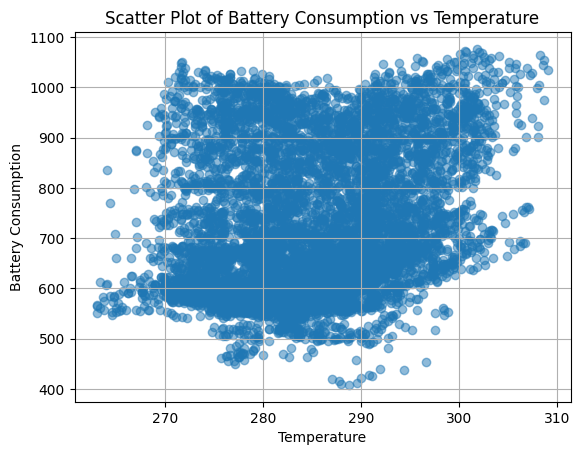

In [26]:
import matplotlib.pyplot as plt


battery_consumption = hourly_df['y']
temperature = daf['value']


plt.scatter(temperature, battery_consumption, alpha=0.5)  # Adjust alpha for transparency
plt.xlabel('Temperature')
plt.ylabel('Battery Consumption')
plt.title('Scatter Plot of Battery Consumption vs Temperature')
plt.grid(True)
plt.show()

Performing polynomial regression to check the relationship between the battery consumption and temperature. We can see that as temperature increases batery consumption decreases initially but a further increase in temperature increases battery consumption. We can see that battery consumption is high for for very low temperature and high temperatures.

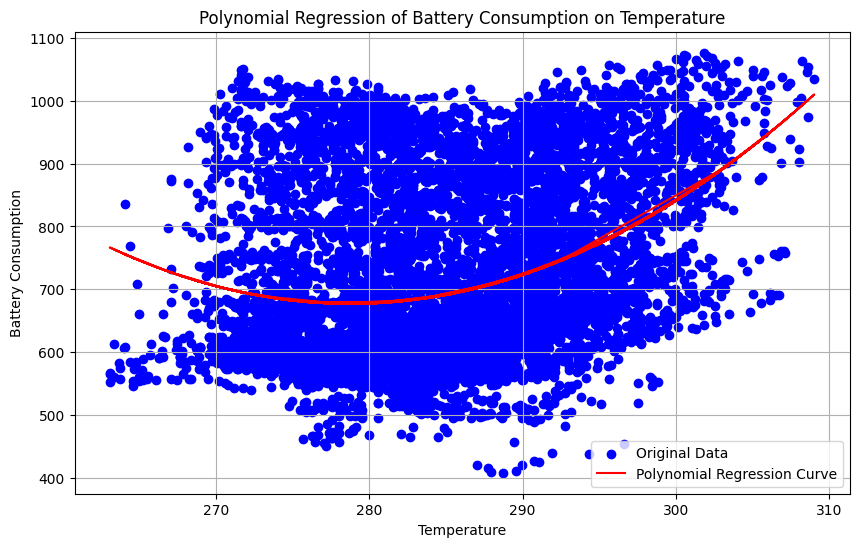

Intercept: 28894.422747181063
Coefficients: [   0.         -202.45276692    0.36313701]


In [27]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt



X = daf['value'].values.reshape(-1, 1)  # Temperature
y = hourly_df['y'].values  # Battery consumption

# Handle missing values in y (battery consumption) by imputing with median
imputer = SimpleImputer(strategy='median')
y_imputed = imputer.fit_transform(y.reshape(-1, 1)).ravel()

# Create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Create and fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y_imputed)


y_pred = model.predict(X_poly)

plt.figure(figsize=(10, 6))
plt.scatter(X, y_imputed, color='blue', label='Original Data')
plt.plot(X, y_pred, color='red', label='Polynomial Regression Curve')
plt.xlabel('Temperature')
plt.ylabel('Battery Consumption')
plt.title('Polynomial Regression of Battery Consumption on Temperature')
plt.legend()
plt.grid(True)
plt.show()

# Print the coefficients of the polynomial regression model
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Include the temperature as an additional regressor to train the model

In [28]:
hourly_df['temperature'] = daf['value']

m = Prophet()
m.add_regressor('temperature')
m.fit(hourly_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3sgcyux5/lyhlne2k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3sgcyux5/9fdjxldz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98647', 'data', 'file=/tmp/tmp3sgcyux5/lyhlne2k.json', 'init=/tmp/tmp3sgcyux5/9fdjxldz.json', 'output', 'file=/tmp/tmp3sgcyux5/prophet_modelwc58tj7t/prophet_model-20240507075044.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Create a future Dataframe

In [29]:

import pandas as pd

freq = '15min'  # Frequency of 15 minutes
num_periods = 35040  # Number of periods for 1 year


start_date = hourly_df['ds'].min()


future_dates = pd.date_range(start=start_date, periods=num_periods, freq=freq)


future_df = pd.DataFrame({'ds': future_dates})

print(future_df)

                       ds
0     2022-01-01 00:00:00
1     2022-01-01 00:15:00
2     2022-01-01 00:30:00
3     2022-01-01 00:45:00
4     2022-01-01 01:00:00
...                   ...
35035 2022-12-31 22:45:00
35036 2022-12-31 23:00:00
35037 2022-12-31 23:15:00
35038 2022-12-31 23:30:00
35039 2022-12-31 23:45:00

[35040 rows x 1 columns]


Include temperature values in the
 future dataframe and make a prediction


In [30]:
future_df['temperature'] = daf['value']
median_temperature = future_df['temperature'].median()
future_df['temperature'].fillna(median_temperature, inplace=True)
forecast = m.predict(future_df)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
35035,2022-12-31 22:45:00,382.288854,292.500409,469.468589
35036,2022-12-31 23:00:00,378.304642,289.946593,469.408482
35037,2022-12-31 23:15:00,374.849839,282.503534,469.079456
35038,2022-12-31 23:30:00,371.876364,281.247061,472.691128
35039,2022-12-31 23:45:00,369.328194,273.516448,458.564055


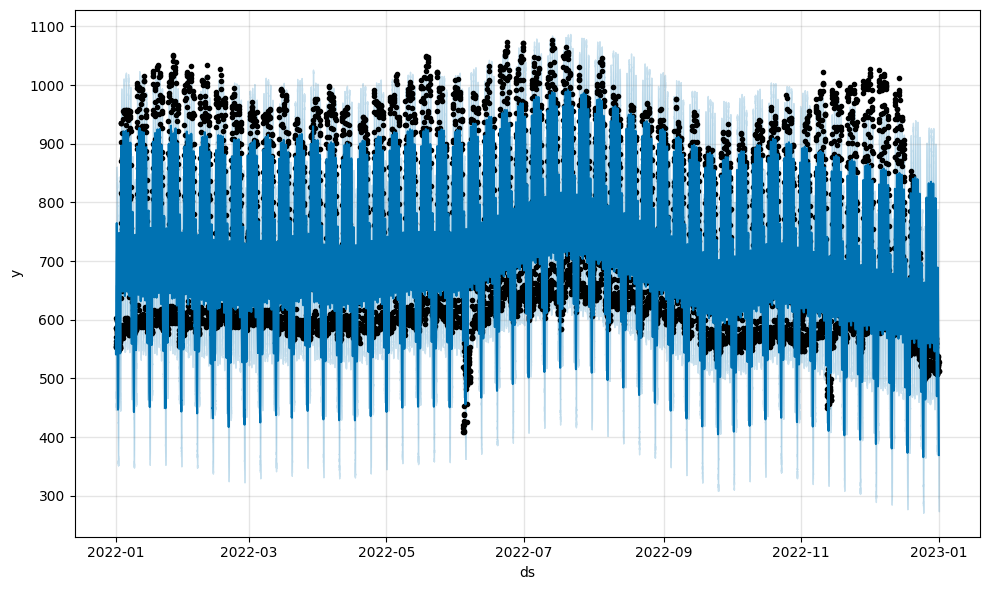

In [31]:
fig1 = m.plot(forecast)

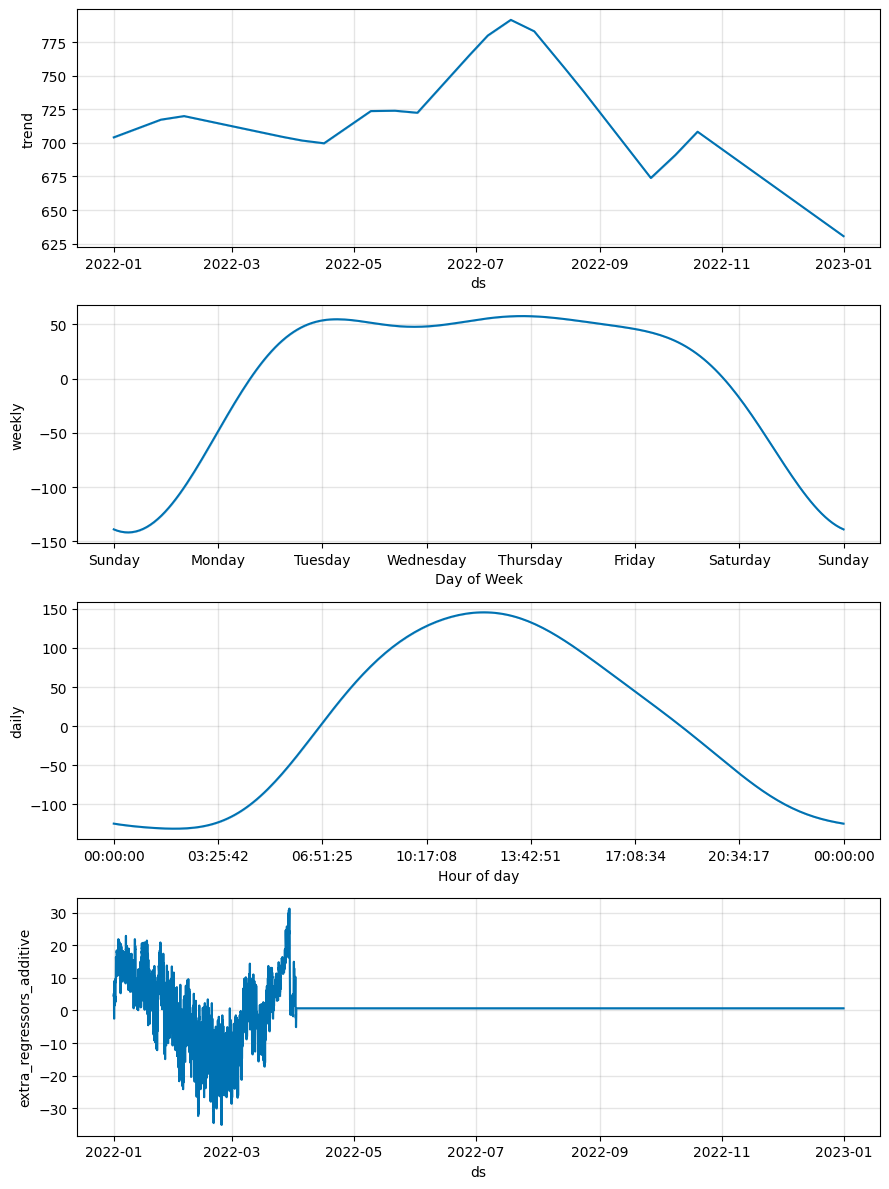

In [18]:
#trends while including temperature for prediction
fig2 = m.plot_components(forecast)